In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from pandas import DataFrame, Series  # for convenience
from scipy.misc import imsave
import pims
import trackpy as tp
from pims import Frame
import math
picL = 18333
picR = 18158
FrameLSum = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_{}_white.tif'.format(picL,picL))
FrameRSum = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_{}_white.tif'.format(picR,picR))


TrackL = pd.read_csv('FrameL.csv')
TrackR = pd.read_csv('FrameR.csv')
TrackL['Time'] = TrackL['frame']*0.0001
TrackR['Time'] = TrackR['frame']*0.0001
ParticlePair = pd.read_csv('PointPair_Frame_0.csv')

In [40]:
TL = TrackL[TrackL['frame']==0]
TR = TrackR[TrackR['frame']==0]
TR.head()

Unnamed: 0           x          y        mass      size       ecc  \
0             0  198.102990  60.109635   83.856106  0.847117  0.347222   
37           37  210.071705  60.023256  143.753325  0.850217  0.332440   
71           71  192.178571  63.981293  163.811928  0.849169  0.316038   
109         109  201.050667  63.978667  104.471893  0.840635  0.177358   
160         160  185.005420  66.178862  102.800343  0.839409  0.265385   

        signal  raw_mass        ep  frame  particle  Time  
0    23.680296     247.0  0.001577      0       0.0   0.0  
37   39.838615     357.0  0.001091      0       1.0   0.0  
71   45.689041     472.0  0.000825      0       2.0   0.0  
109  30.645089     332.0  0.001173      0       3.0   0.0  
160  30.366497     321.0  0.001213      0       4.0   0.0

In [41]:
PairL = []
for i1 in range(len(TL)):
    for i2 in range(len(ParticlePair)):
        x1 = TL['x'].iloc[i1]
        y1 = TL['y'].iloc[i1]
        PID = TL['particle'].iloc[i1]
        x2 = ParticlePair['X_L'].iloc[i2]
        y2 = ParticlePair['Y_L'].iloc[i2]     
        if(x1 == x2 and y1 == y2):
            ipair = [i2,PID,x1,y1]
            PairL.append(ipair)
            print(x1,y1,i2,PID)

(246.184615385, 66.758974358999993, 1, 0.0)
(255.87558685400001, 67.098591549299996, 0, 1.0)
(239.93191489400002, 69.931914893599995, 2, 2.0)
(247.06971677599998, 72.917211328999997, 3, 3.0)
(237.06417112299999, 74.133689839599995, 4, 4.0)
(244.98173516, 76.961948249599999, 5, 6.0)
(242.91970802900002, 84.131386861300001, 6, 8.0)
(242.93043478299998, 88.972463768099999, 7, 9.0)
(239.20306513400001, 92.977011494300001, 8, 10.0)
(251.11890243900001, 94.143292682900011, 9, 12.0)
(244.94133333299999, 95.866666666699999, 10, 13.0)
(269.235632184, 97.896551724099993, 11, 15.0)
(240.153583618, 98.846416382299992, 12, 16.0)
(259.02687140099999, 100.15547024999999, 13, 17.0)
(270.099056604, 102.061320755, 14, 20.0)
(239.99428571400003, 102.89714285700001, 15, 21.0)
(283.949698189, 105.152917505, 16, 23.0)
(277.94890510900001, 105.944038929, 17, 24.0)
(238.89775561099998, 106.952618454, 18, 27.0)
(246.09168081499999, 108.064516129, 19, 28.0)
(203.012755102, 108.864795918, 21, 29.0)
(300.10115606

In [42]:
PairR = []
for i1 in range(len(TR)):
    for i2 in range(len(ParticlePair)):
        x1 = TR['x'].iloc[i1]
        y1 = TR['y'].iloc[i1]
        PID = TR['particle'].iloc[i1]
        x2 = ParticlePair['X_R'].iloc[i2]
        y2 = ParticlePair['Y_R'].iloc[i2]     
        if(x1 == x2 and y1 == y2):
            ipair = [i2,PID,x1,y1]
            PairR.append(ipair)
            print(x1,y1,i2,PID)

(198.102990033, 60.109634551499994, 0, 0.0)
(210.07170542599999, 60.023255813999995, 1, 1.0)
(192.17857142900002, 63.981292517, 2, 2.0)
(196.099125364, 66.002915451899995, 3, 5.0)
(188.96428571400003, 68.785714285699996, 4, 7.0)
(196.09075043599998, 71.078534031399997, 5, 8.0)
(188.872403561, 79.115727003000003, 6, 9.0)
(184.958860759, 84.803797468400006, 7, 11.0)
(175.131506849, 89.1369863014, 8, 13.0)
(164.72972973, 89.776061776100008, 9, 14.0)
(168.95269382399999, 91.039421813399997, 10, 15.0)
(181.06796116500001, 92.987517337000014, 11, 16.0)
(163.14338235299999, 94.933823529400001, 12, 17.0)
(174.94942903800001, 96.123980424099997, 13, 18.0)
(157.95833333299998, 98.075757575799997, 14, 19.0)
(161.82585752, 99.218997361500001, 15, 20.0)
(190.95969773299998, 100.037783375, 16, 22.0)
(183.96007604599998, 100.929657795, 17, 23.0)
(157.92714025500001, 103.836065574, 18, 24.0)
(178.91833590099998, 104.18335901399999, 19, 26.0)
(187.03999999999999, 104.8, 20, 27.0)
(201.070351759, 106.03

In [43]:
Pair = []
for i1 in range(len(PairL)):
    for i2 in range(len(PairR)):
        PIDL = PairL[i1][0]
        PIDR = PairR[i2][0]
        TrackIDL = PairL[i1][1]
        TrackIDR = PairR[i2][1]   
        if(PIDL == PIDR):
            ipair = [TrackIDL,TrackIDR]
            Pair.append(ipair)

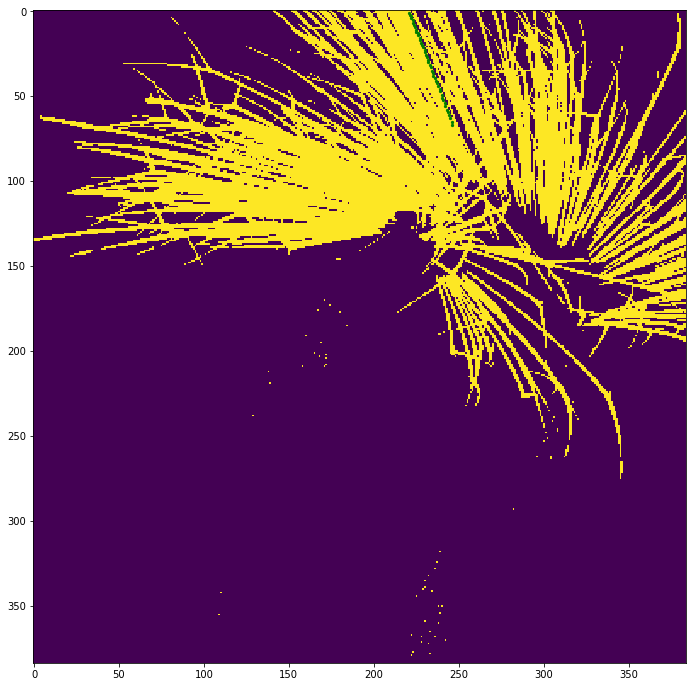

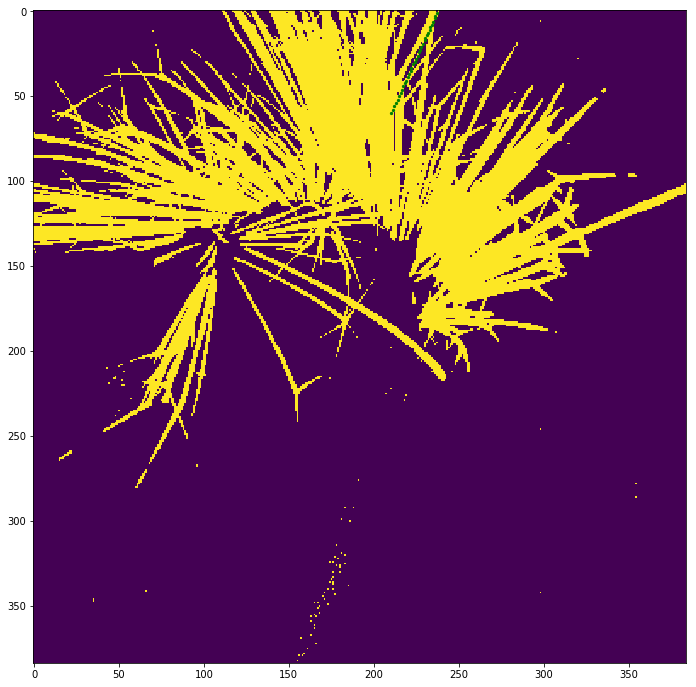

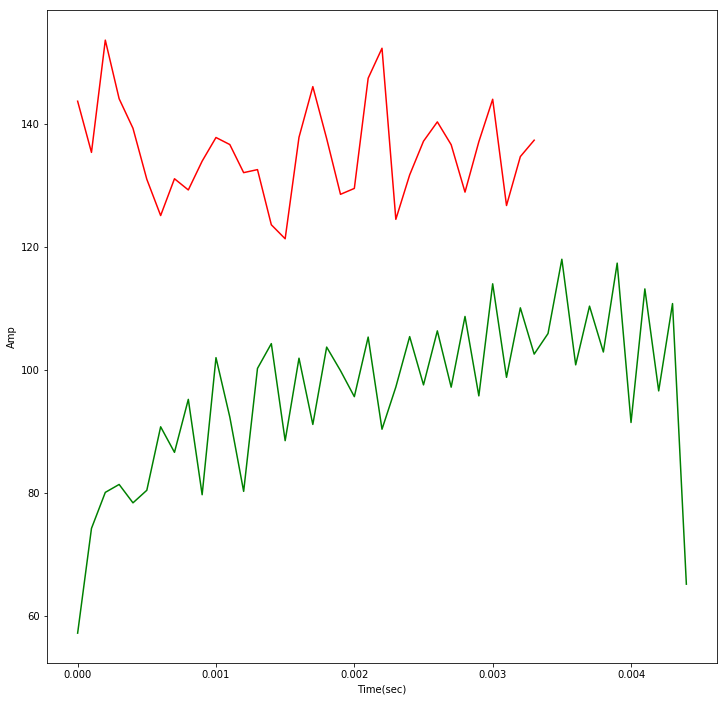

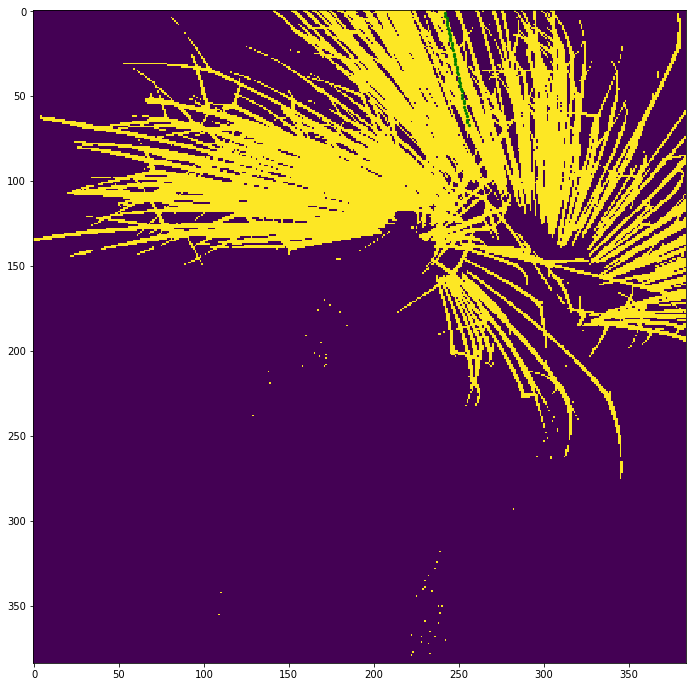

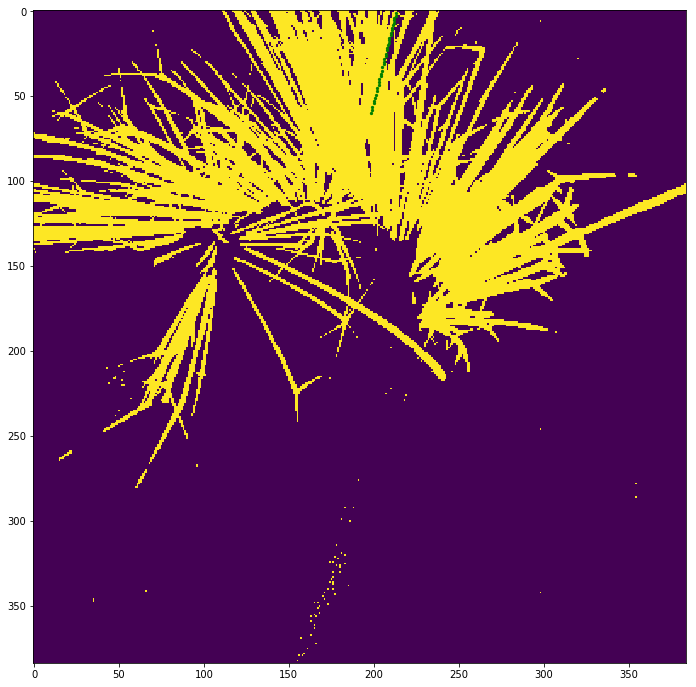

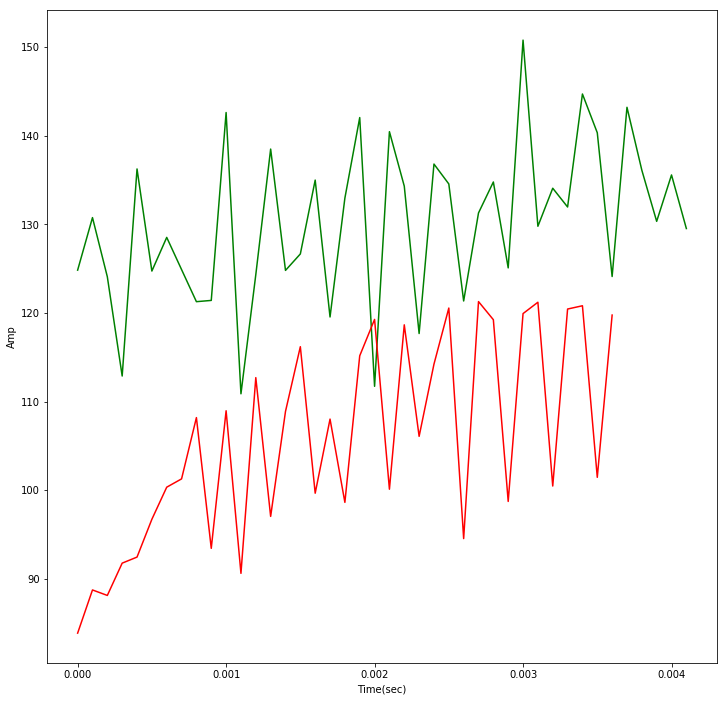

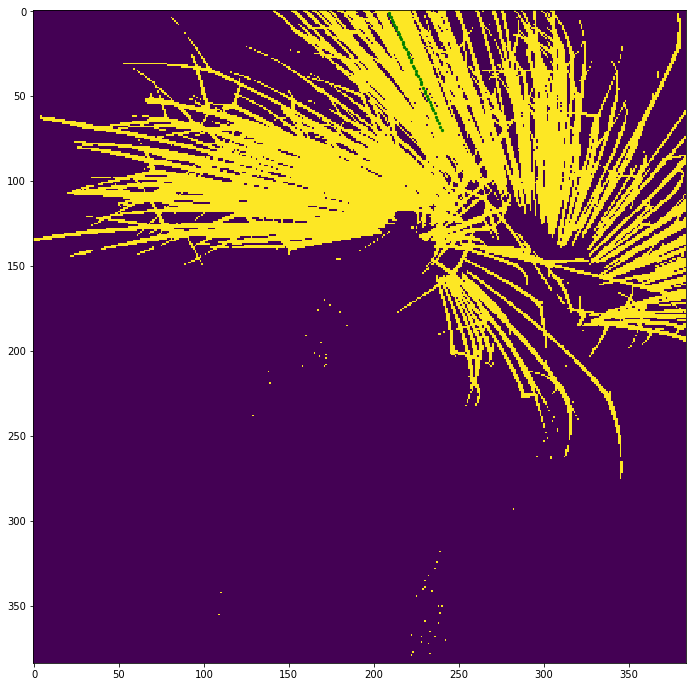

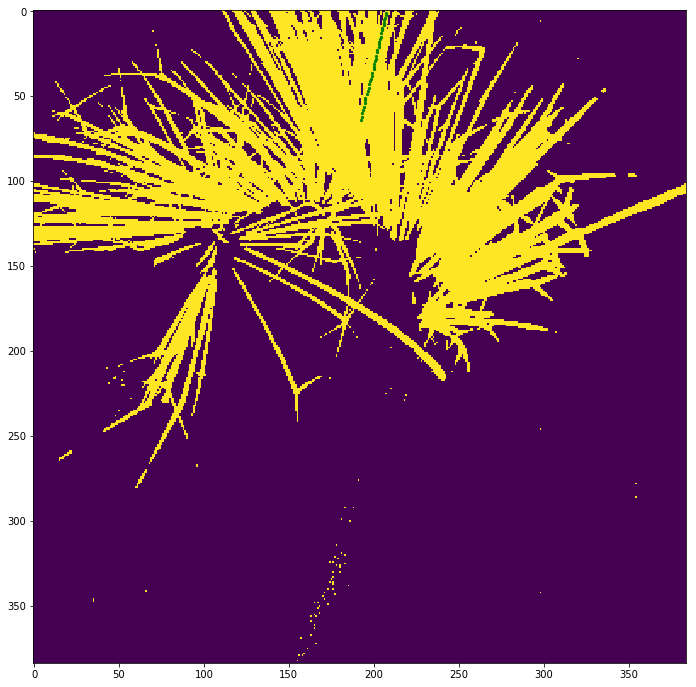

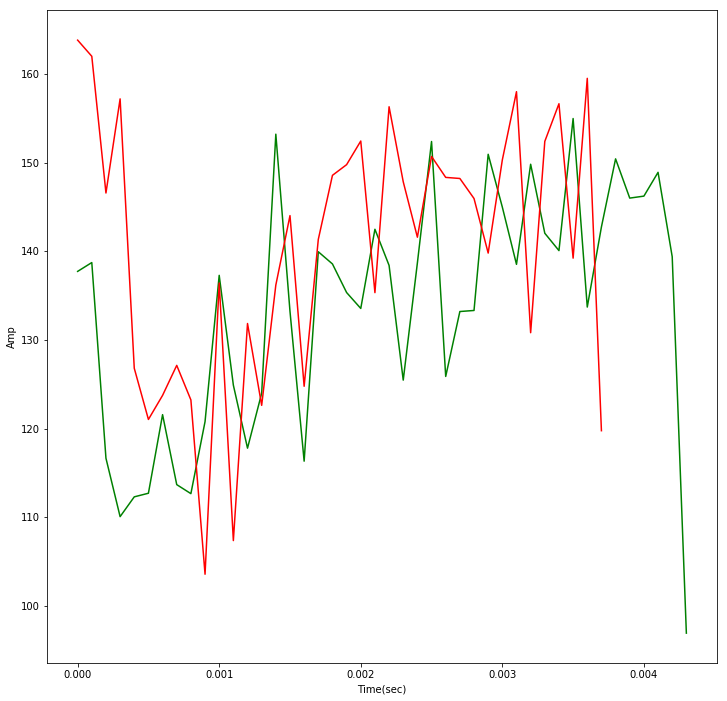

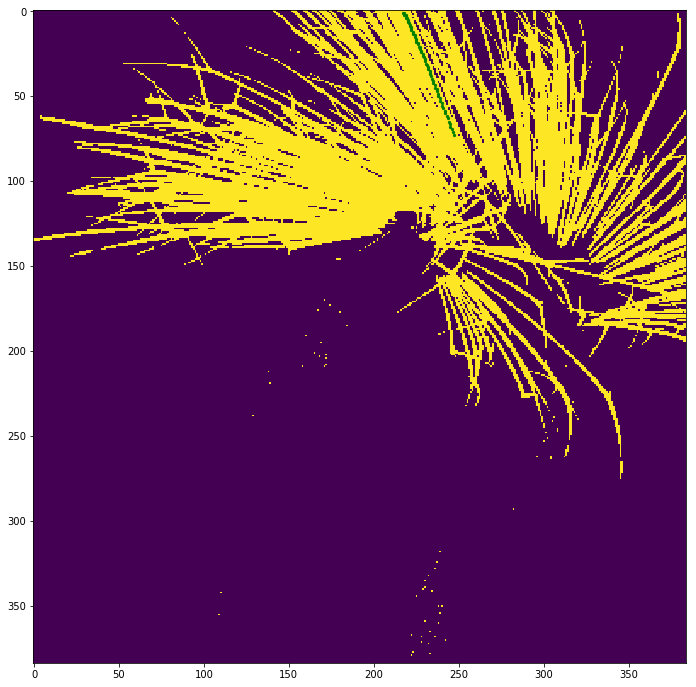

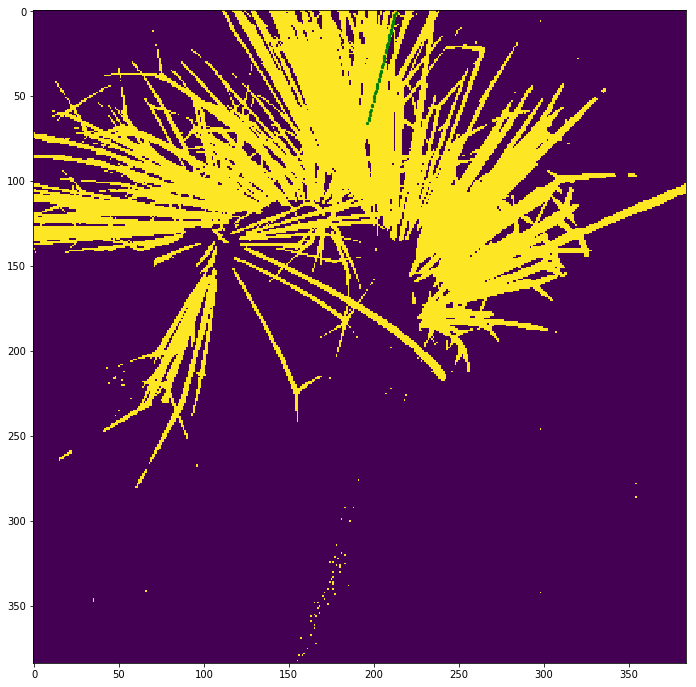

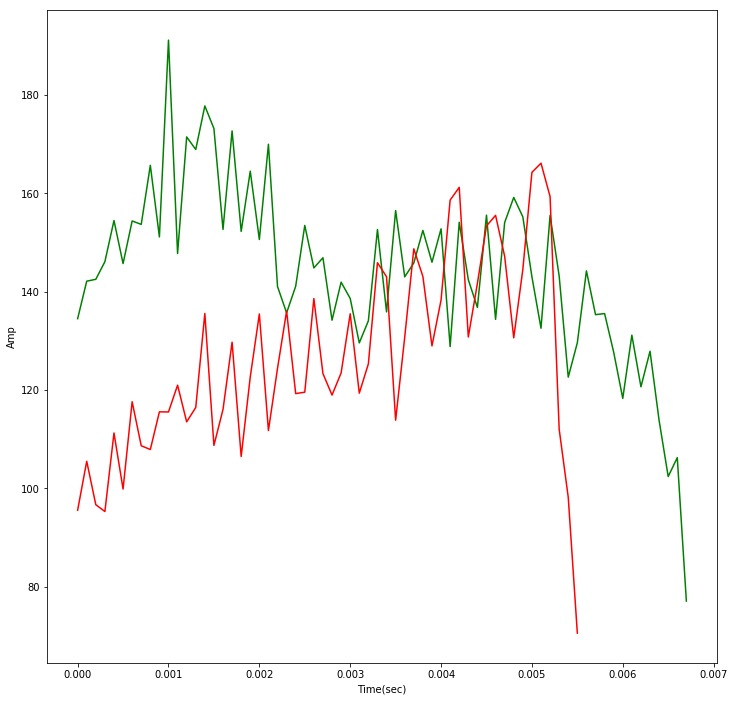

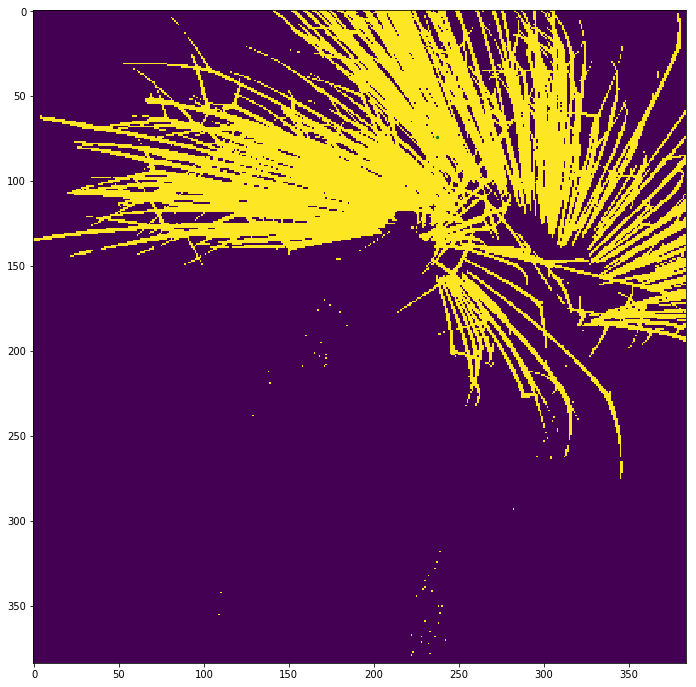

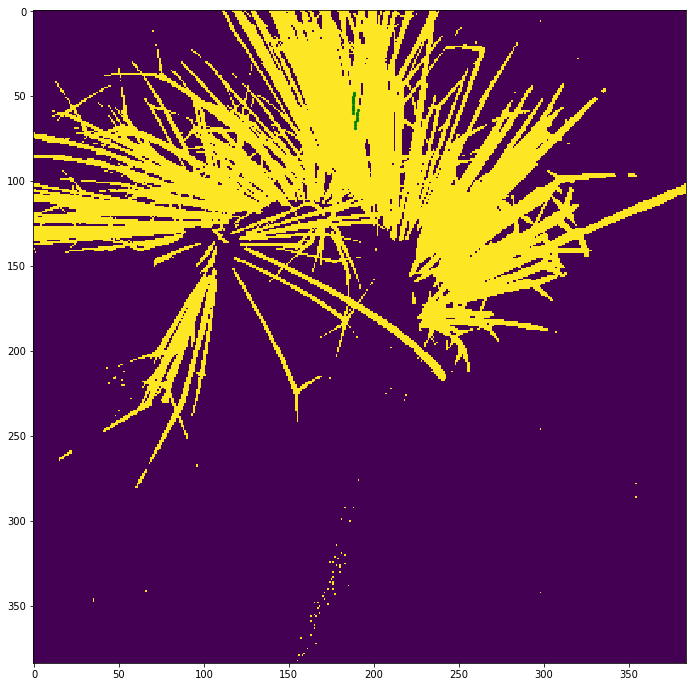

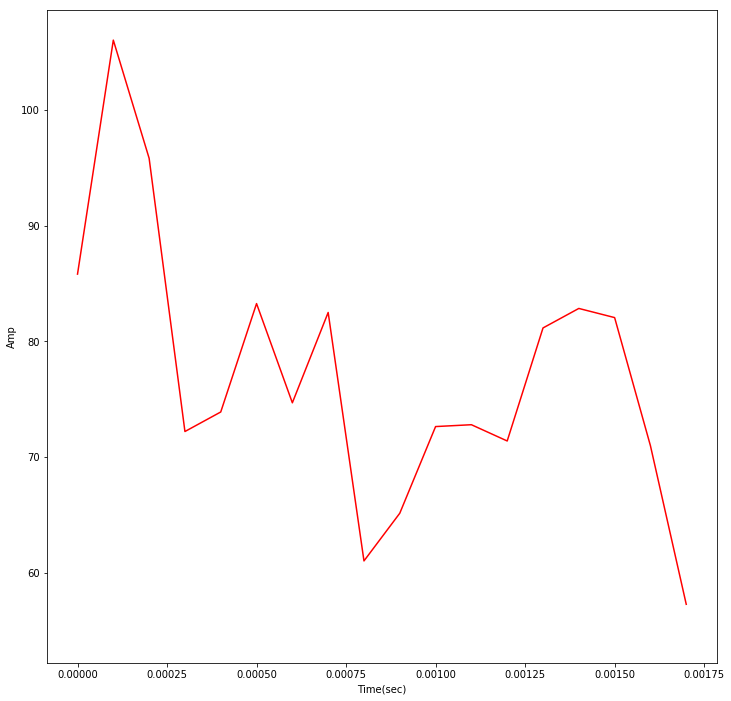

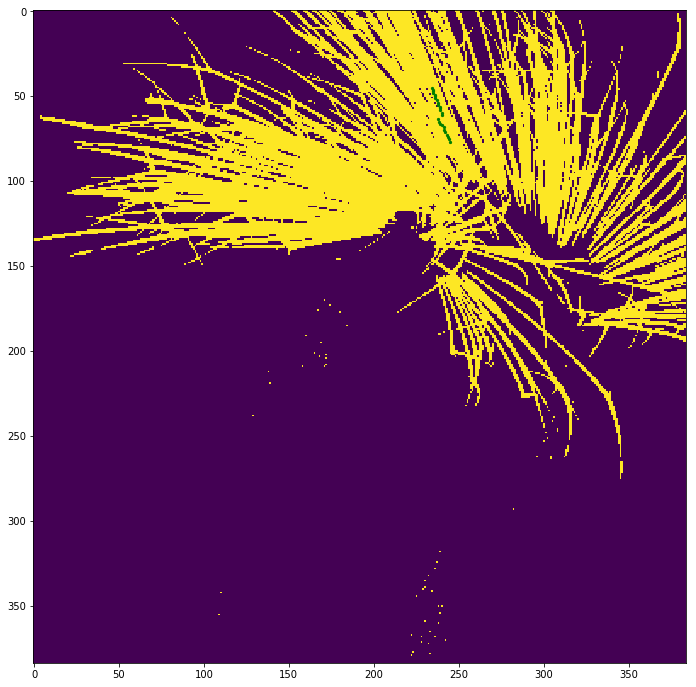

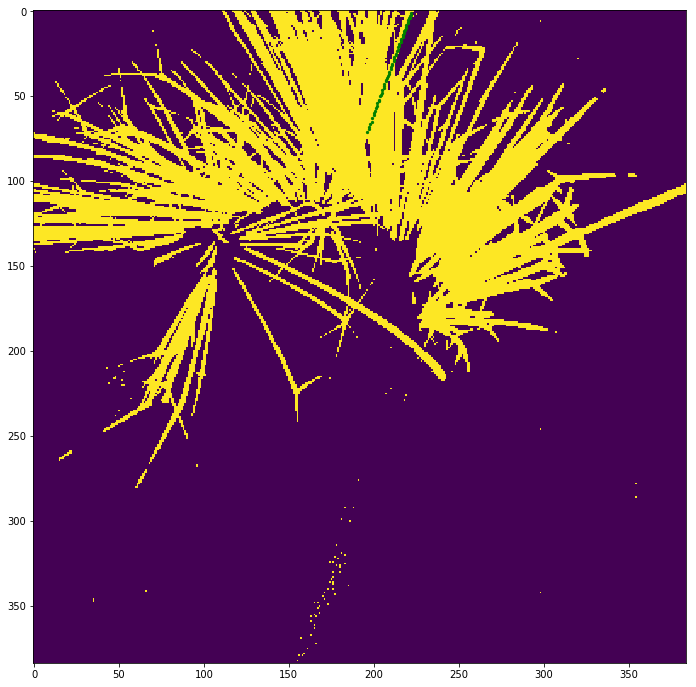

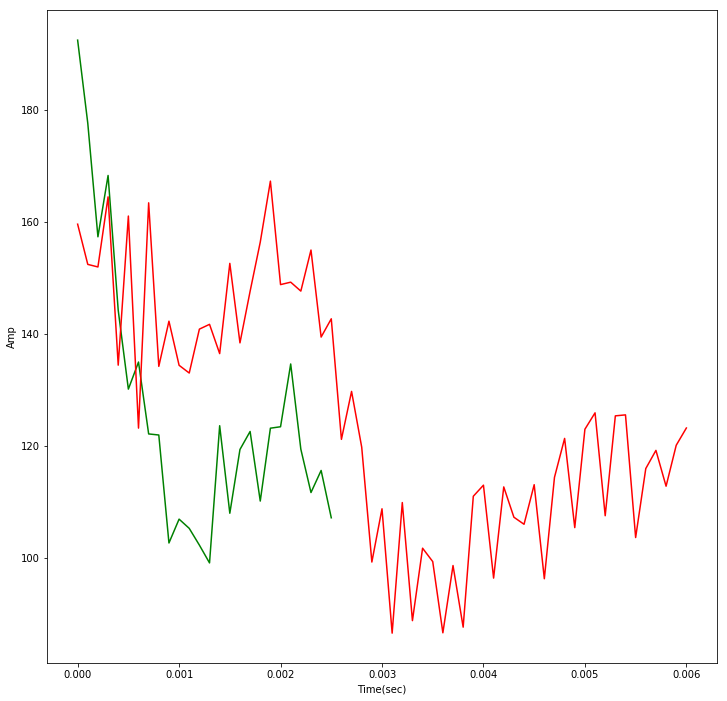

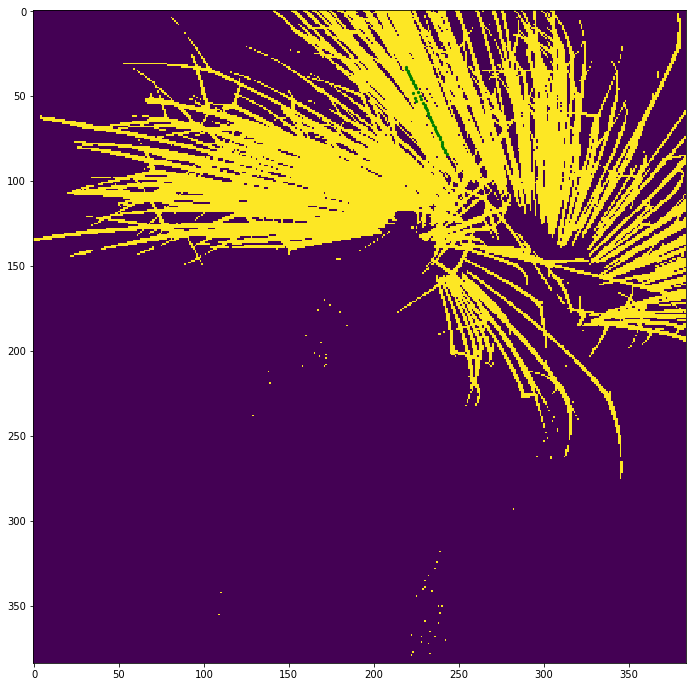

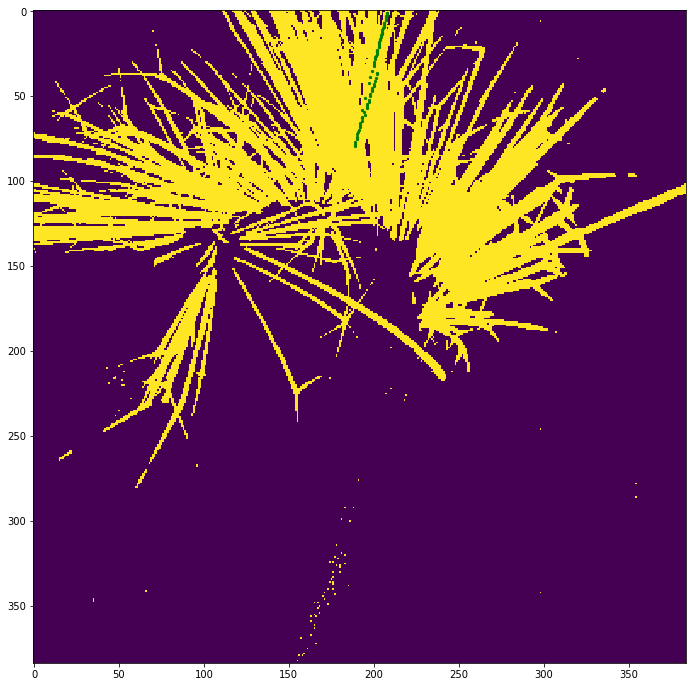

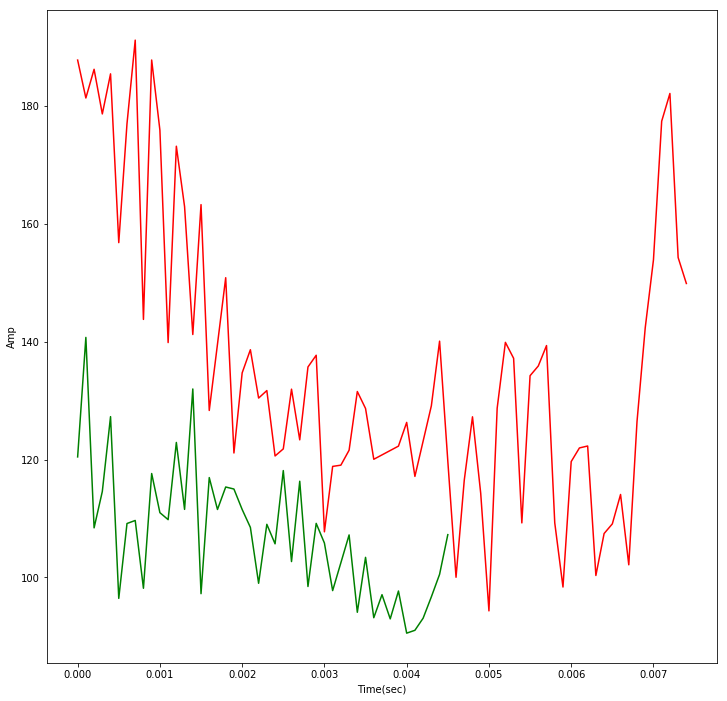

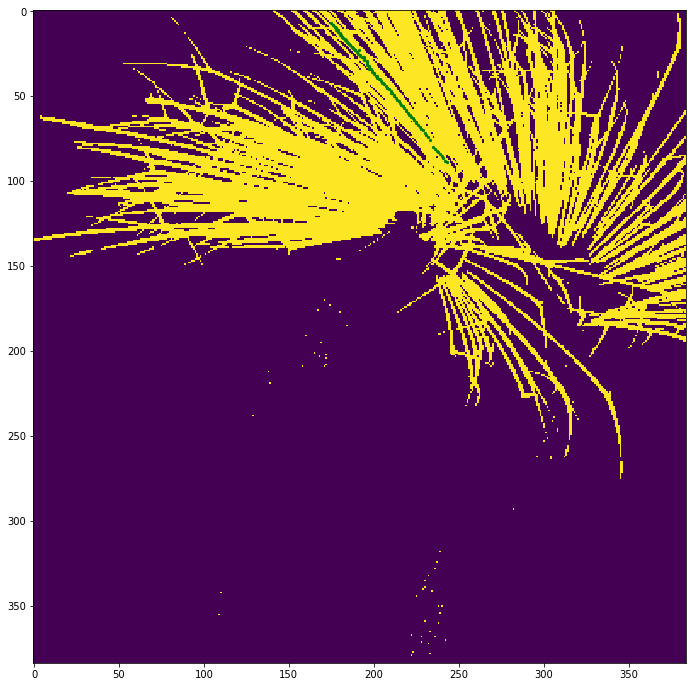

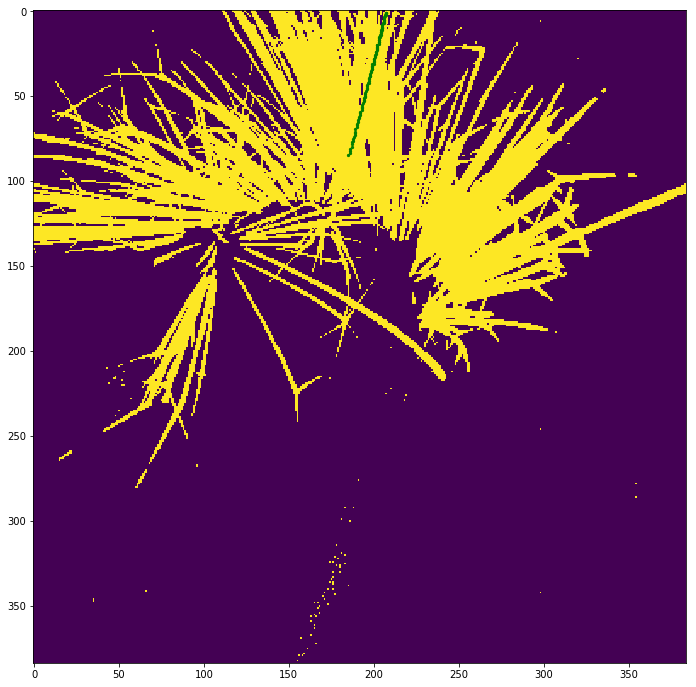

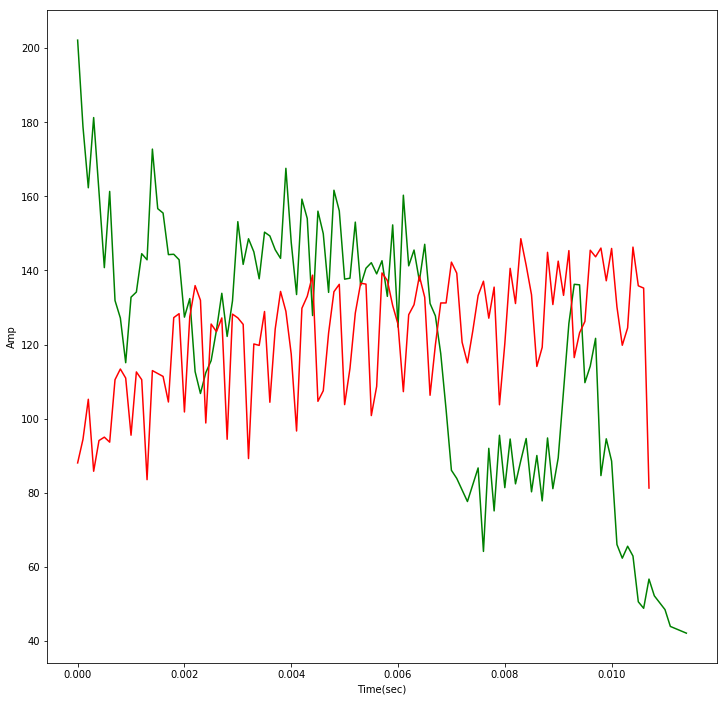

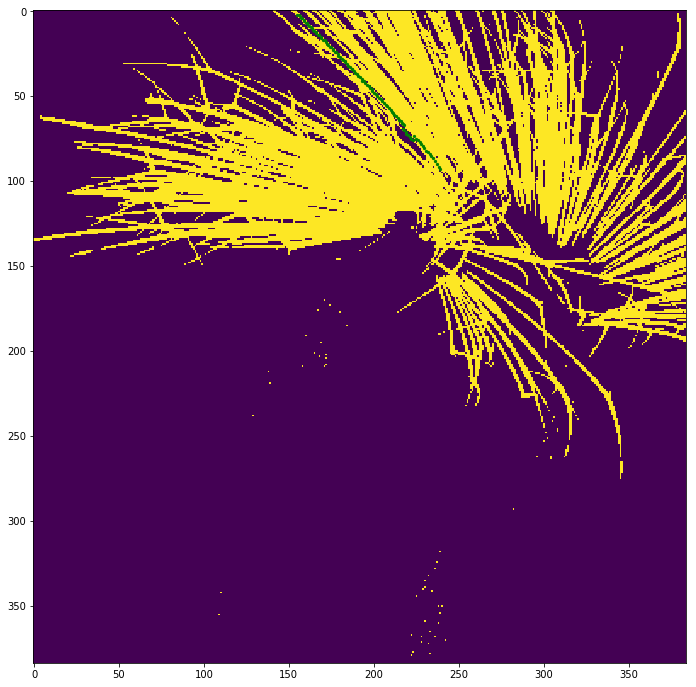

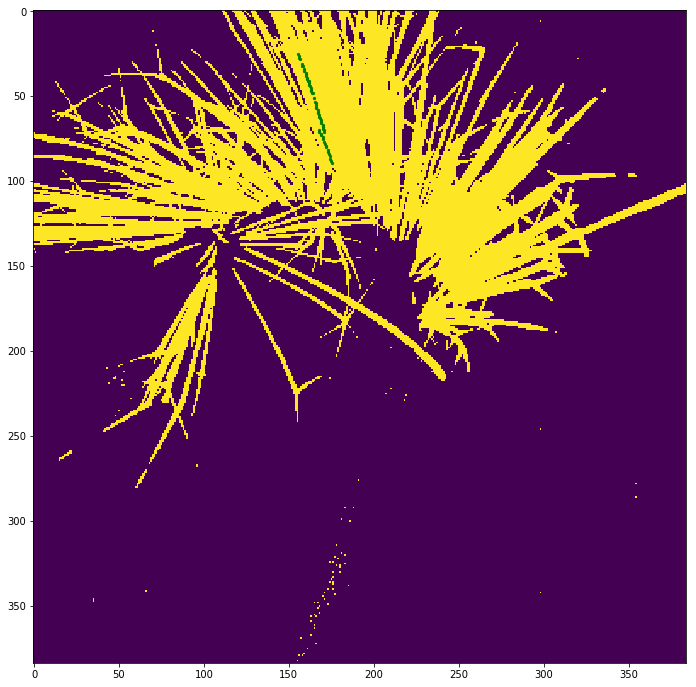

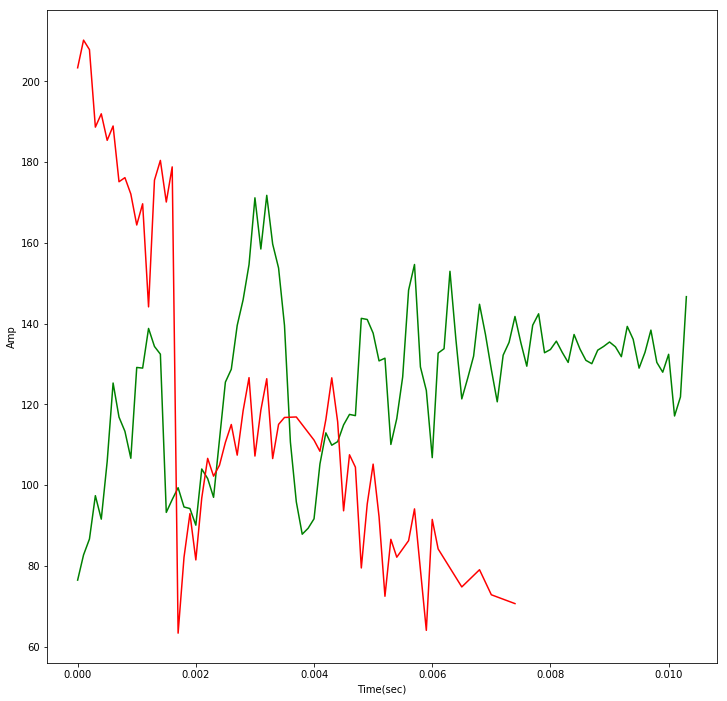

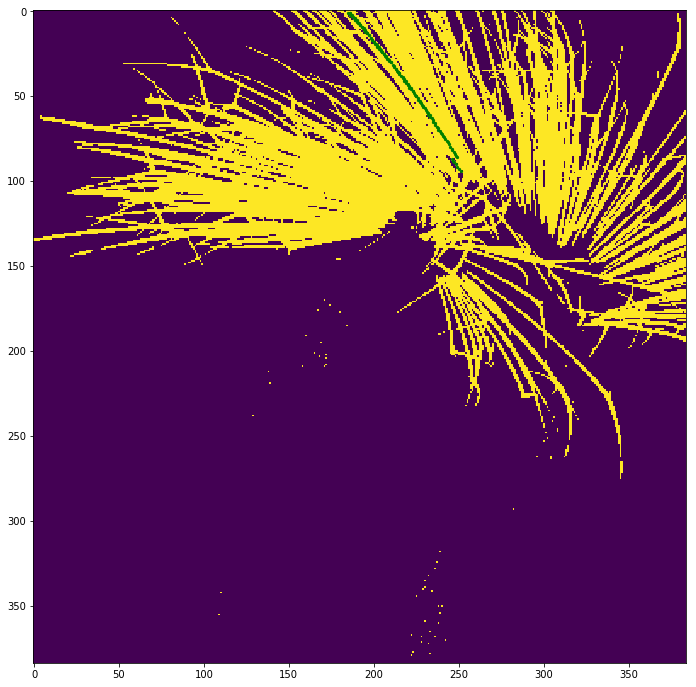

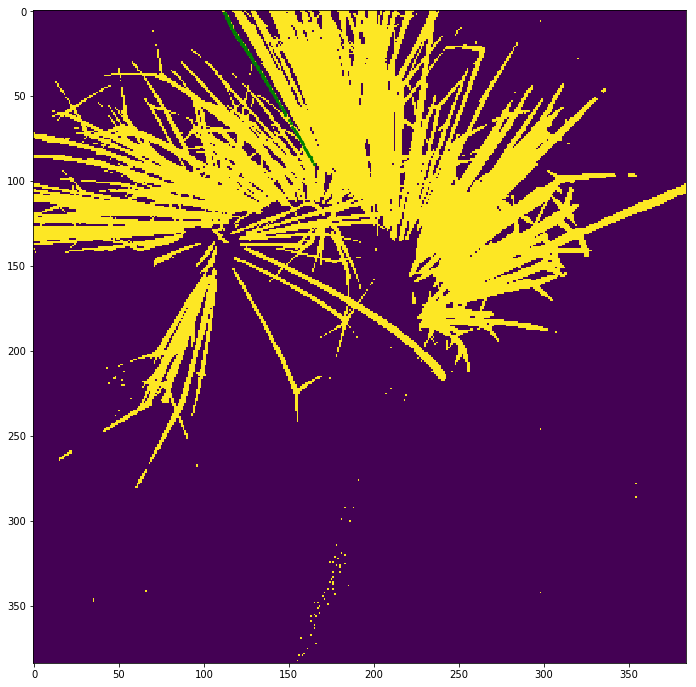

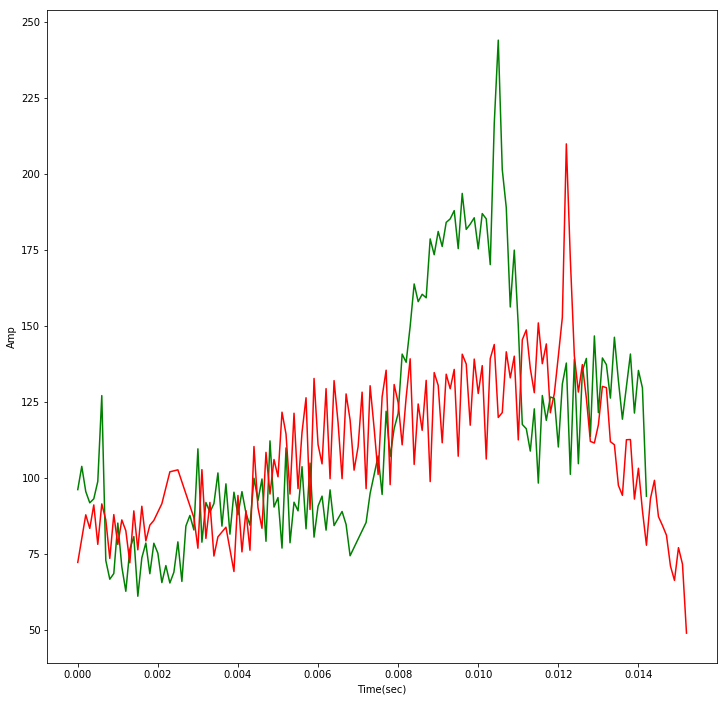

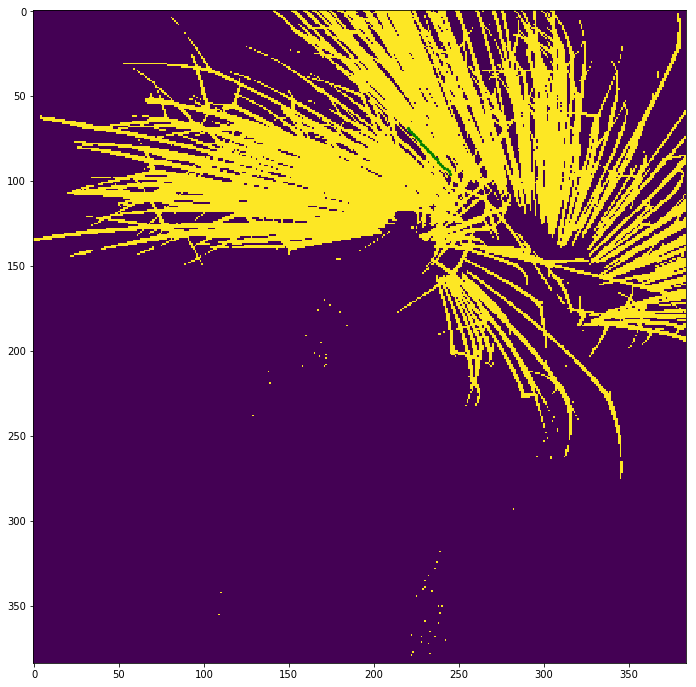

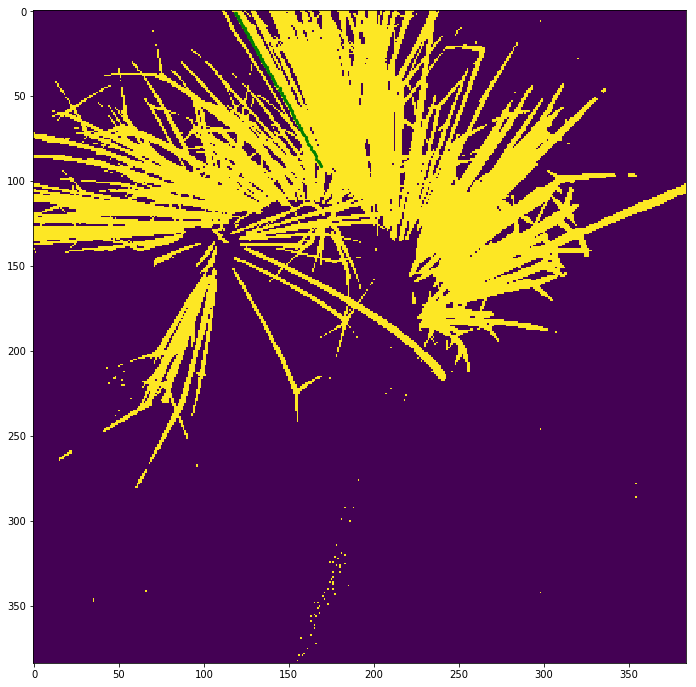

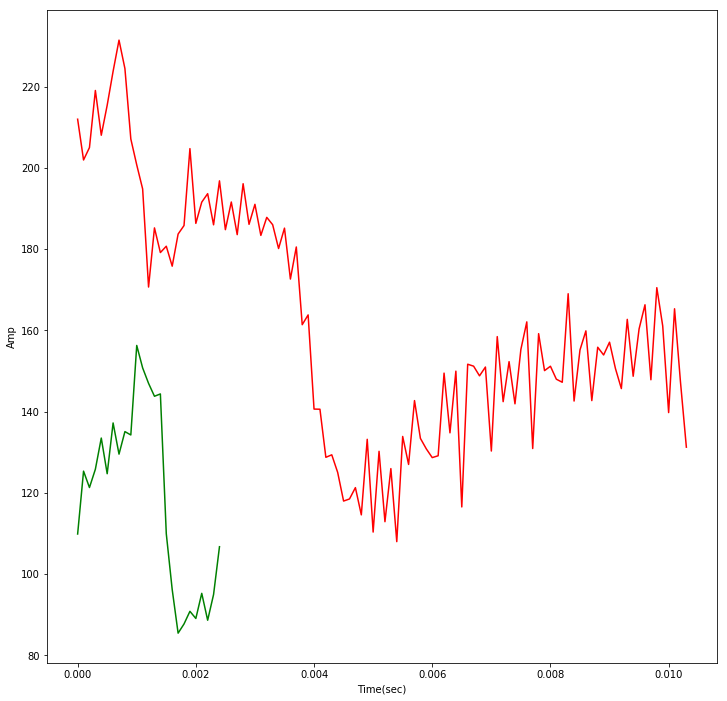

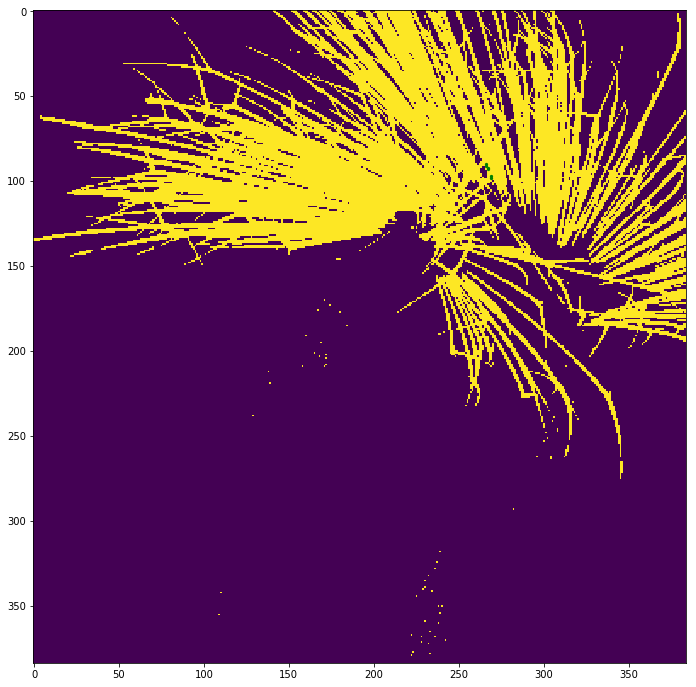

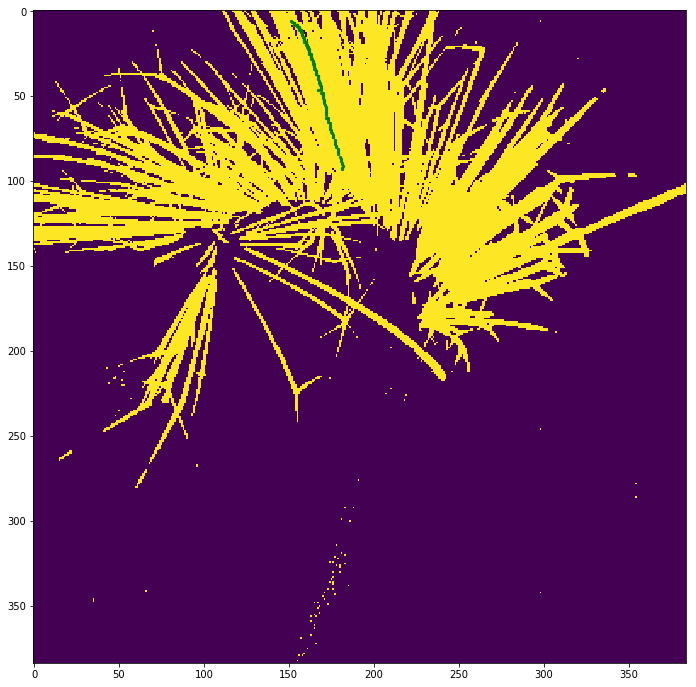

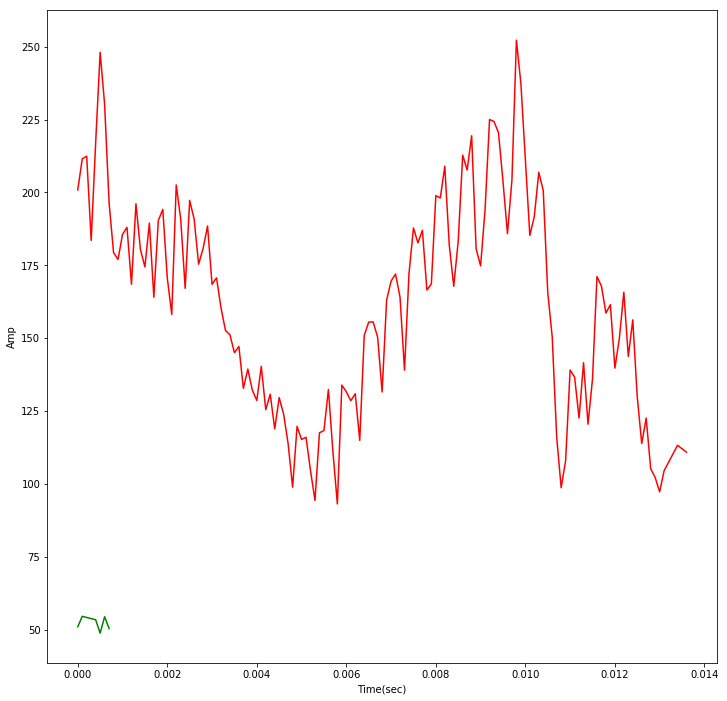

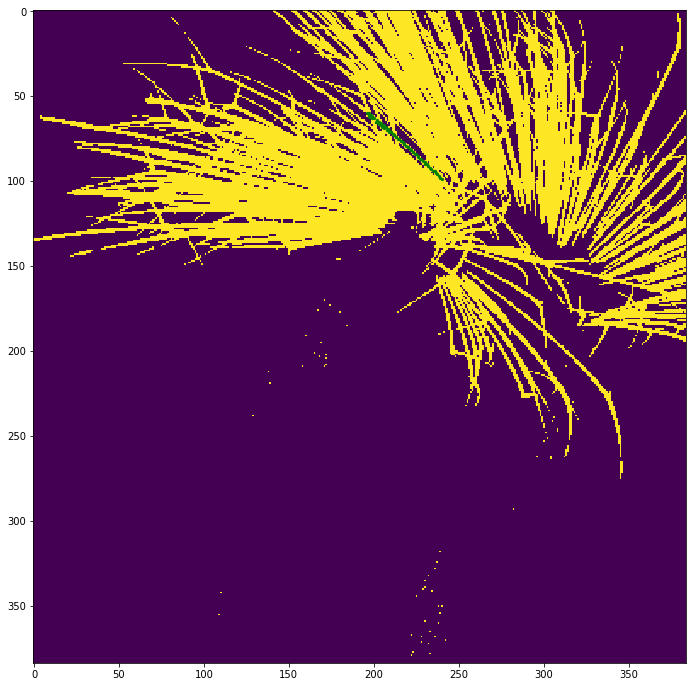

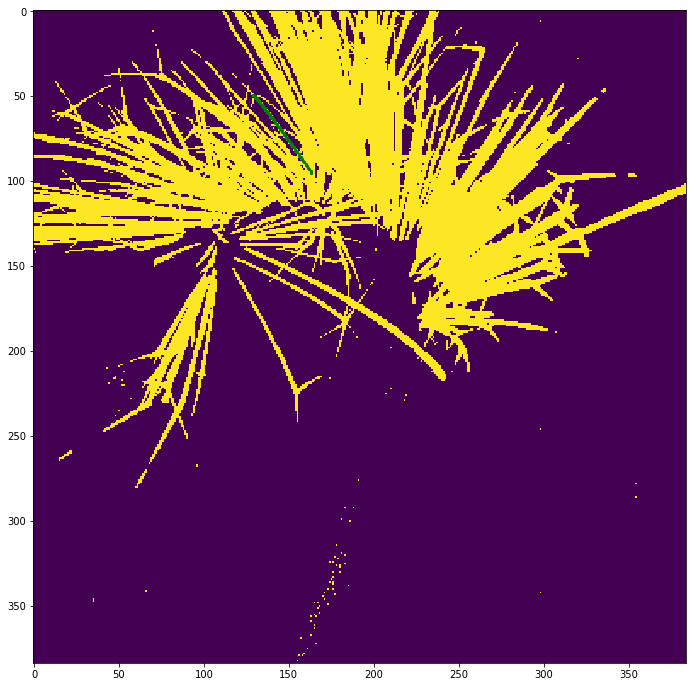

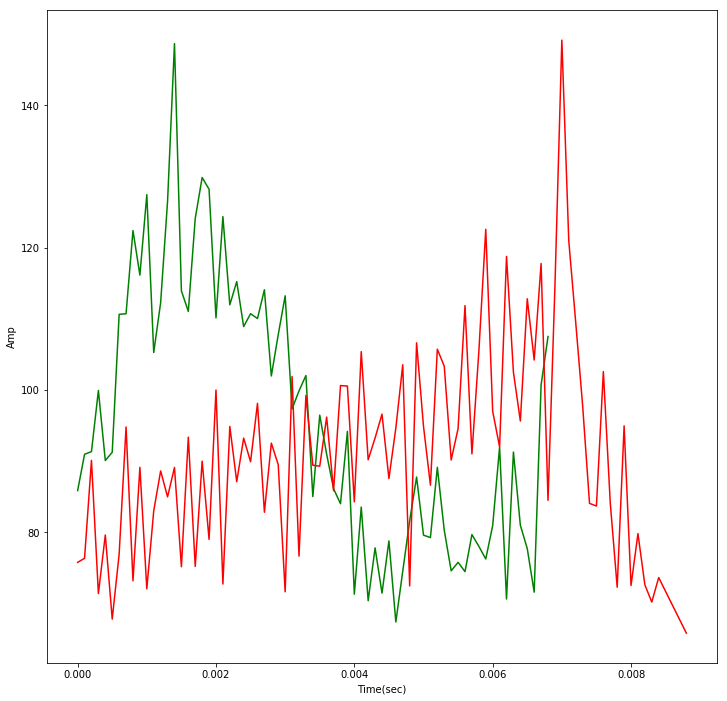

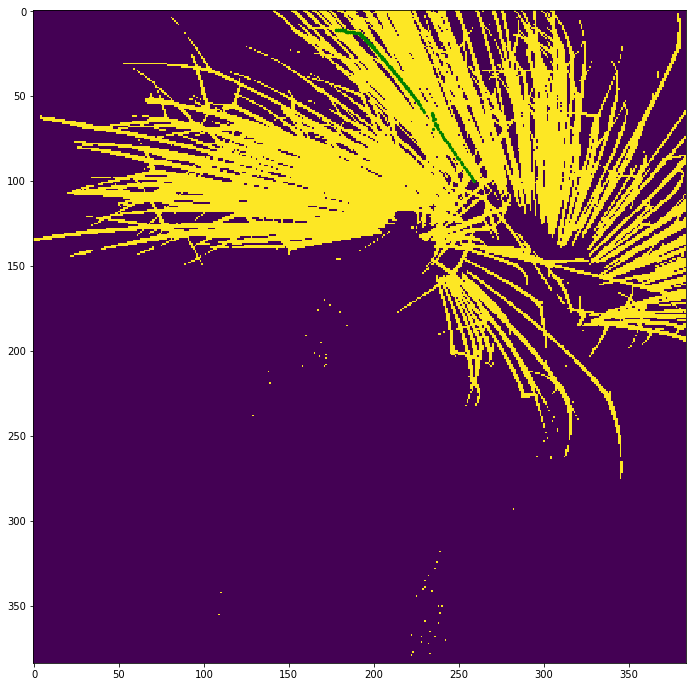

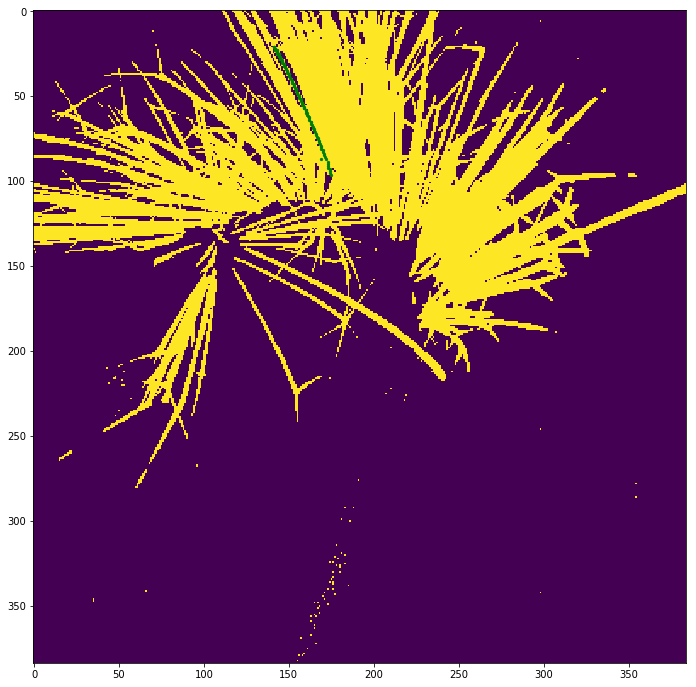

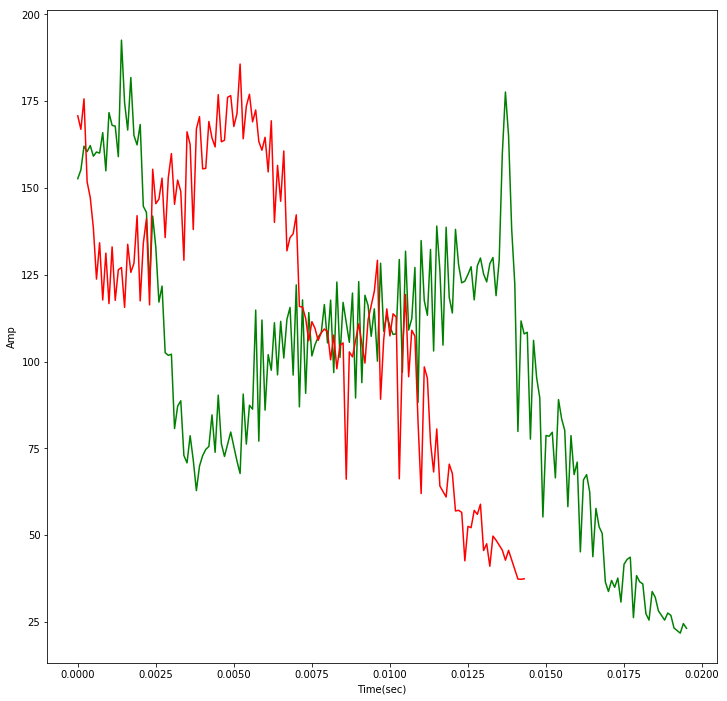

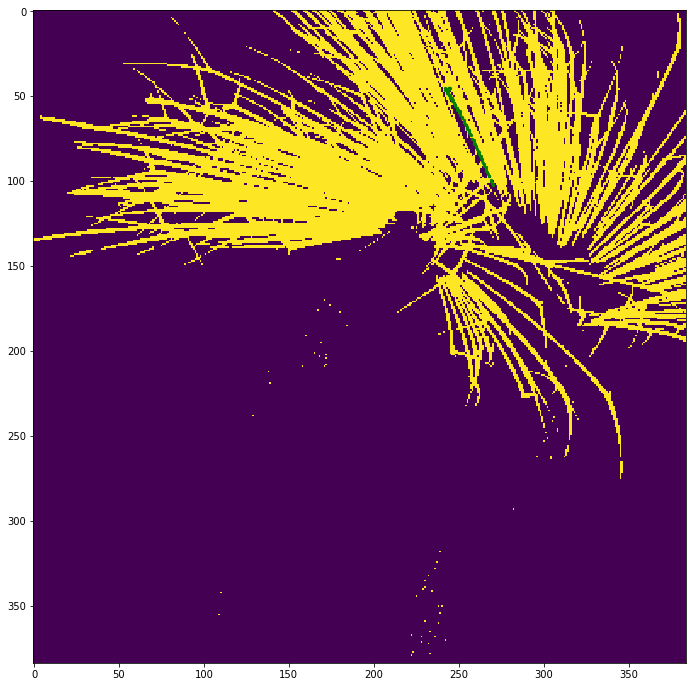

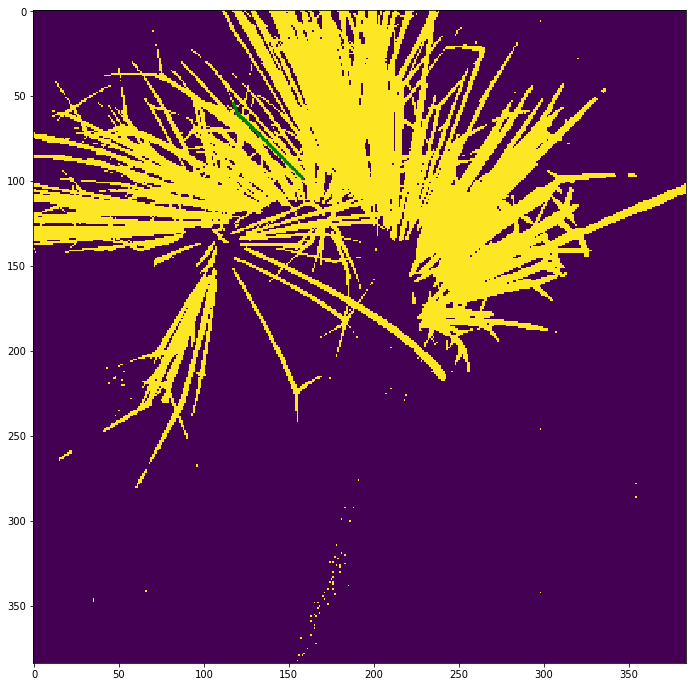

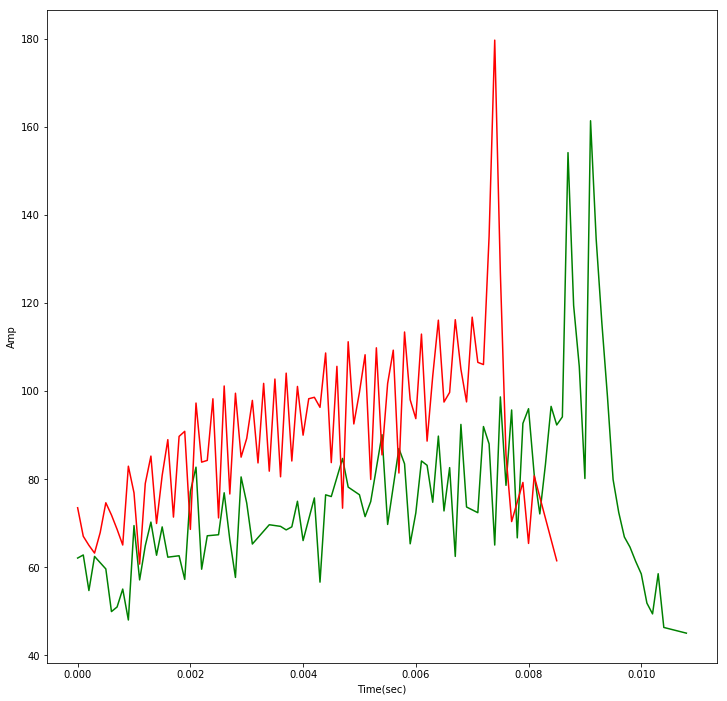

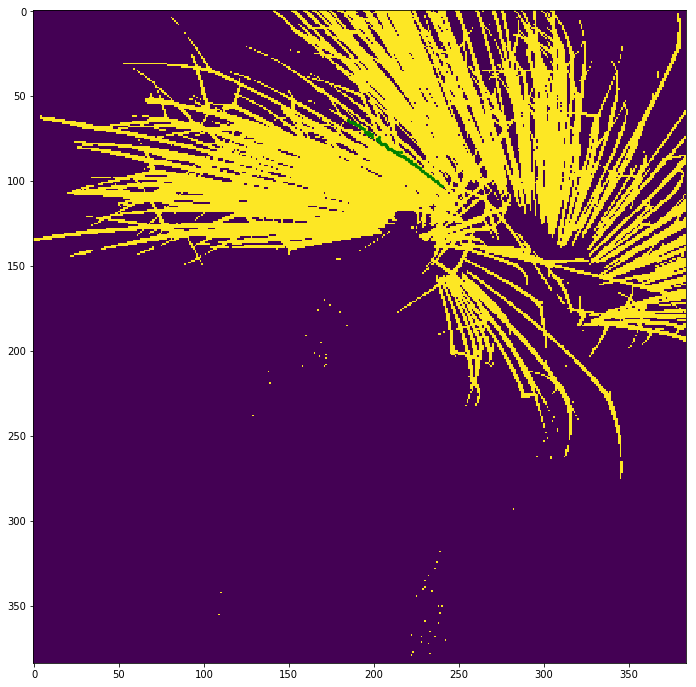

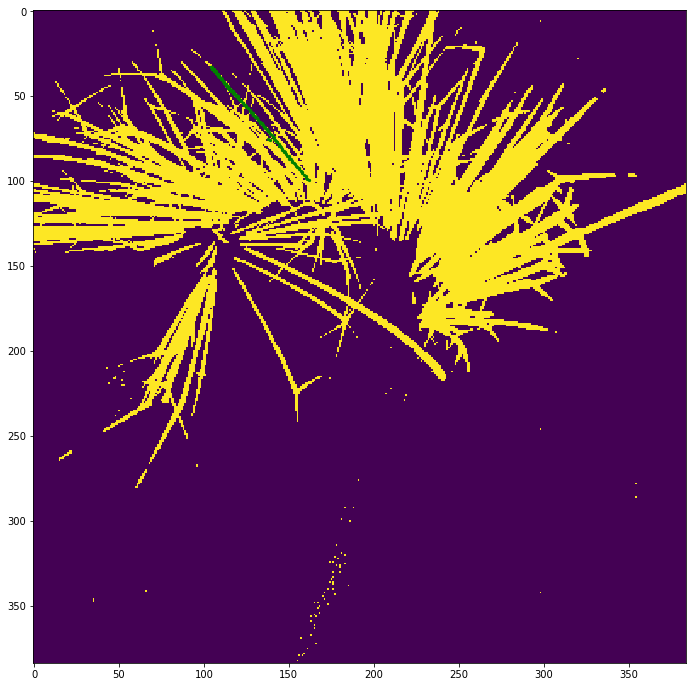

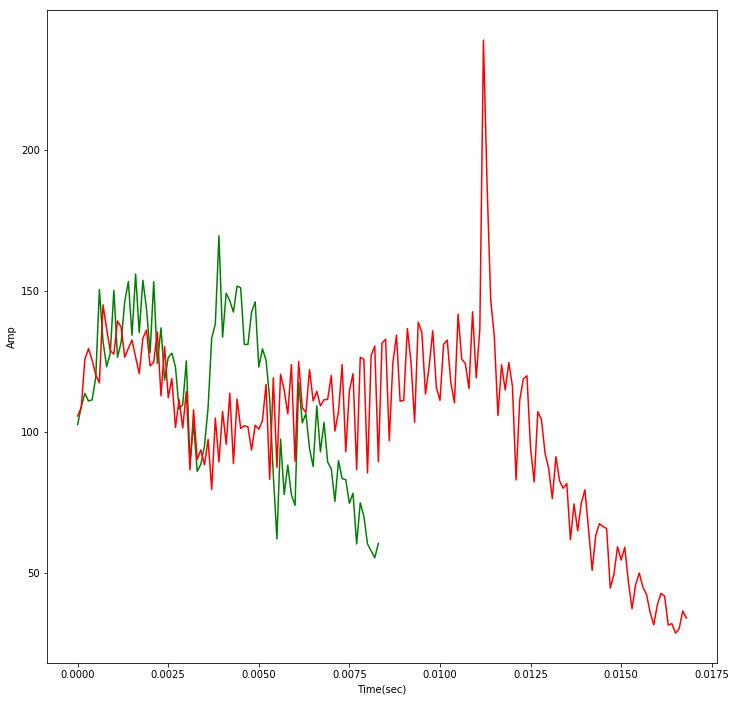

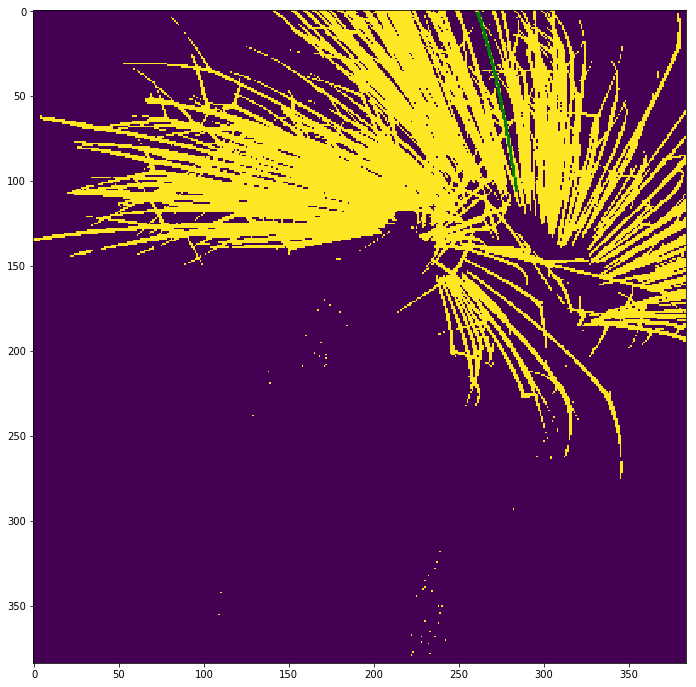

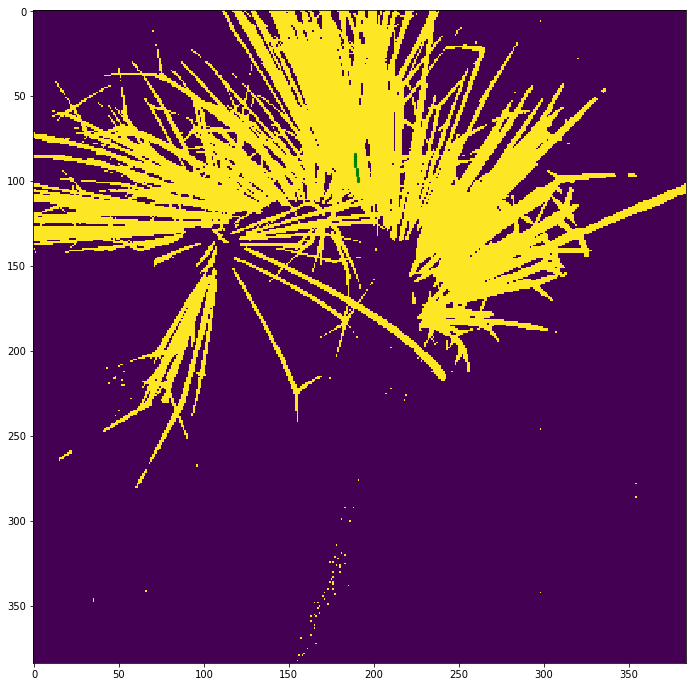

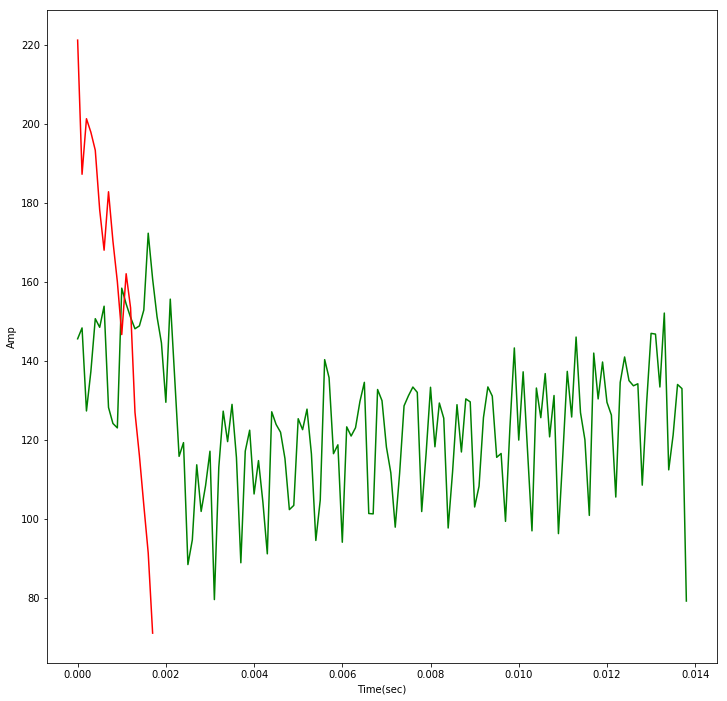

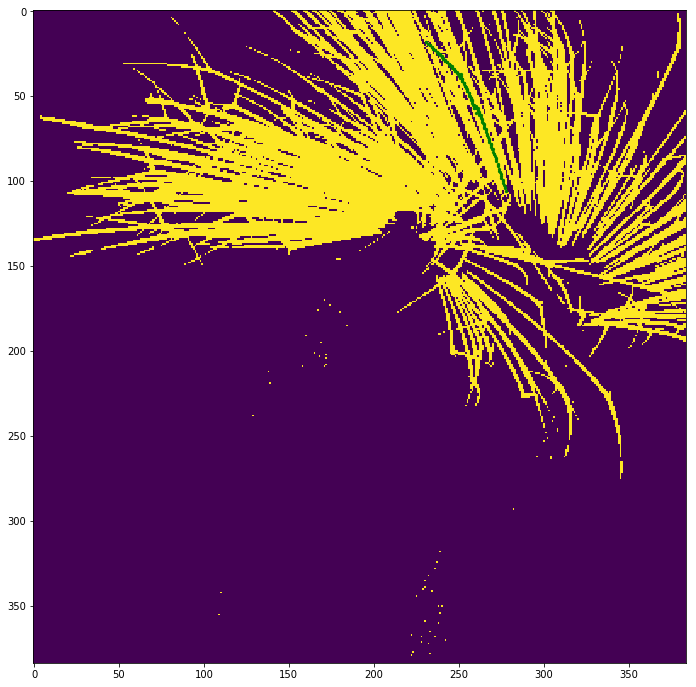

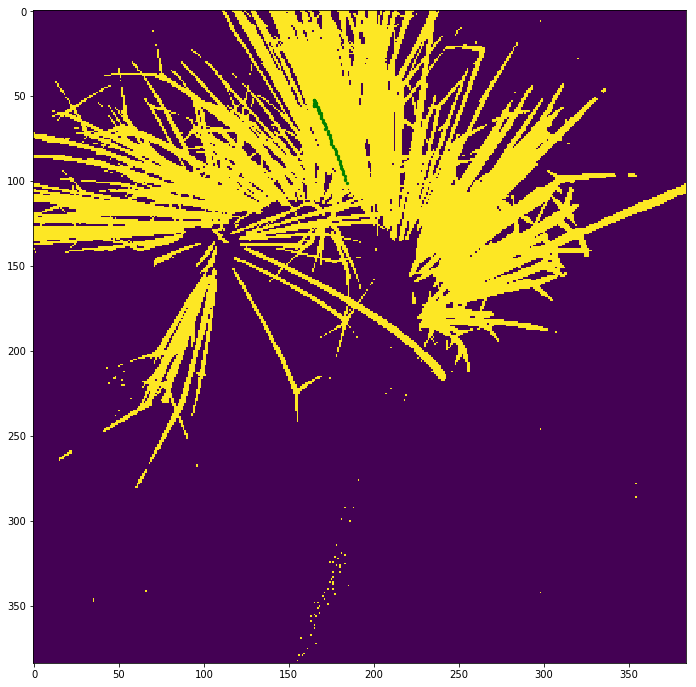

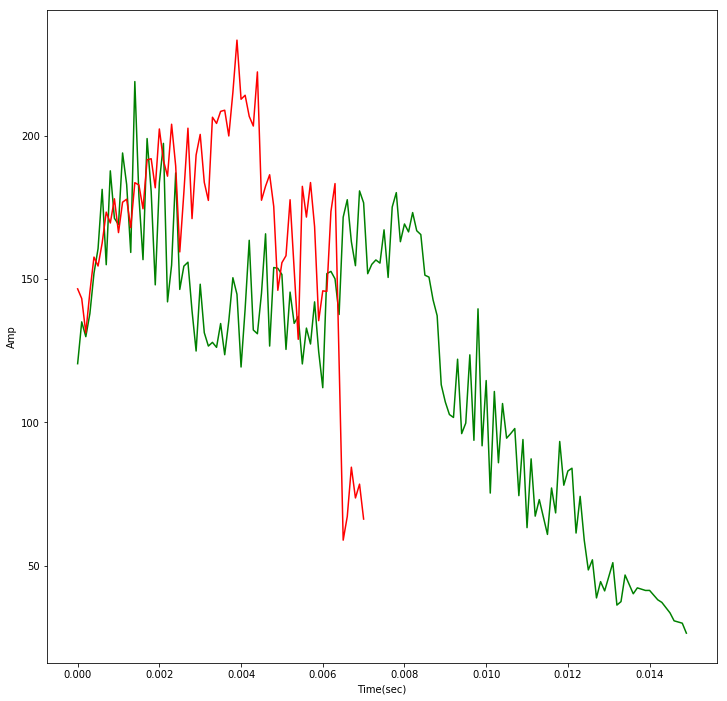

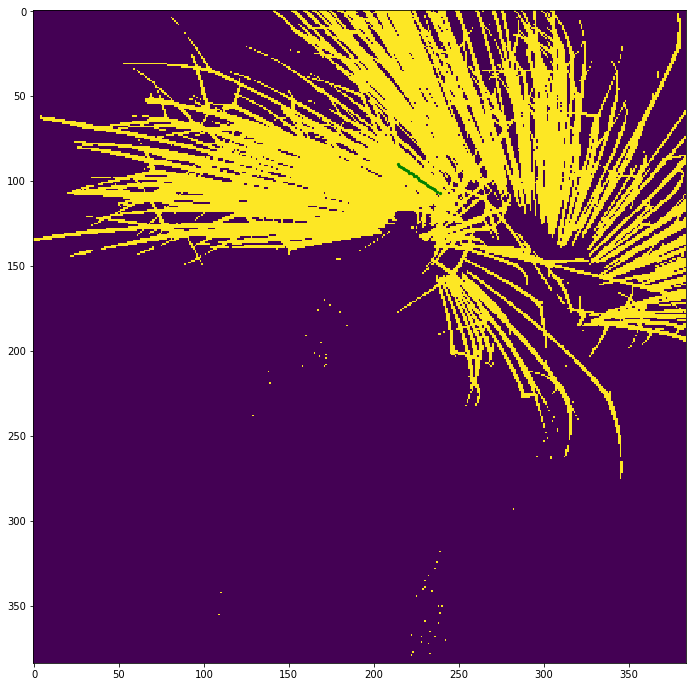

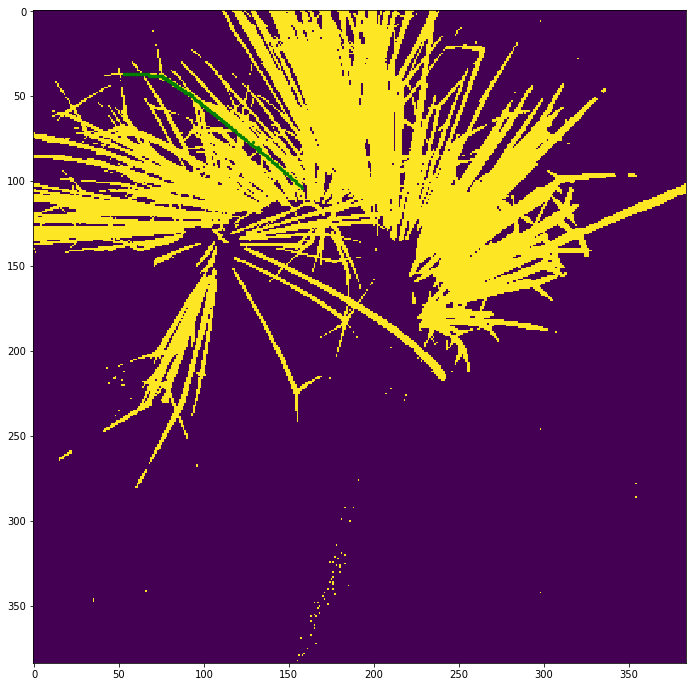

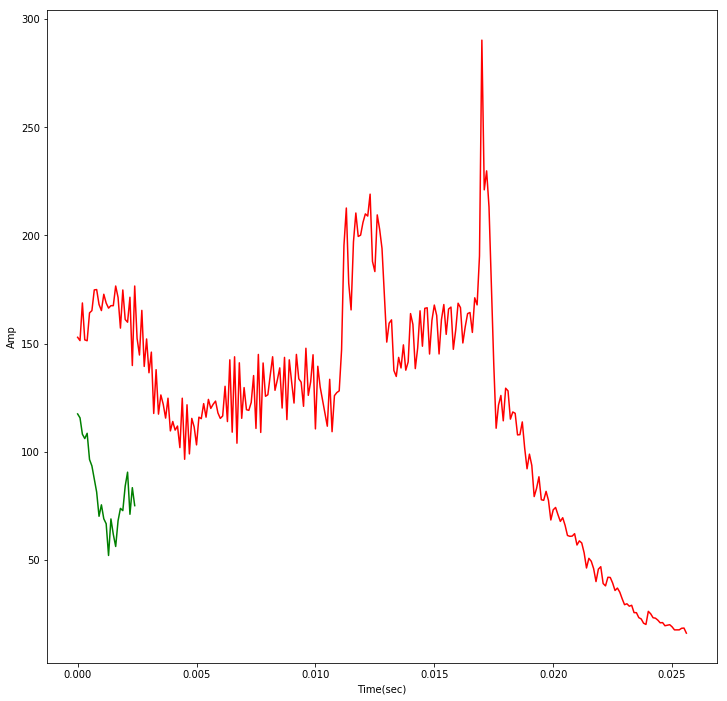

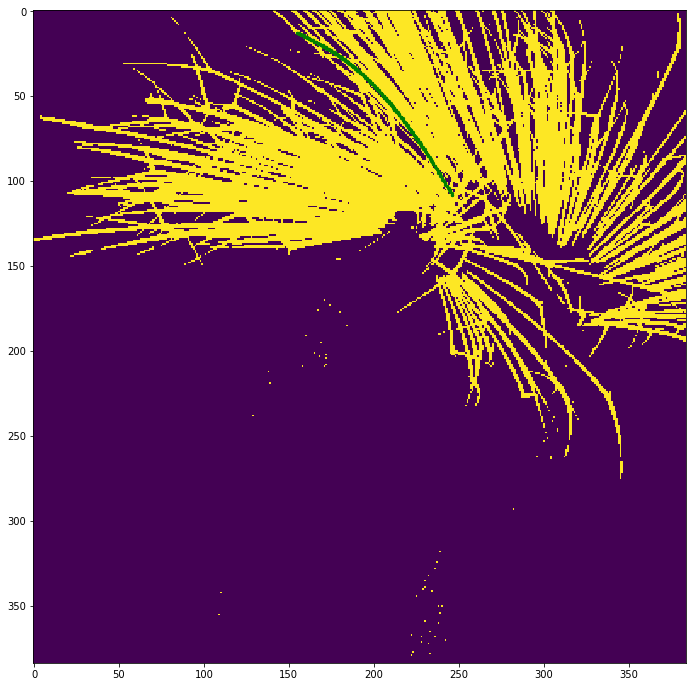

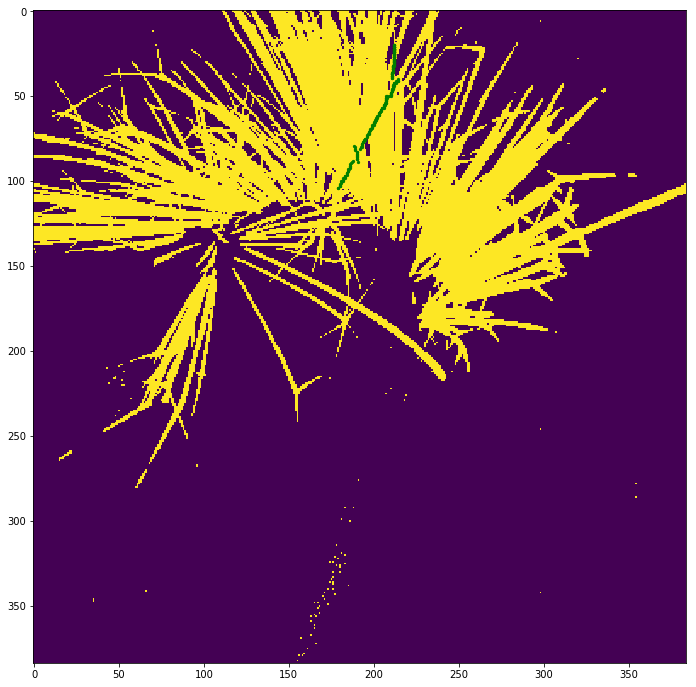

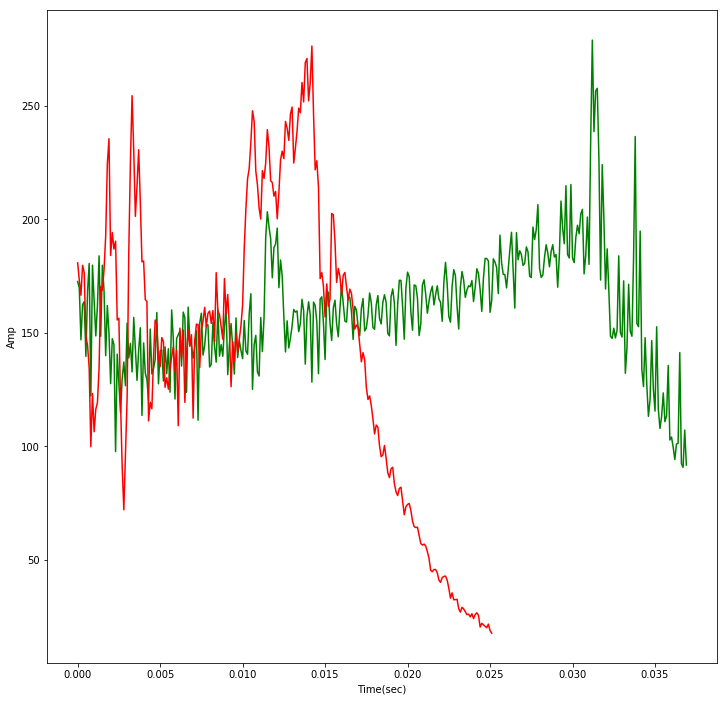

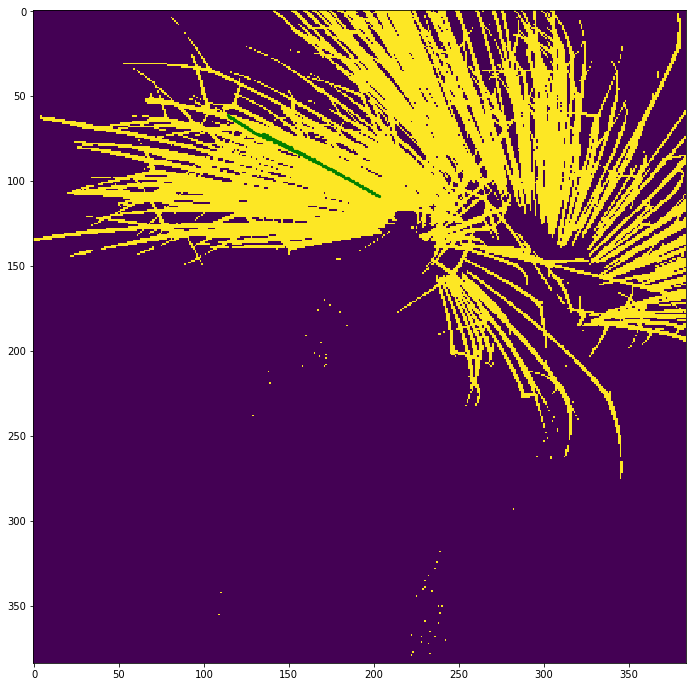

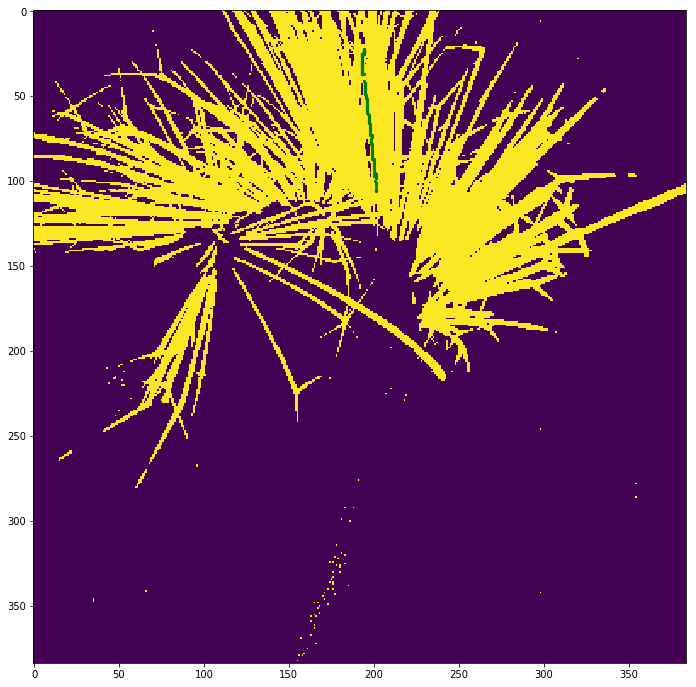

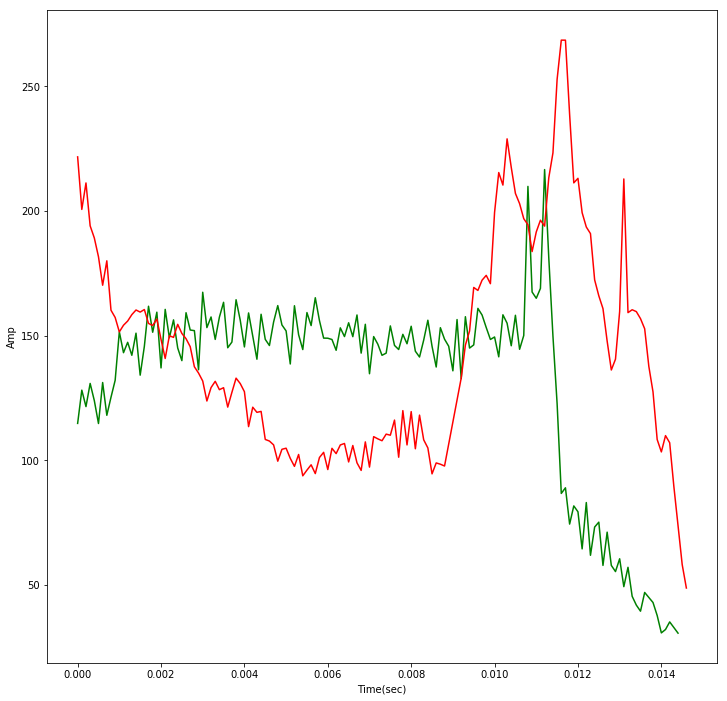

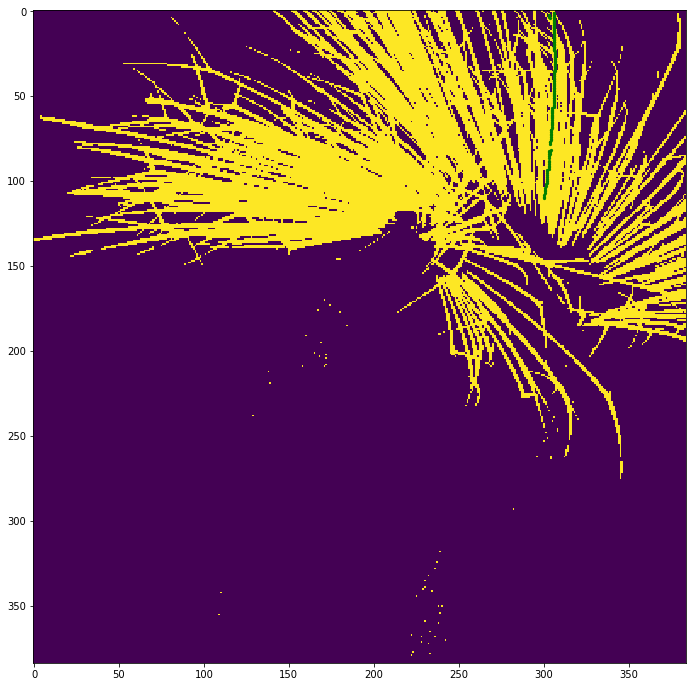

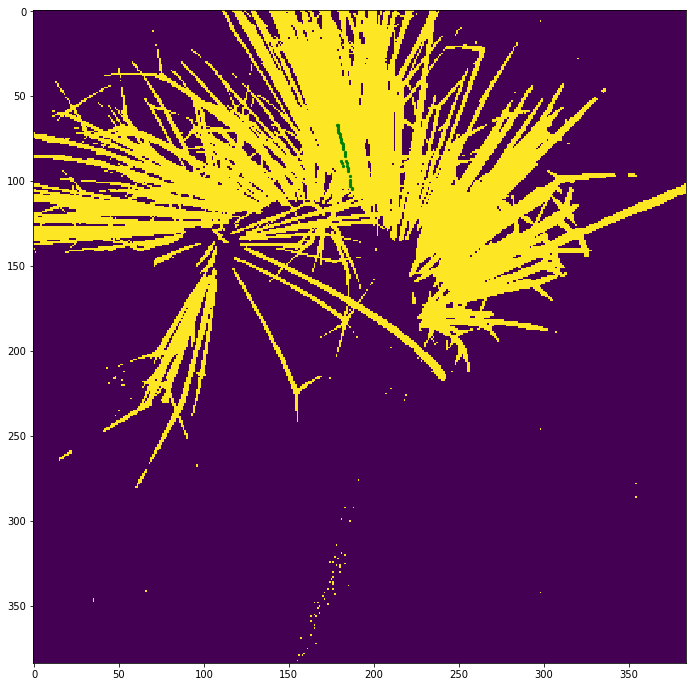

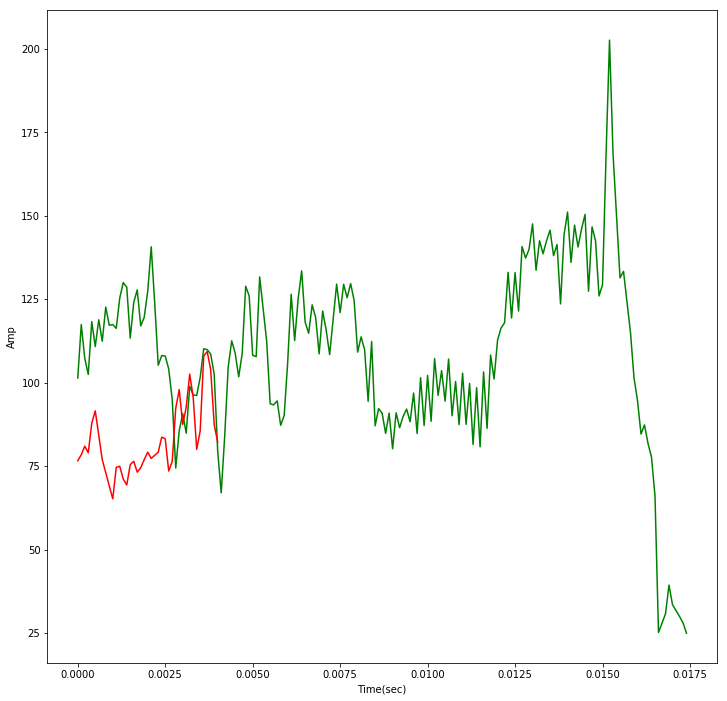

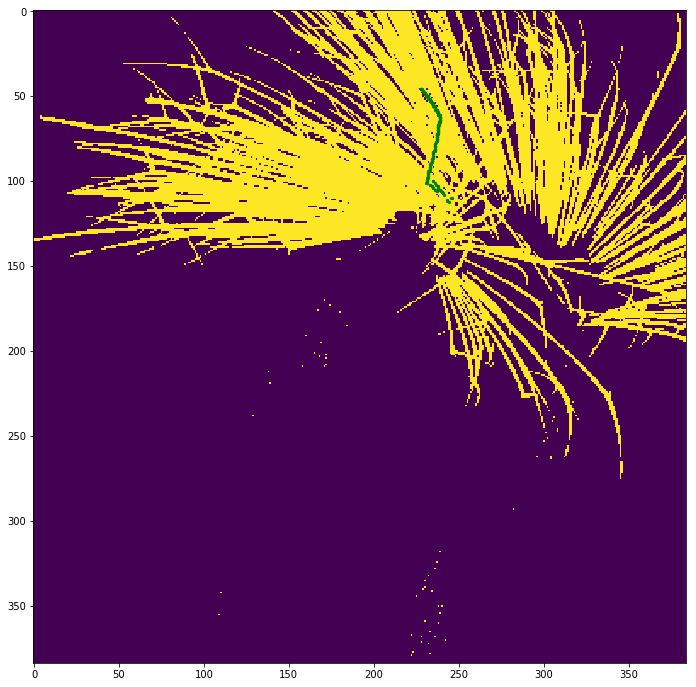

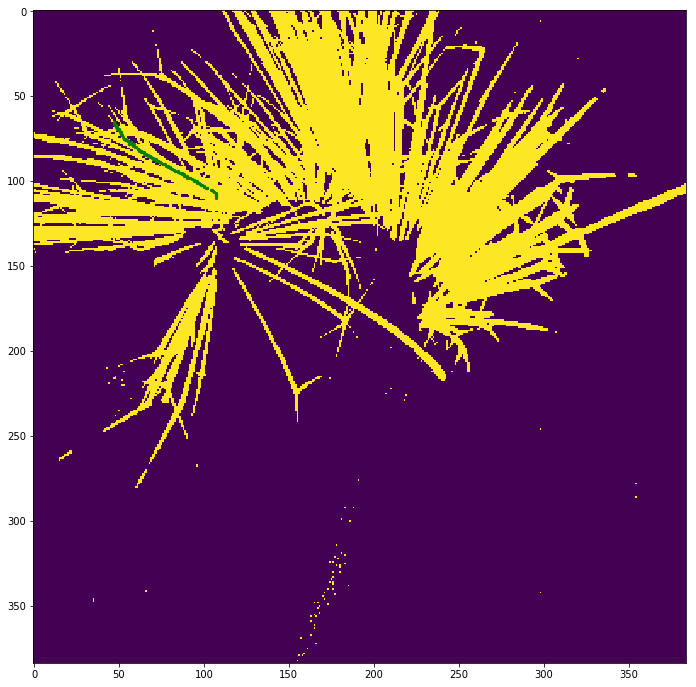

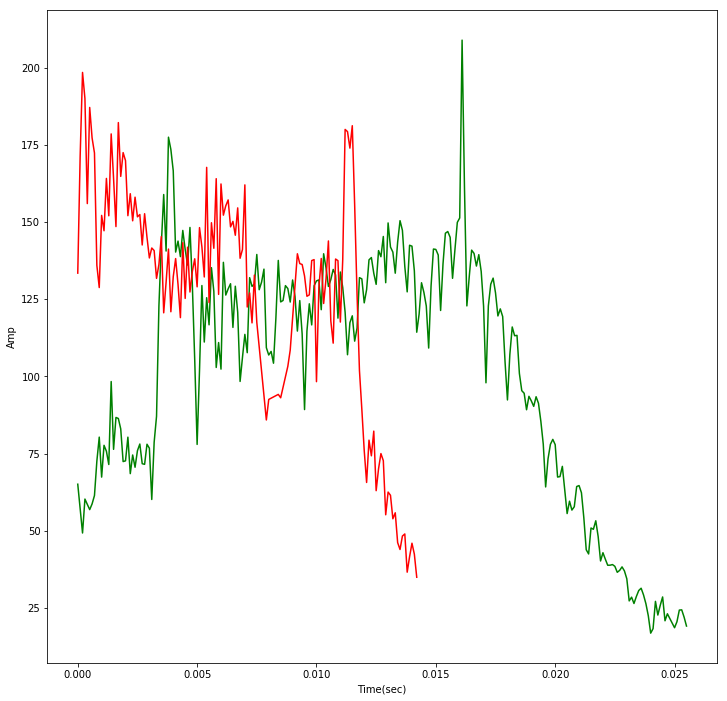

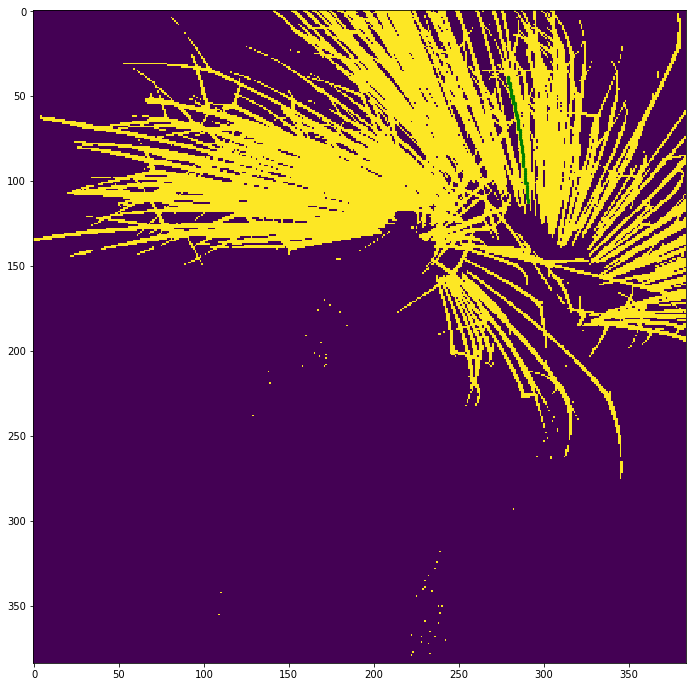

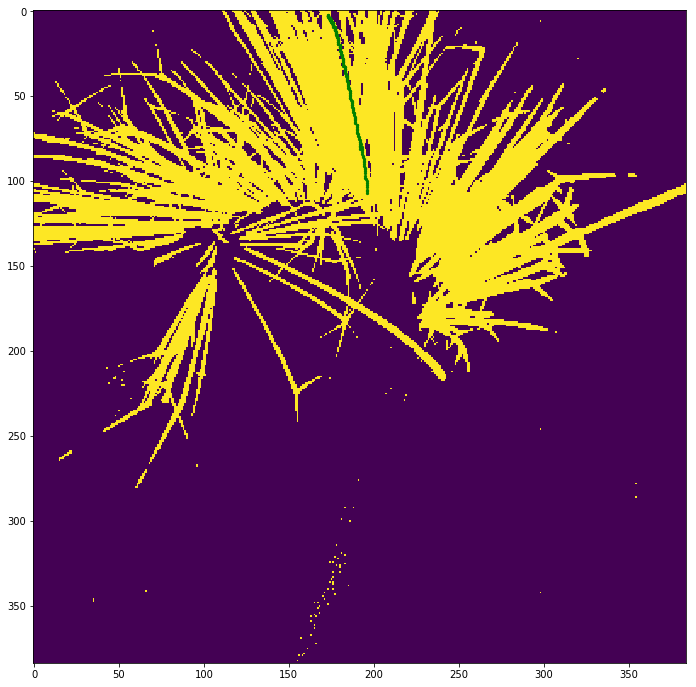

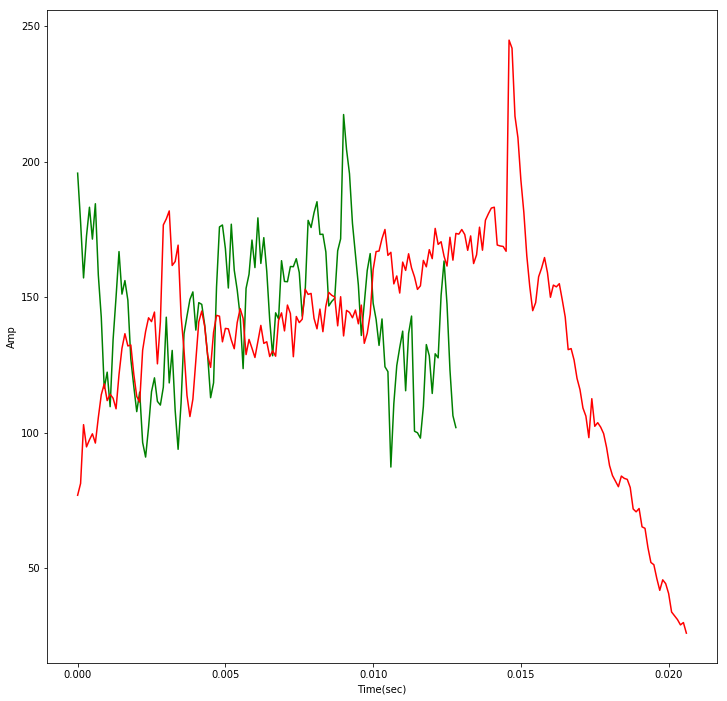

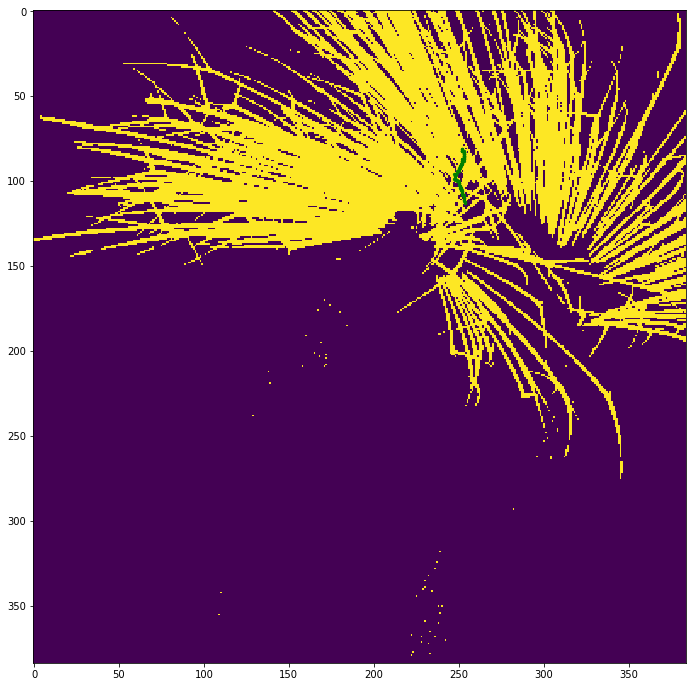

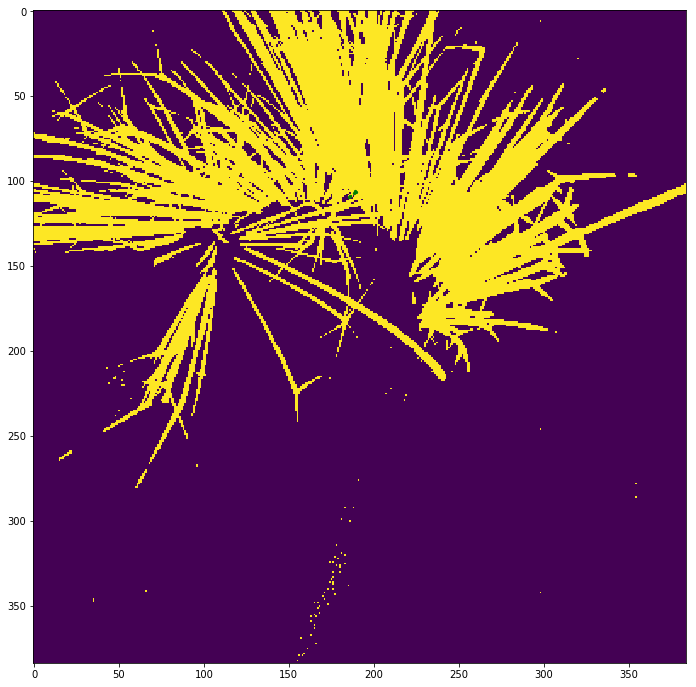

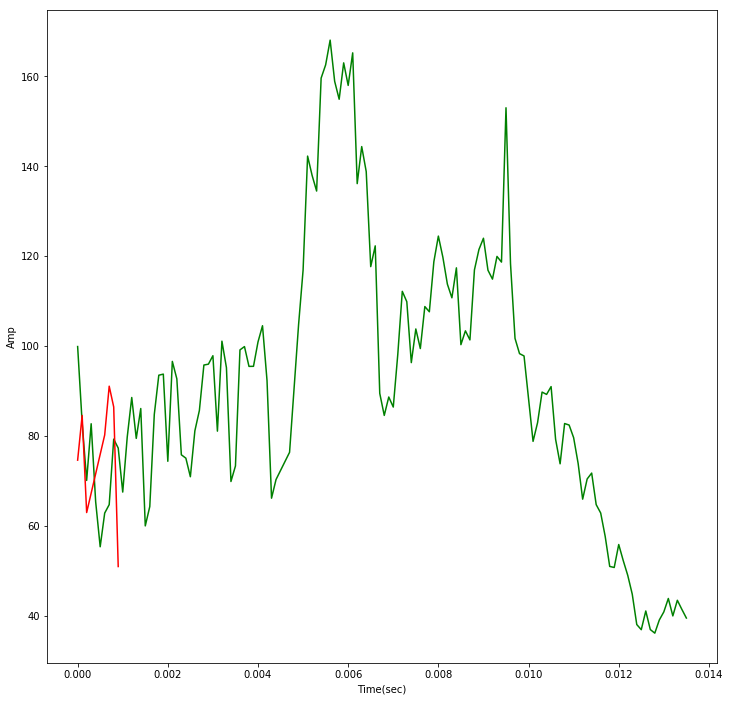

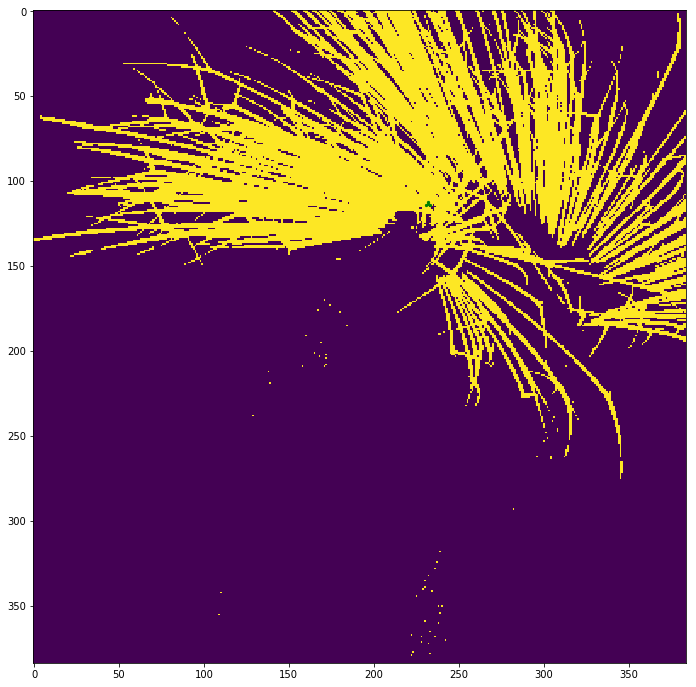

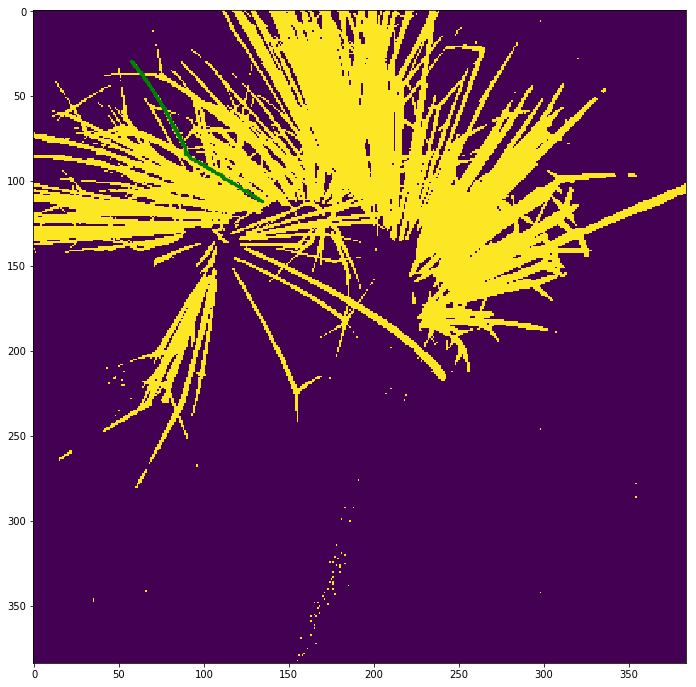

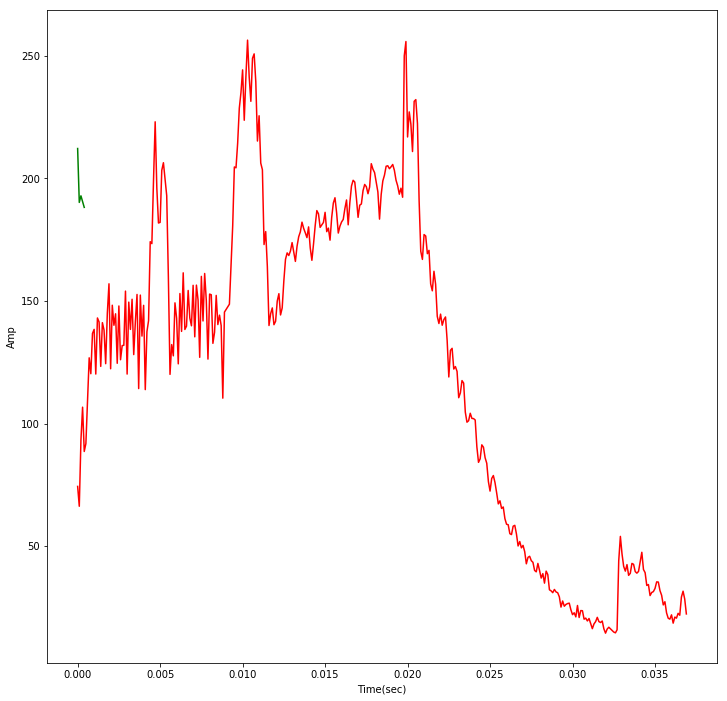

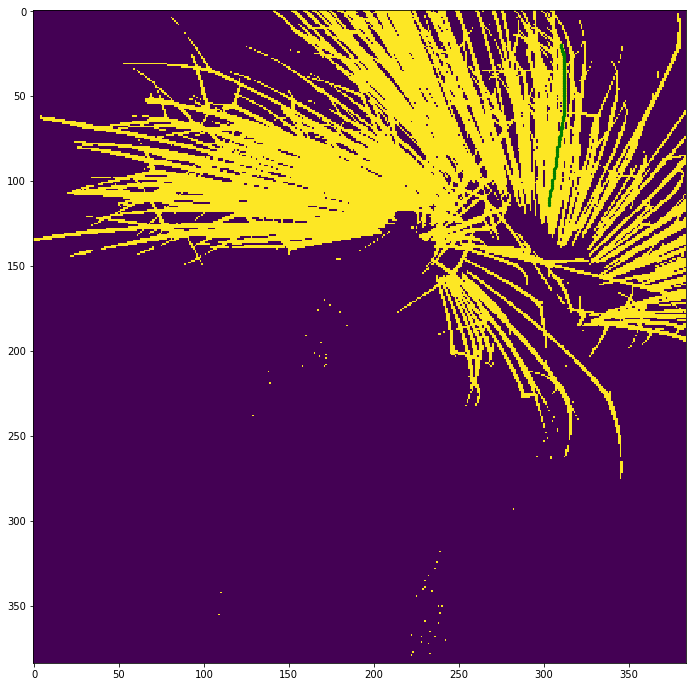

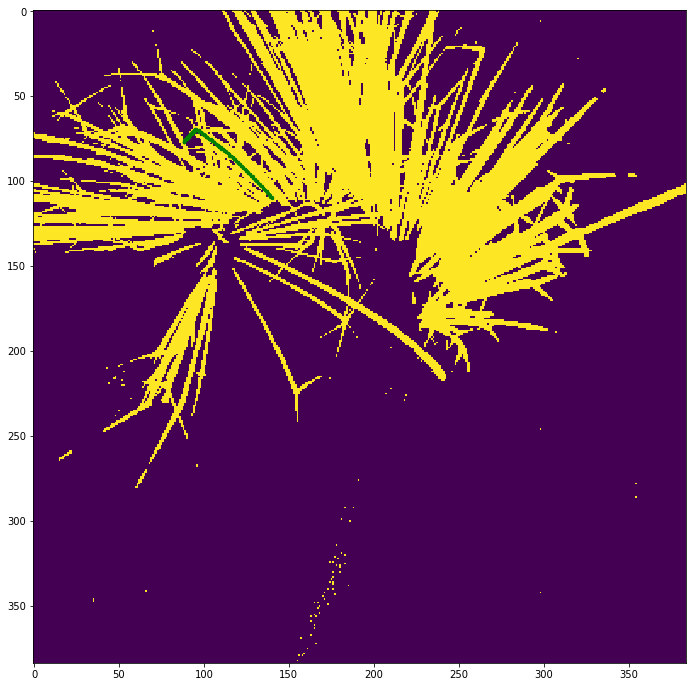

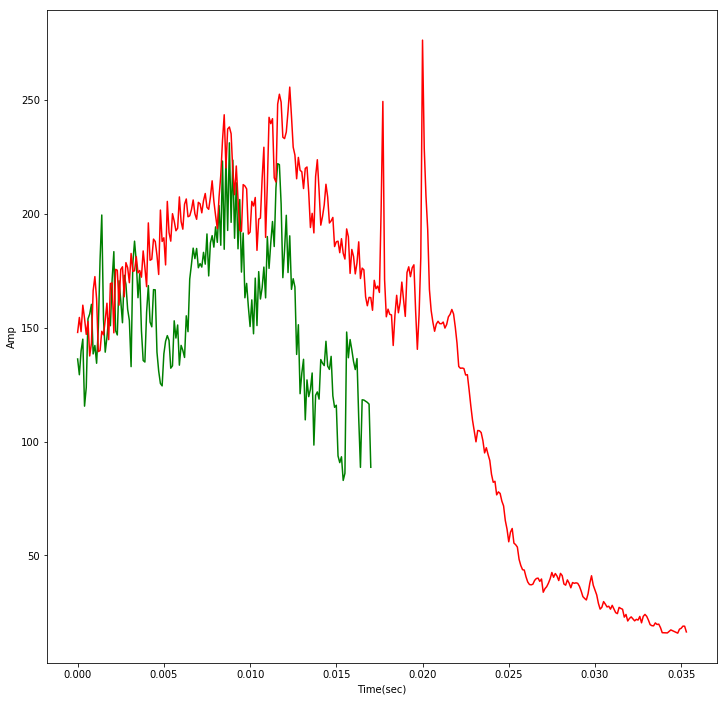

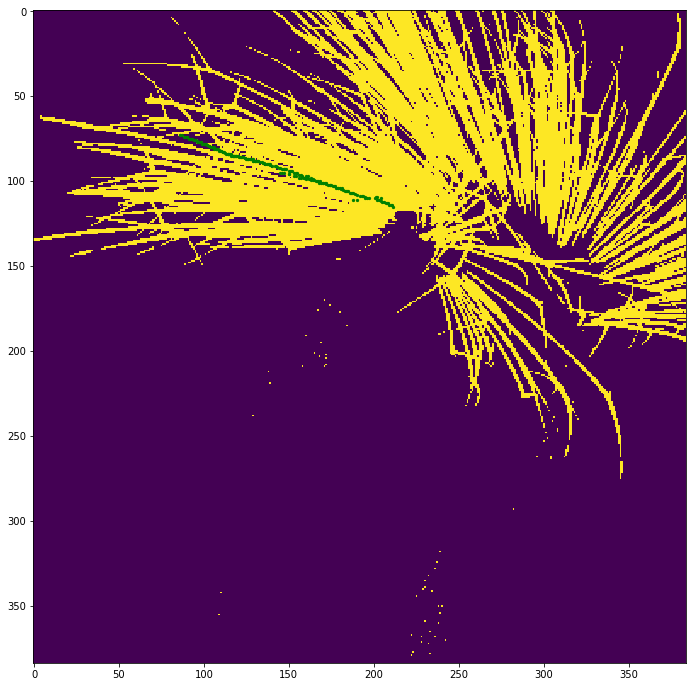

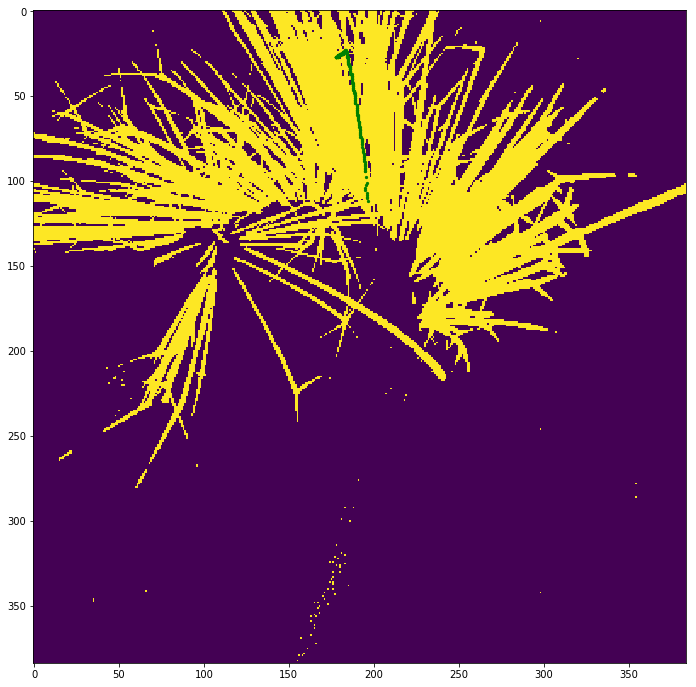

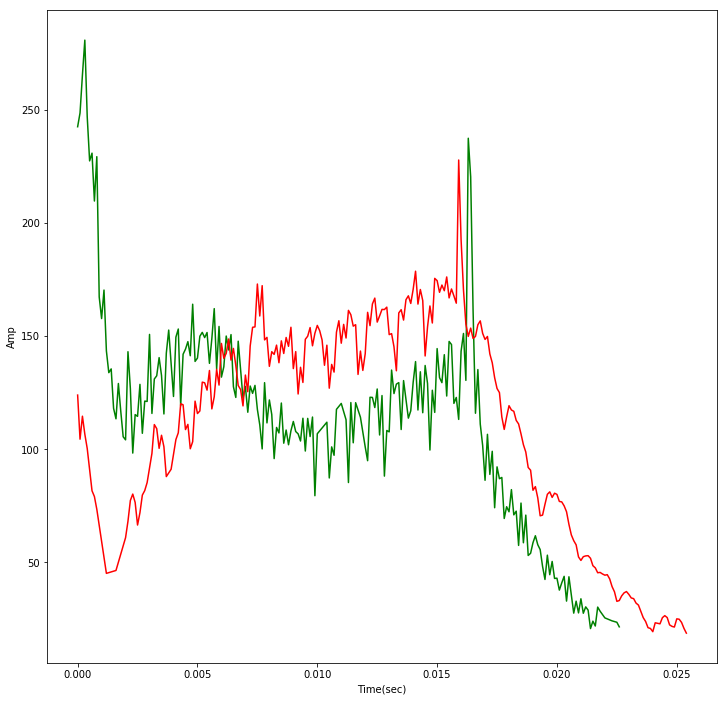

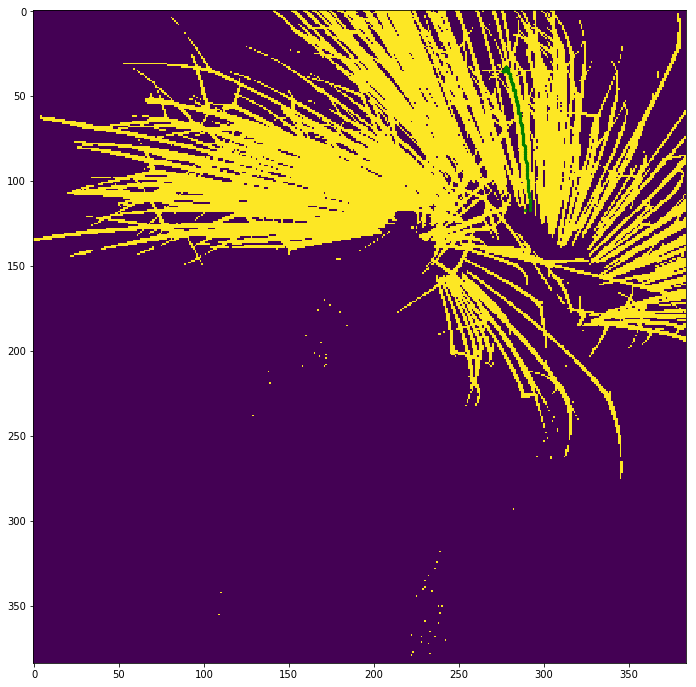

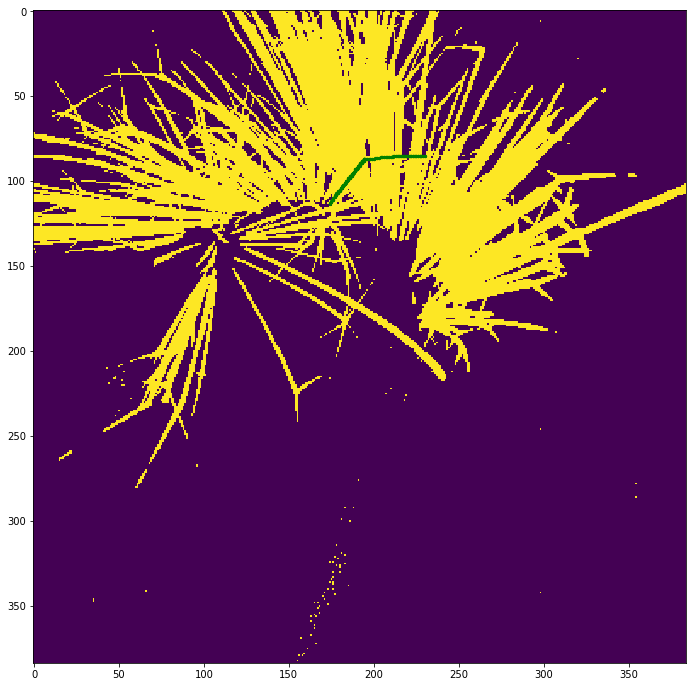

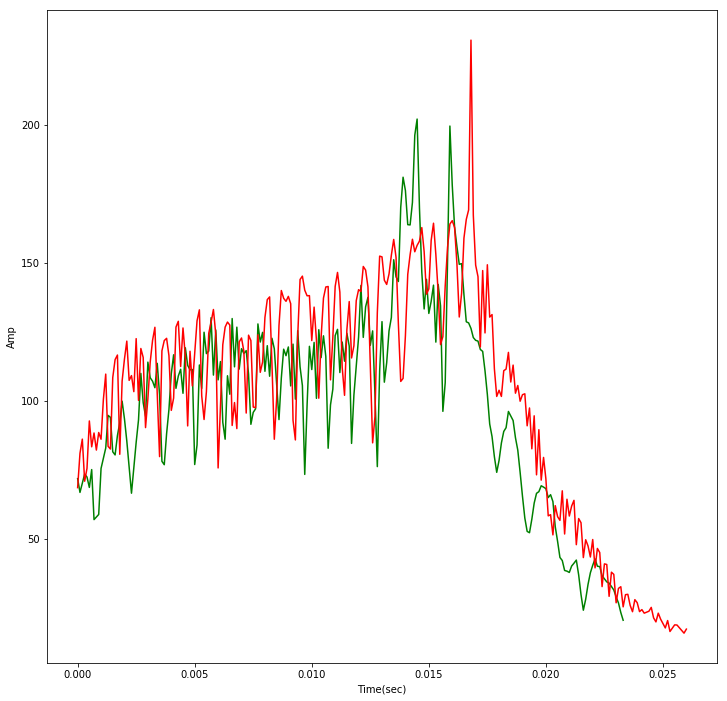

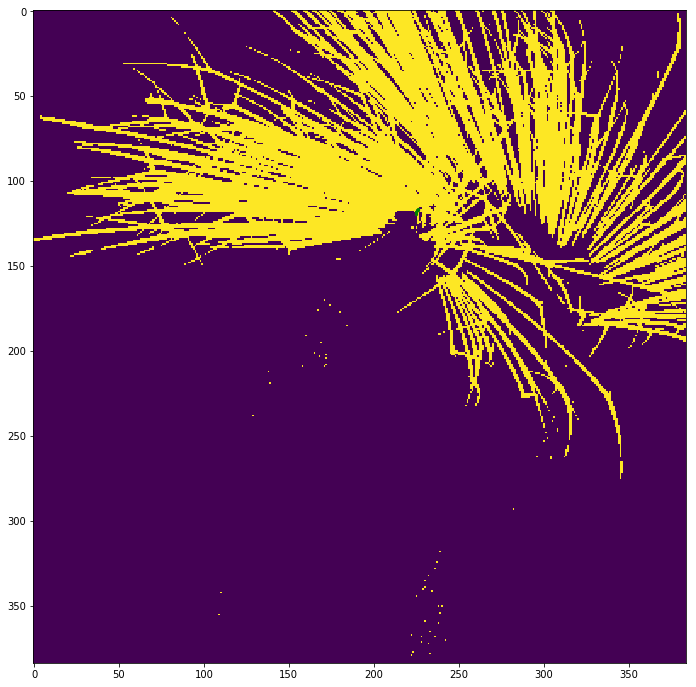

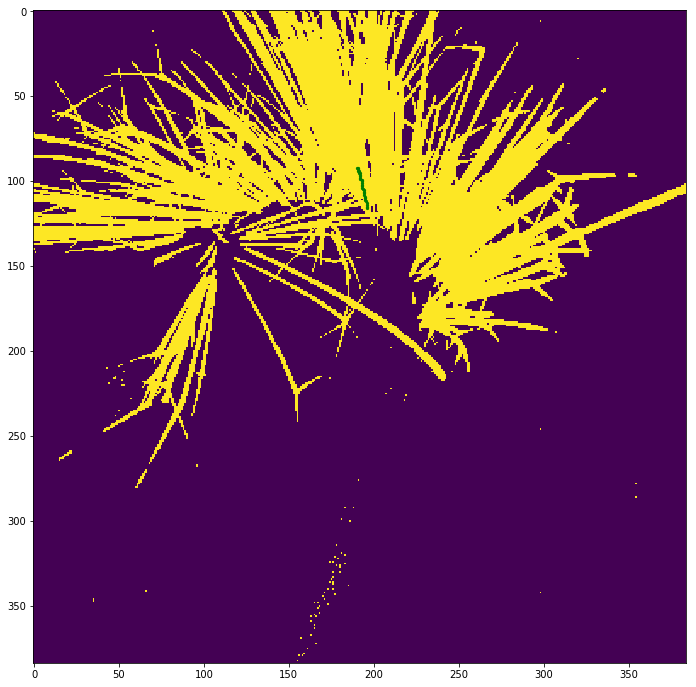

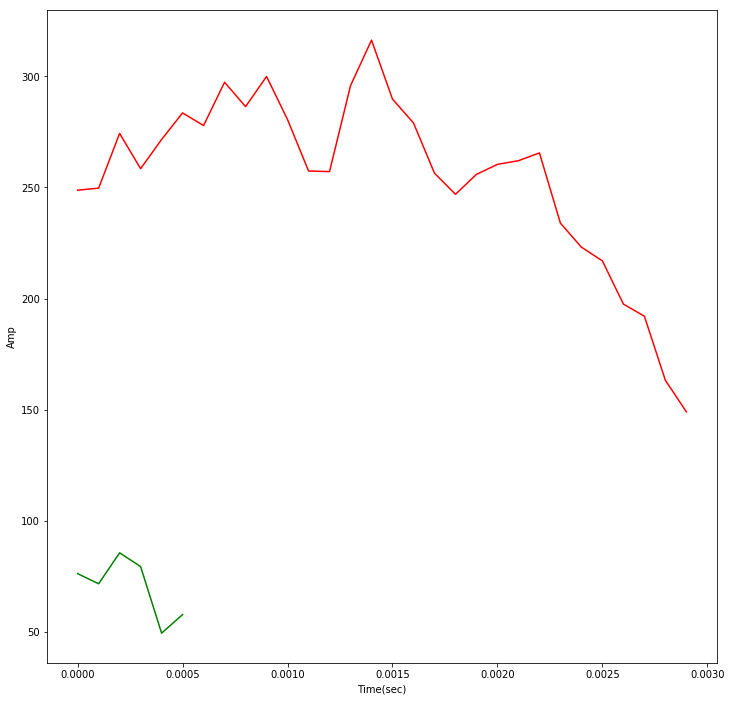

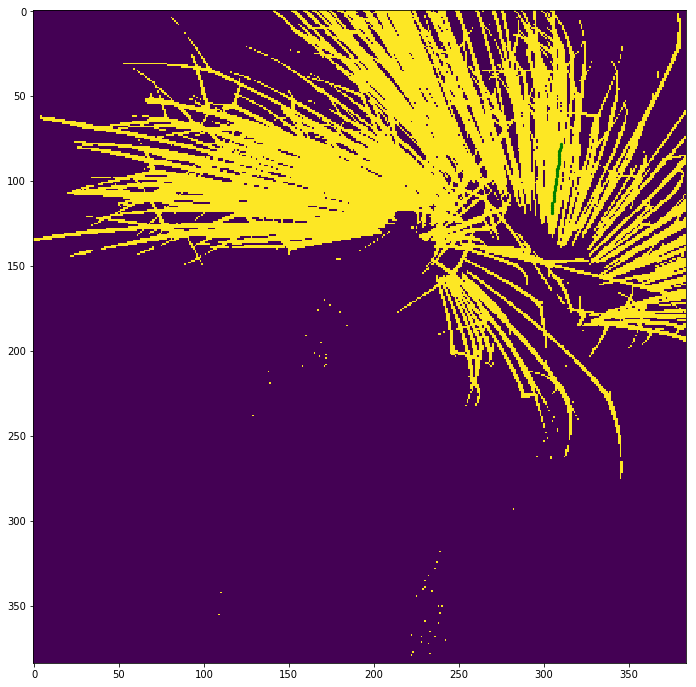

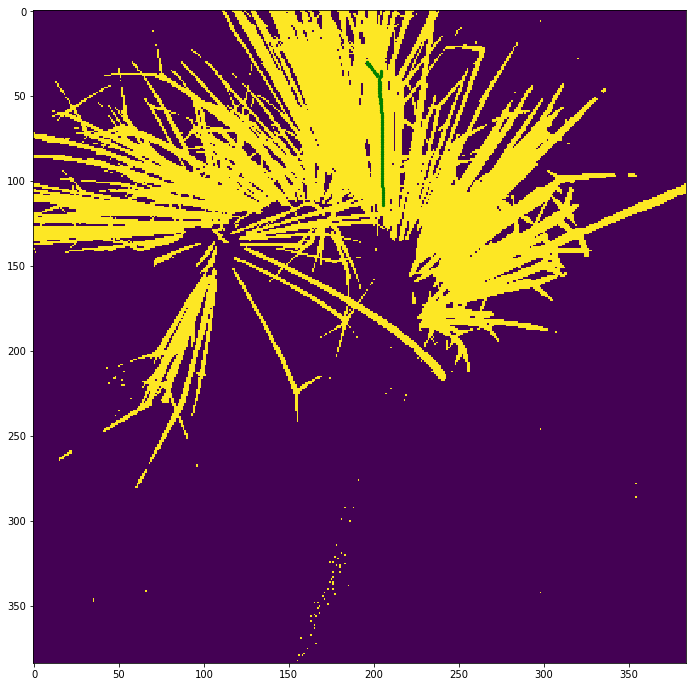

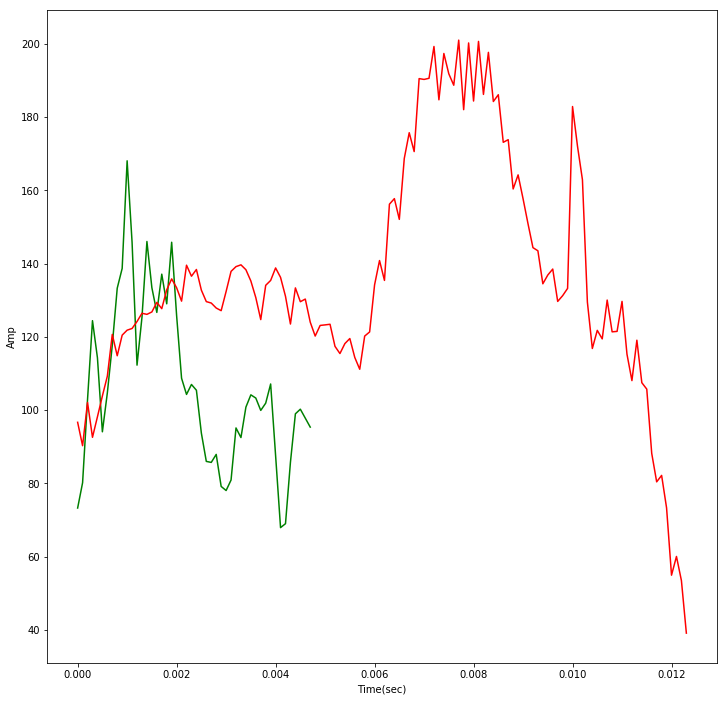

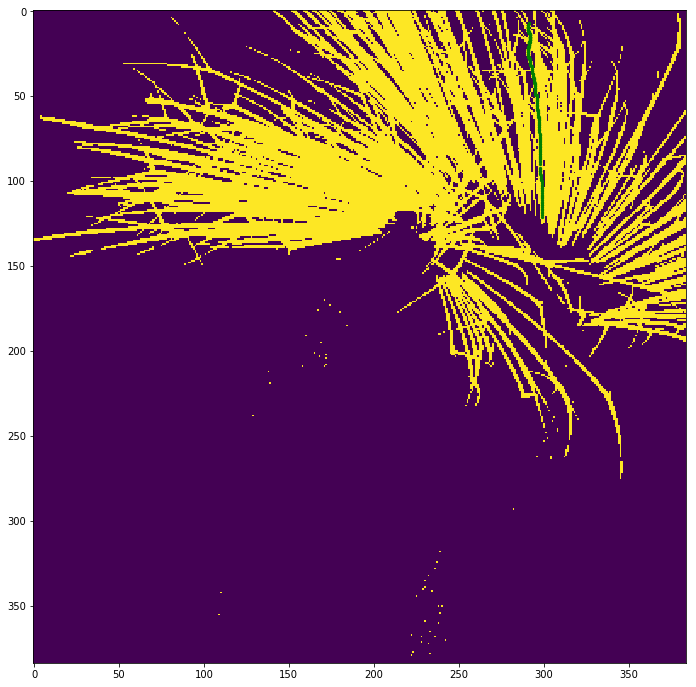

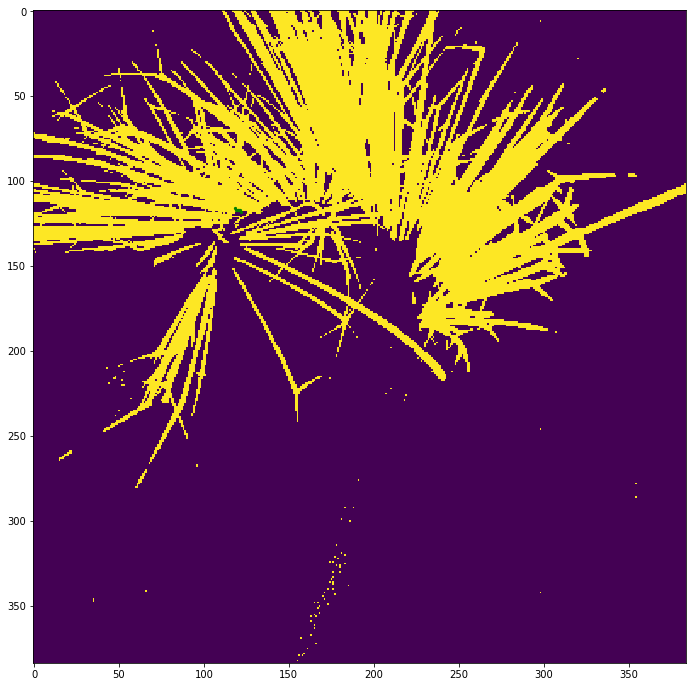

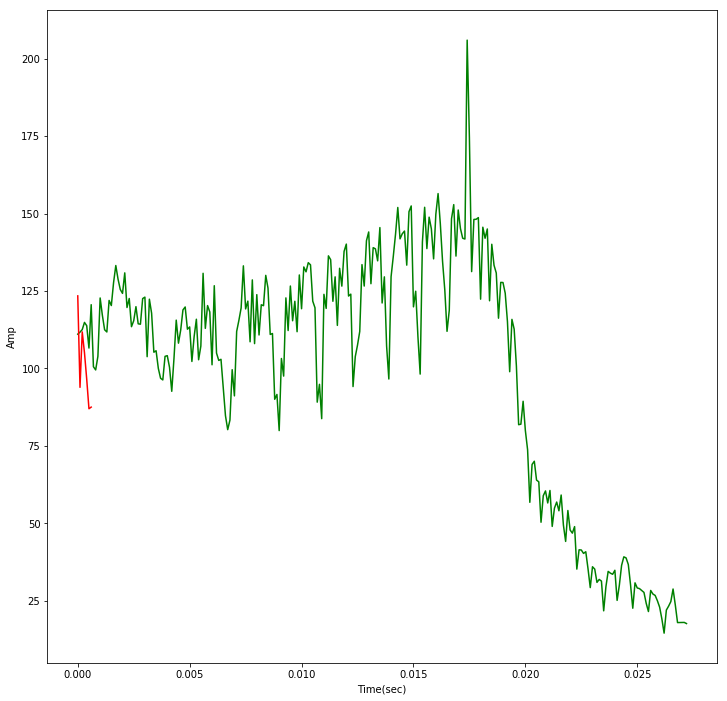

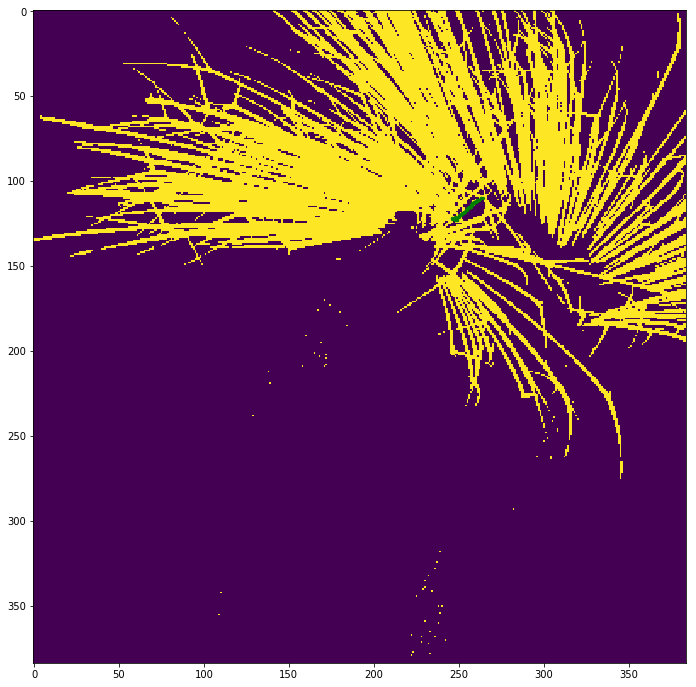

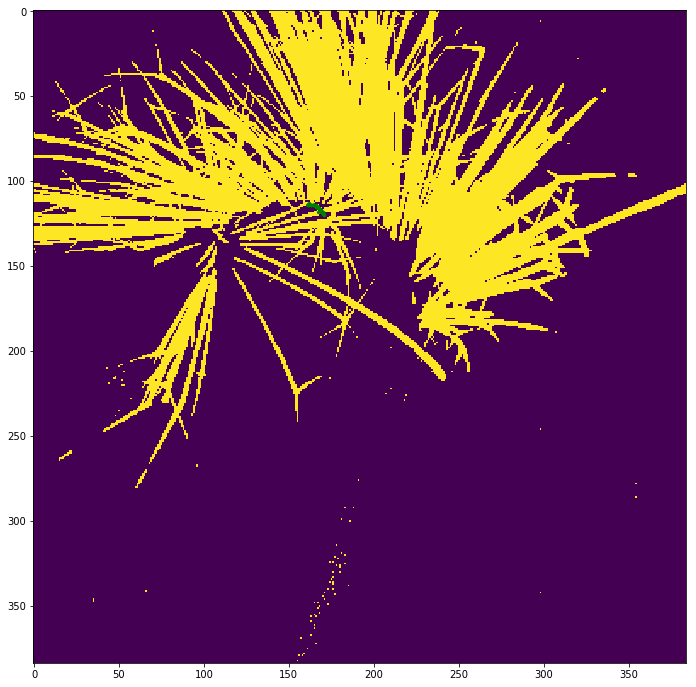

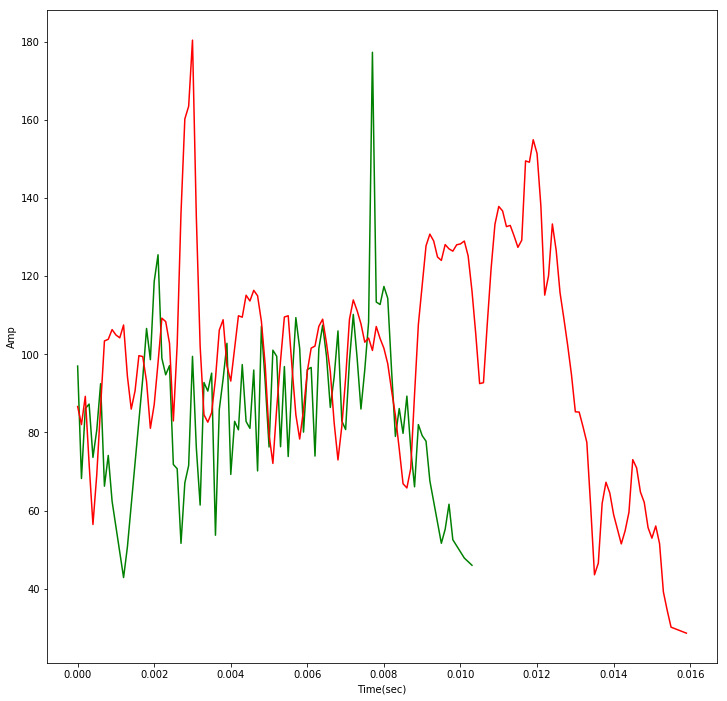

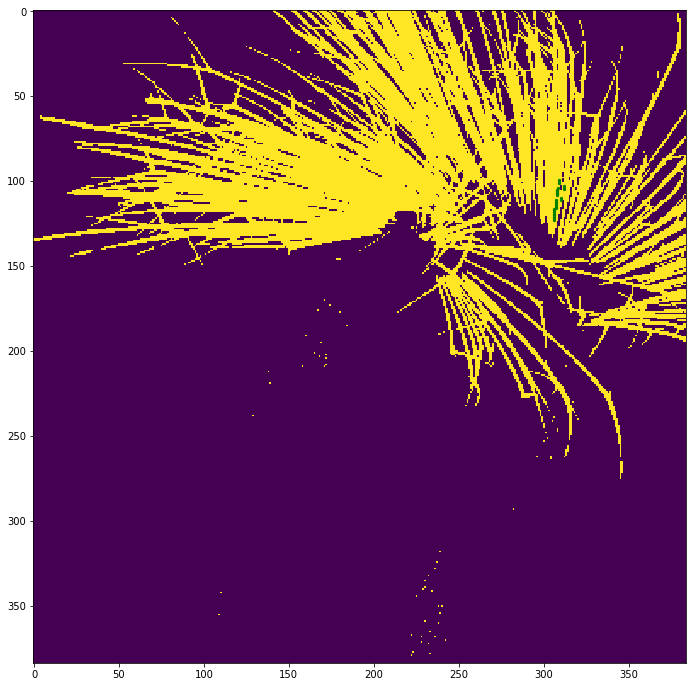

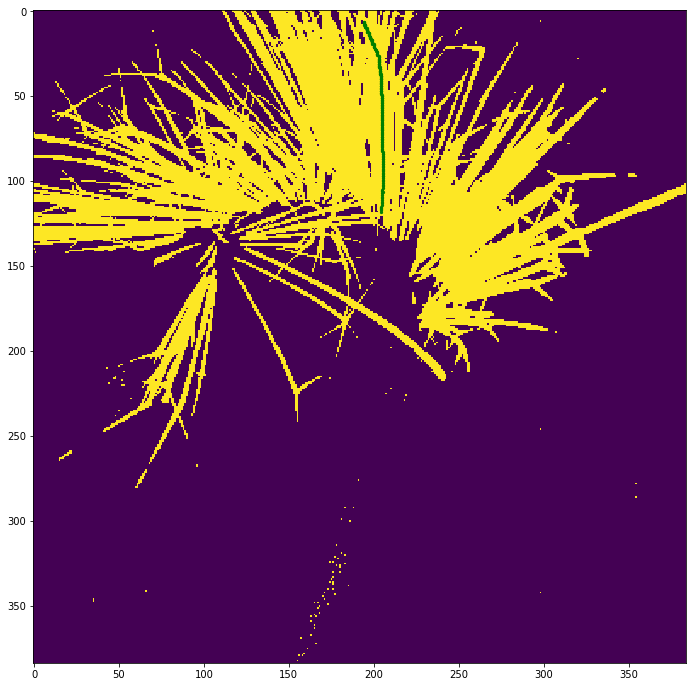

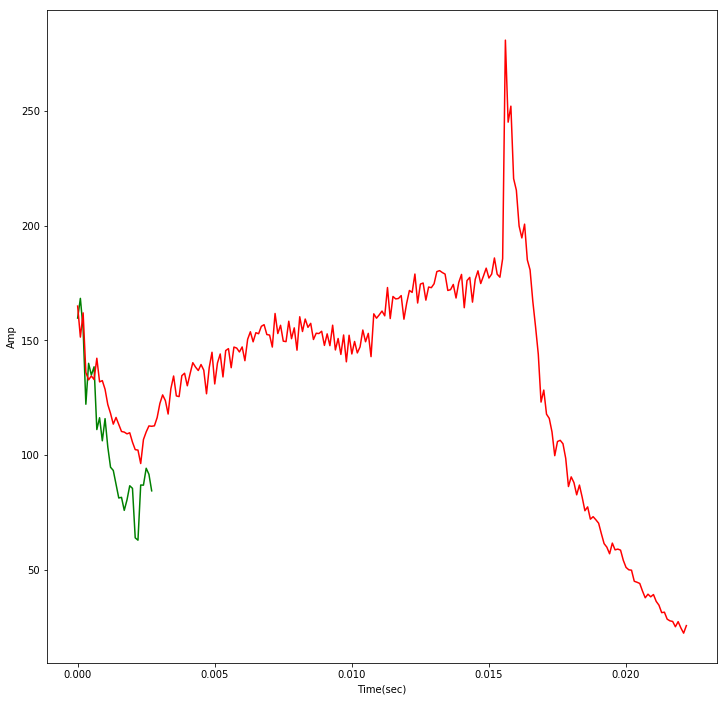

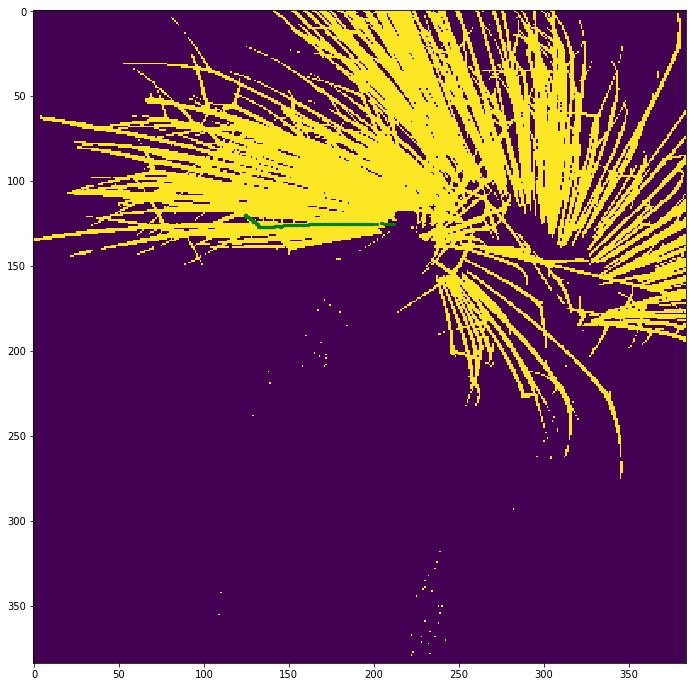

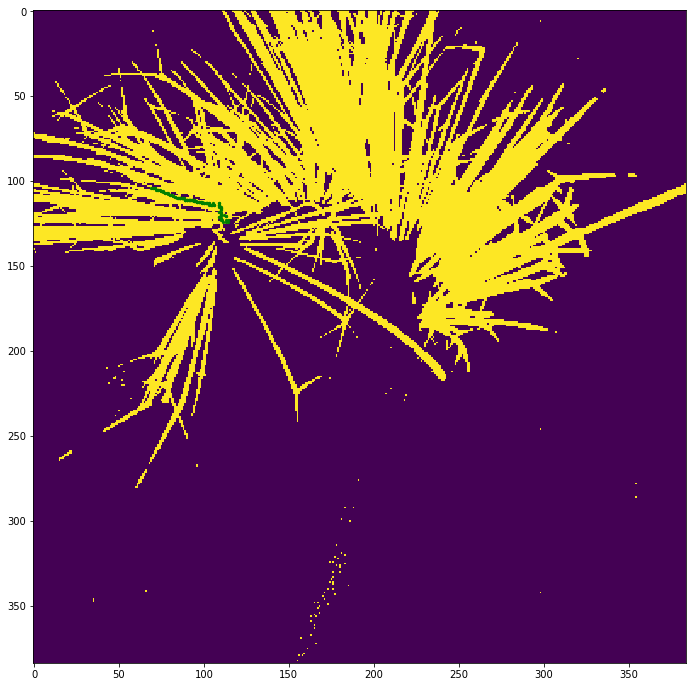

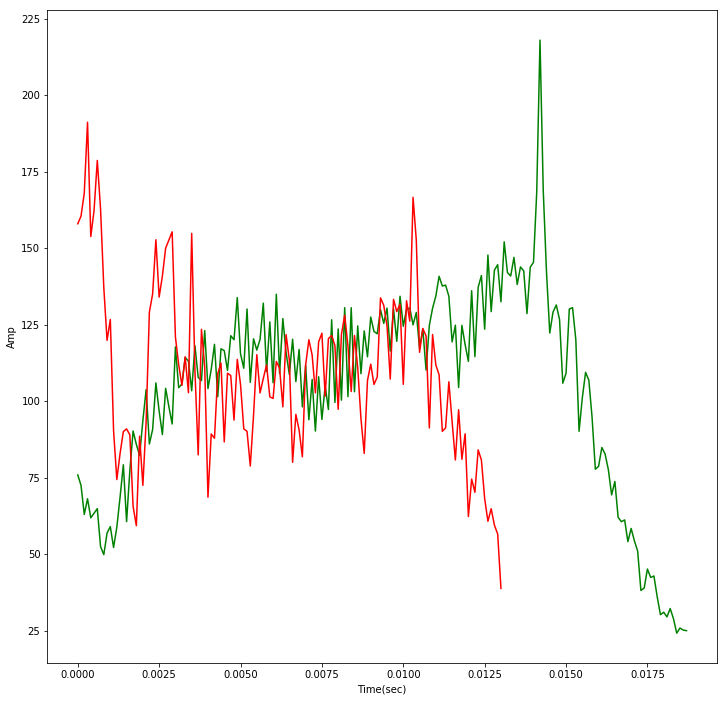

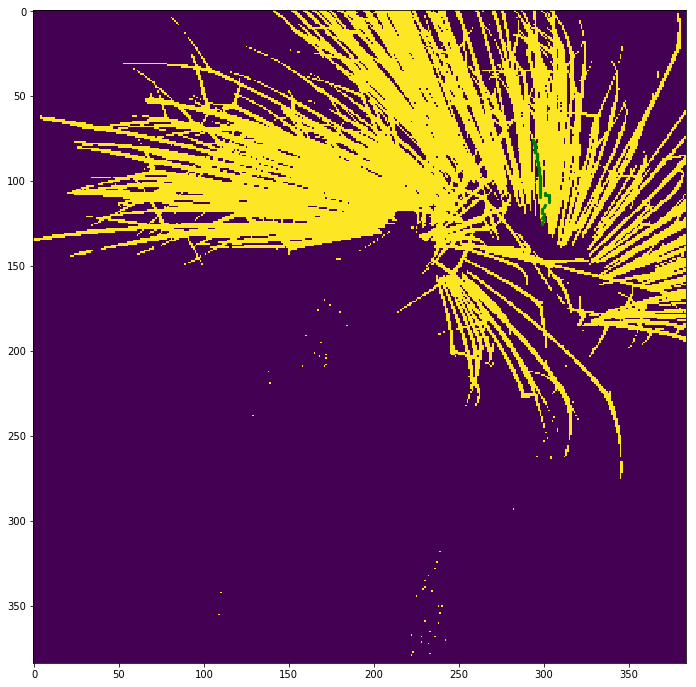

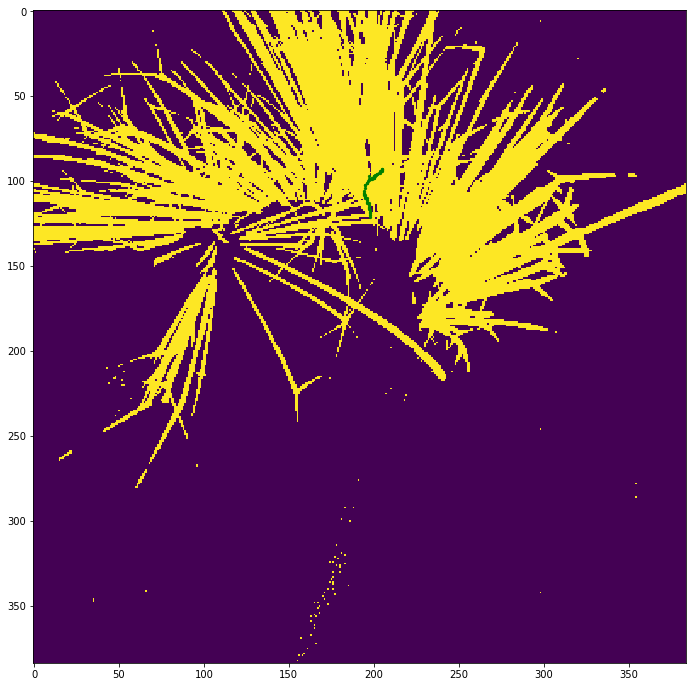

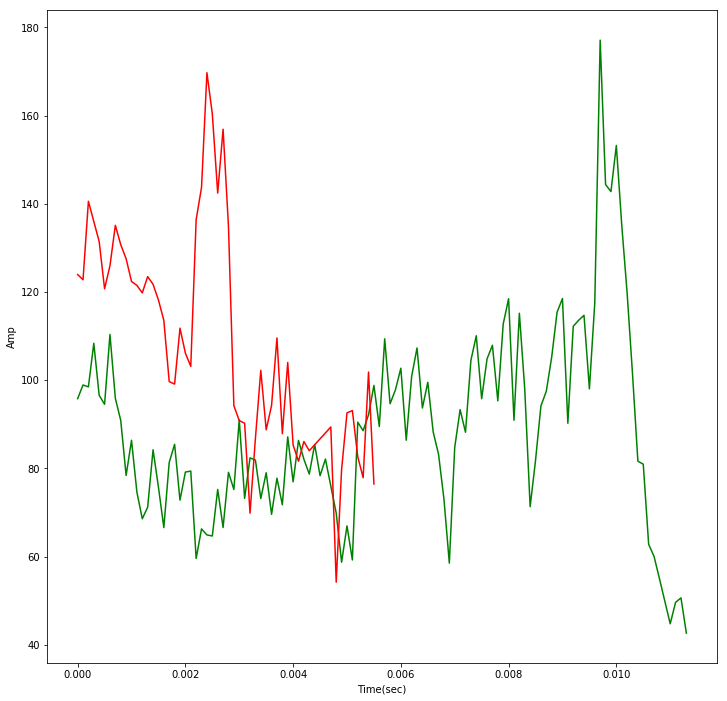

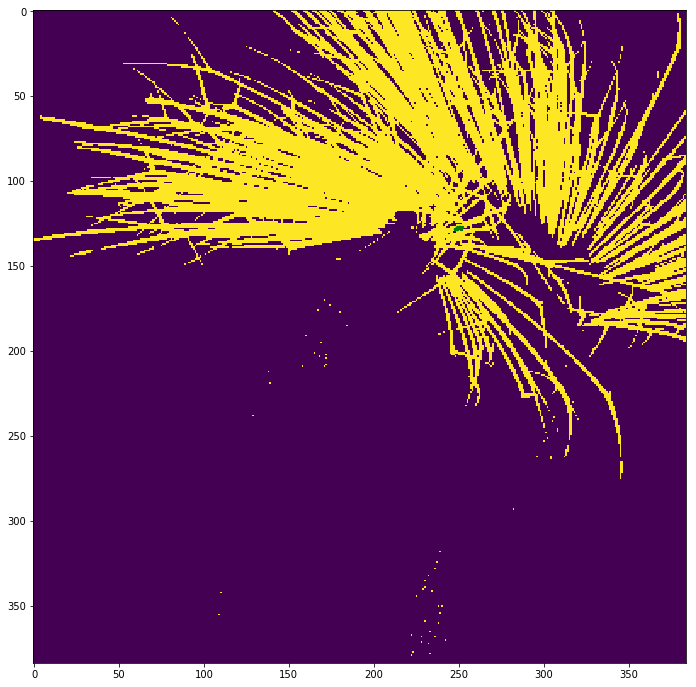

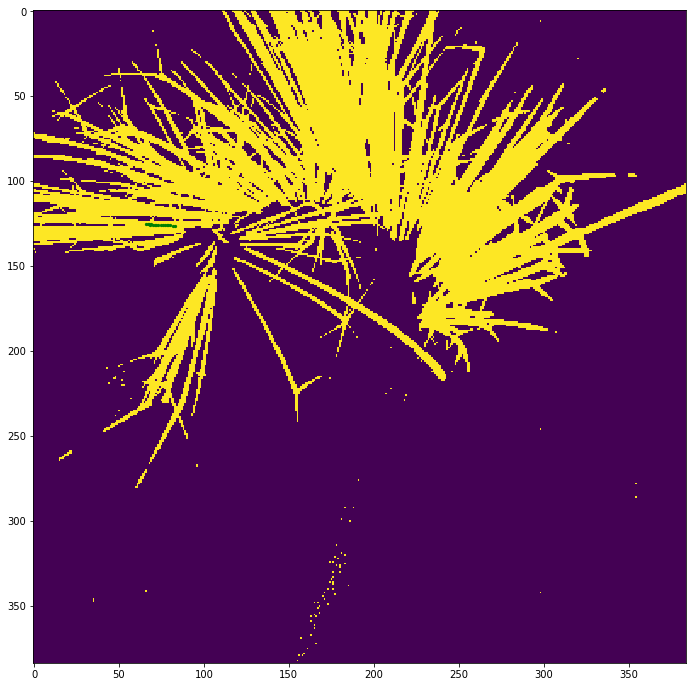

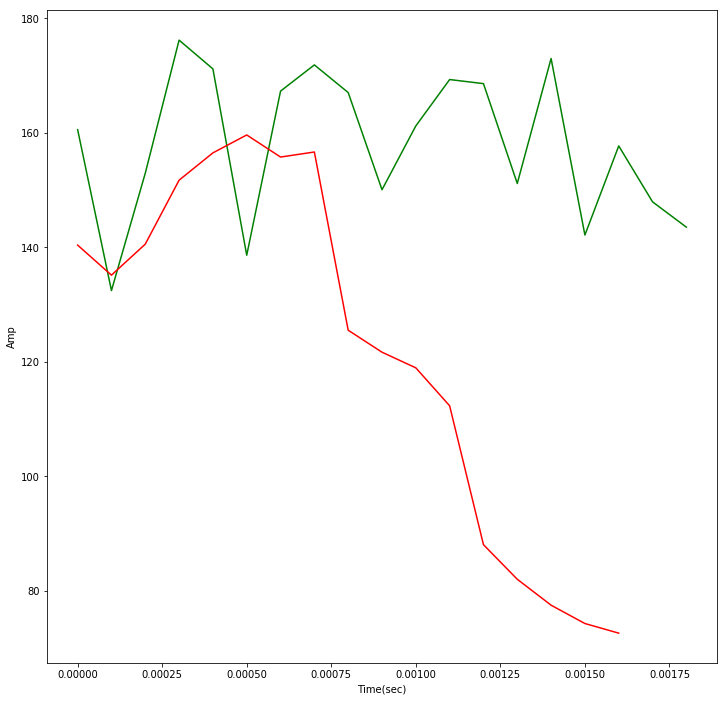

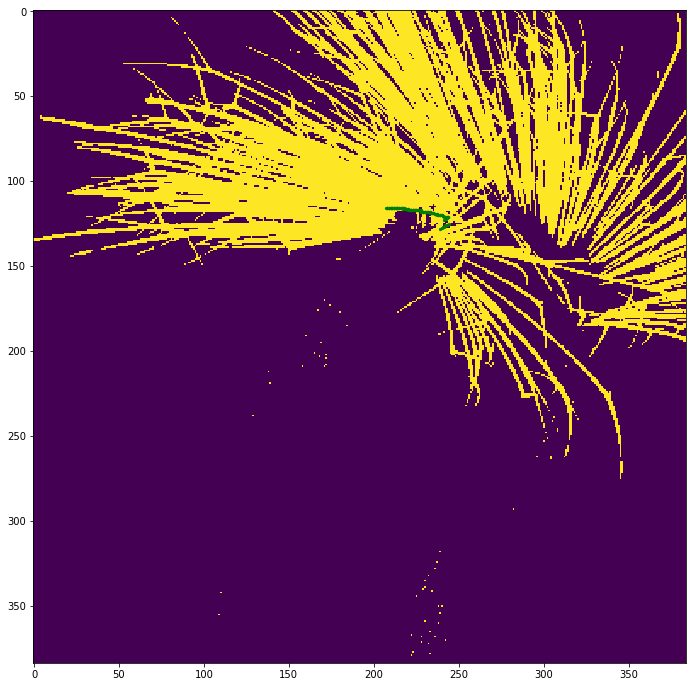

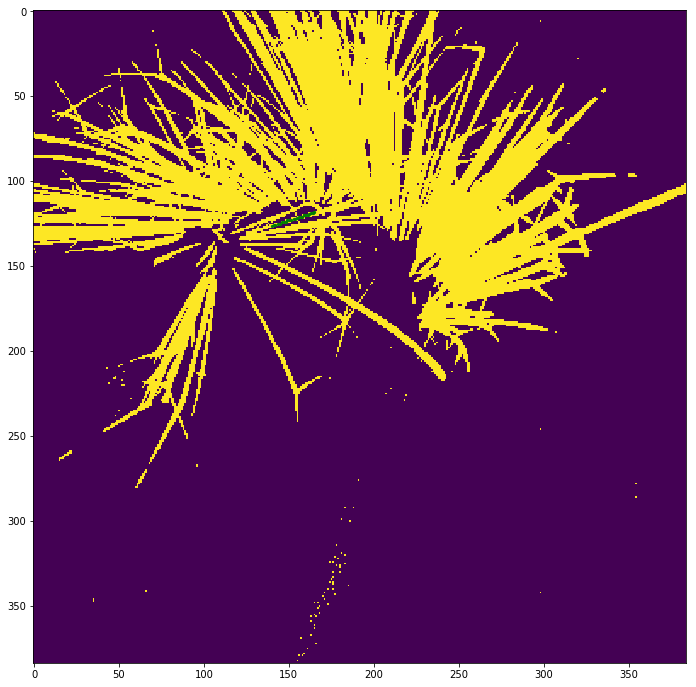

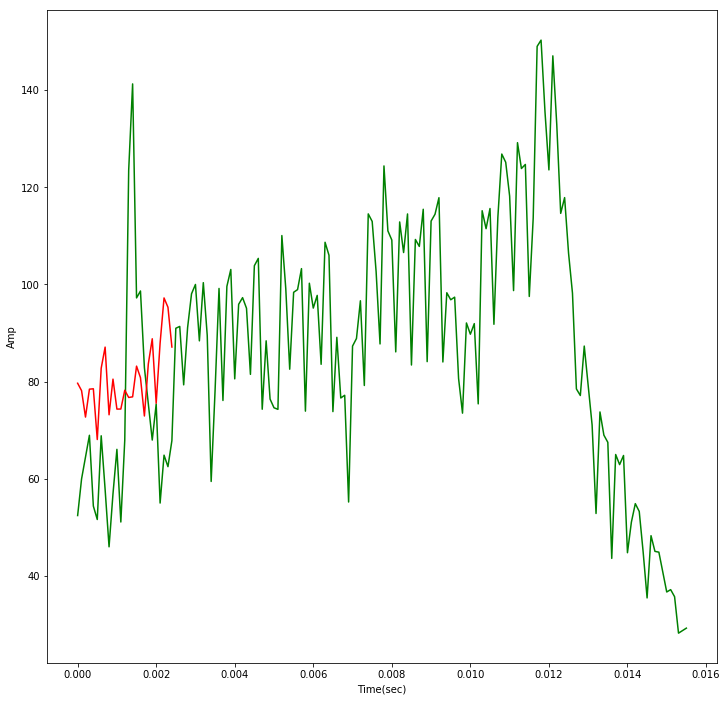

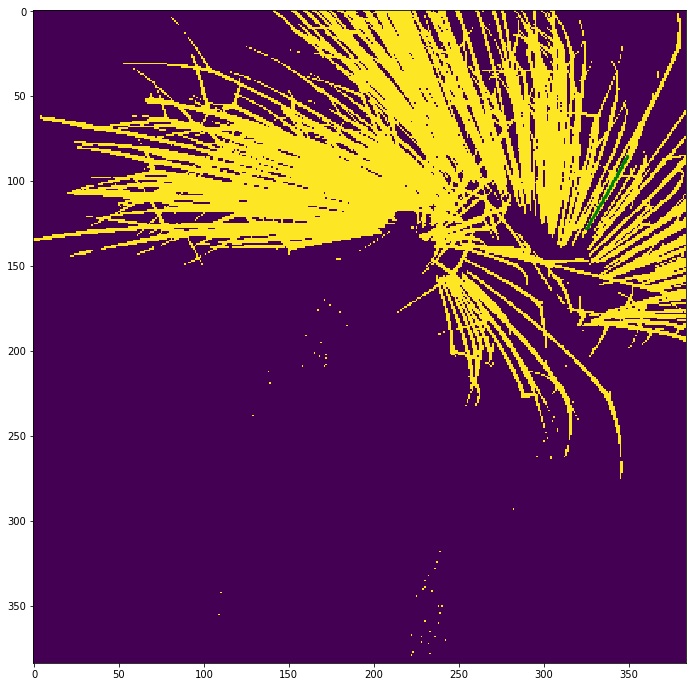

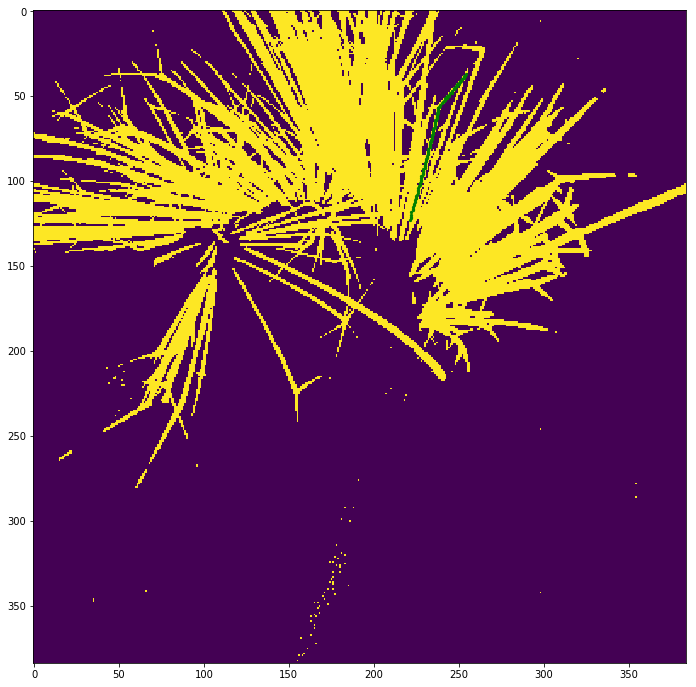

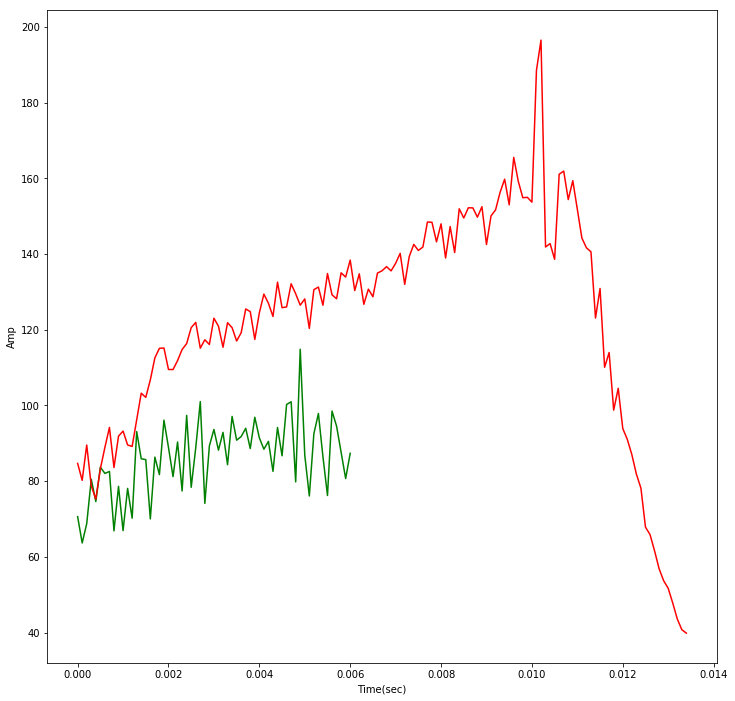

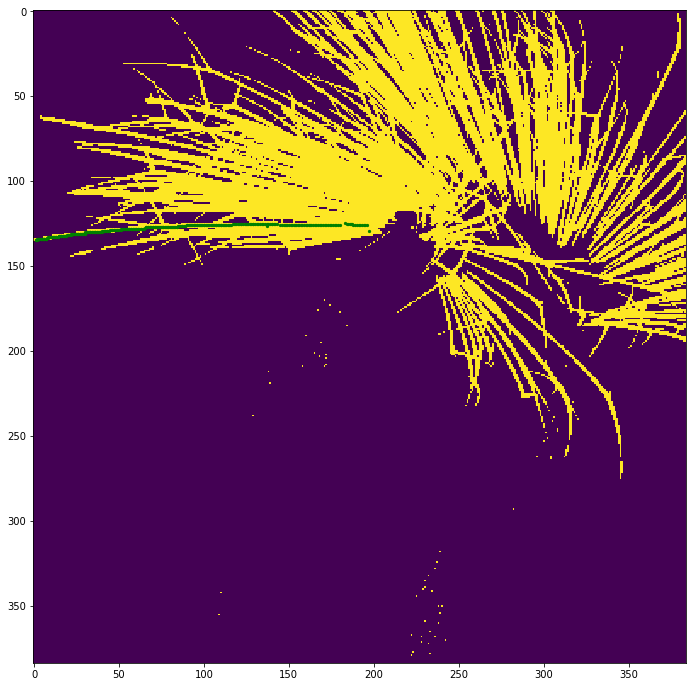

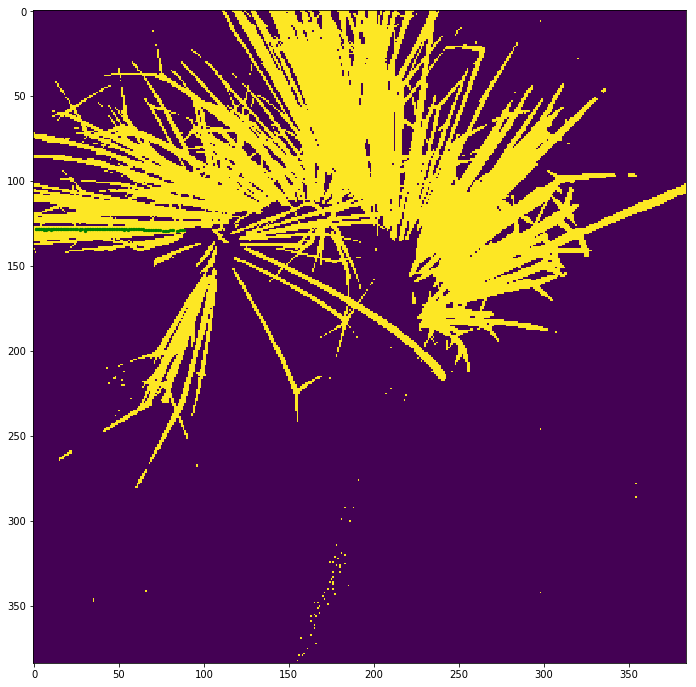

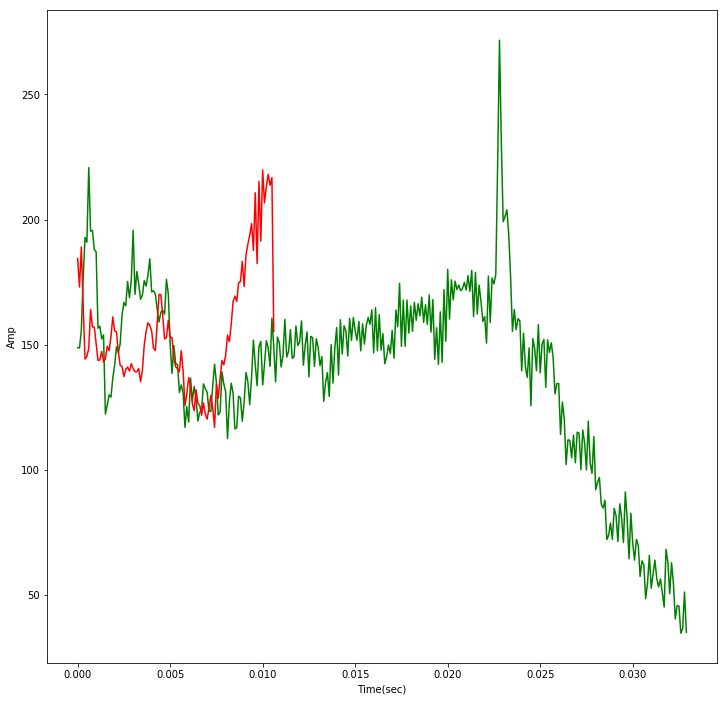

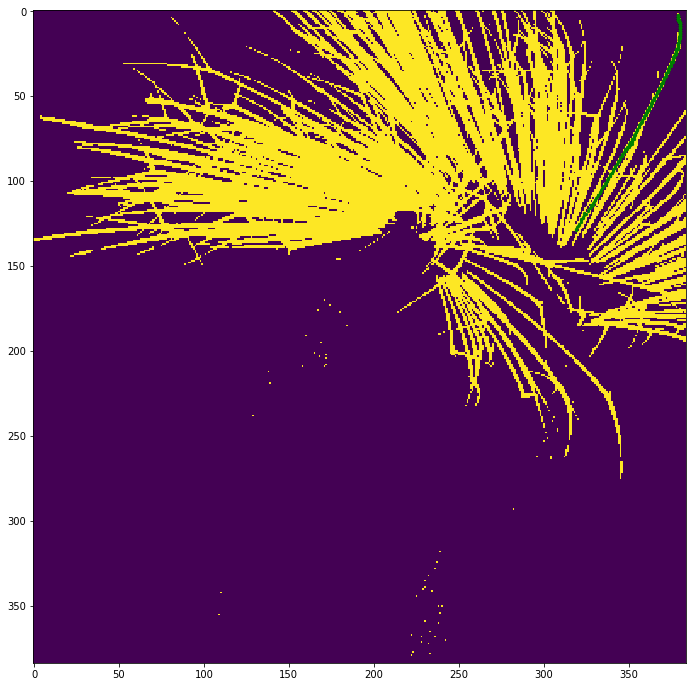

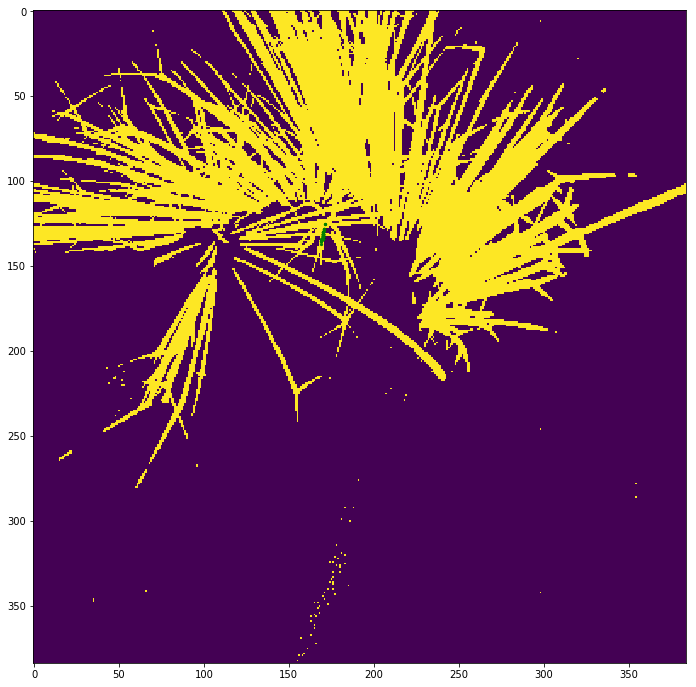

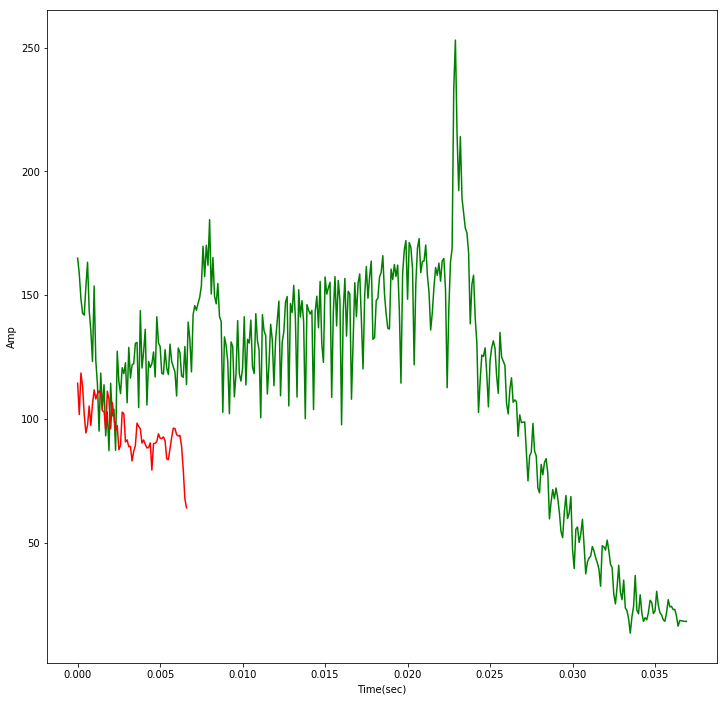

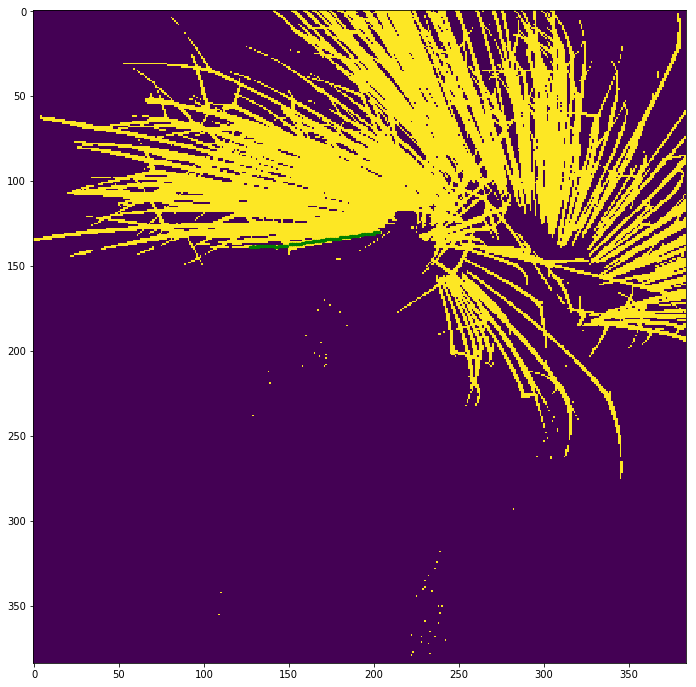

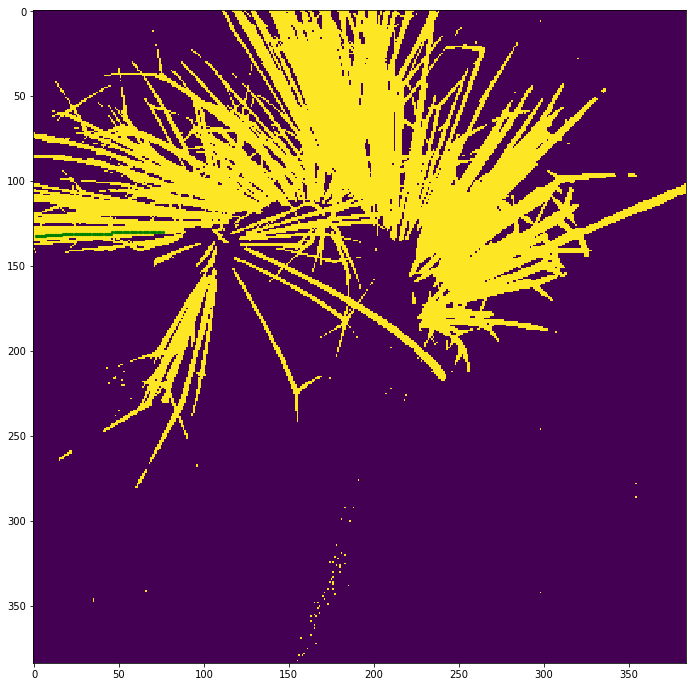

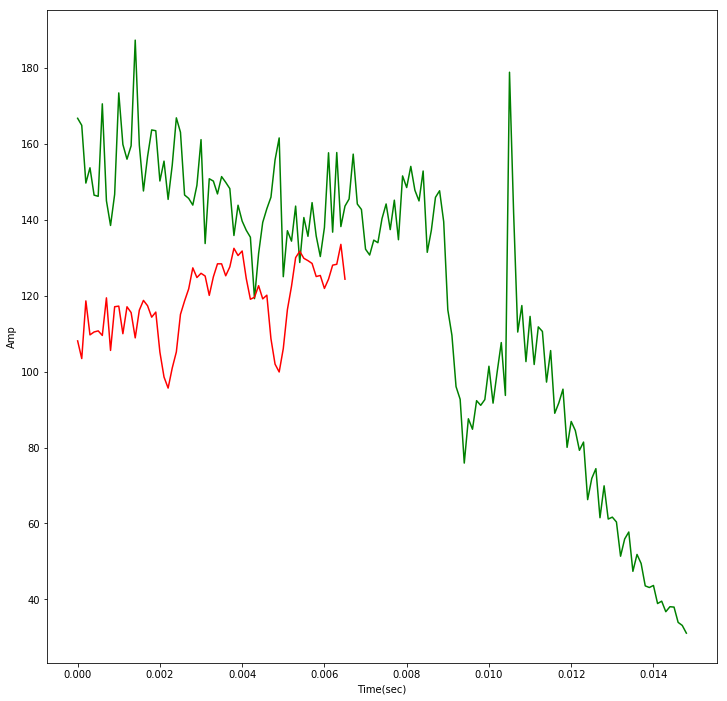

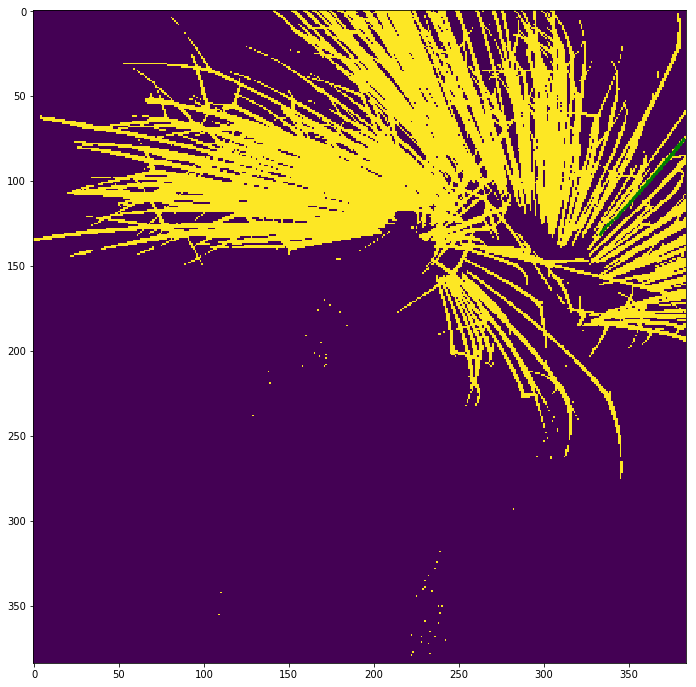

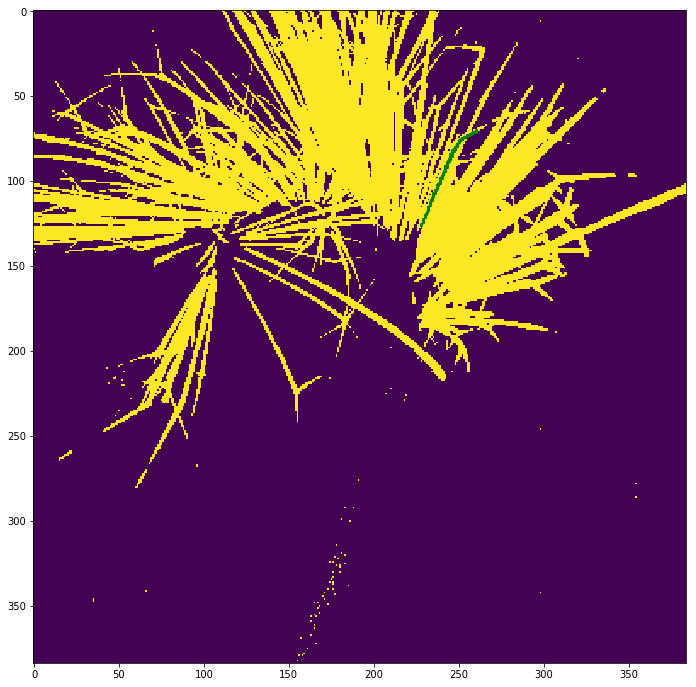

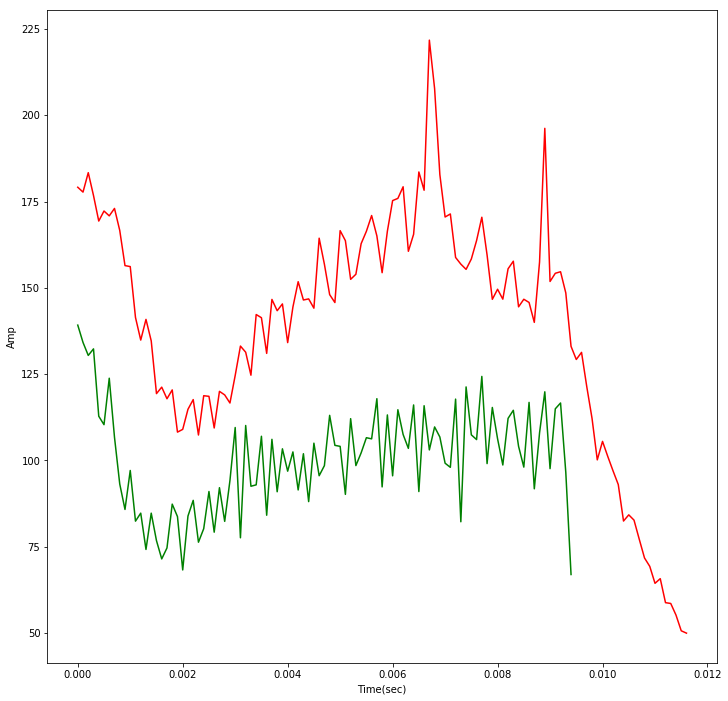

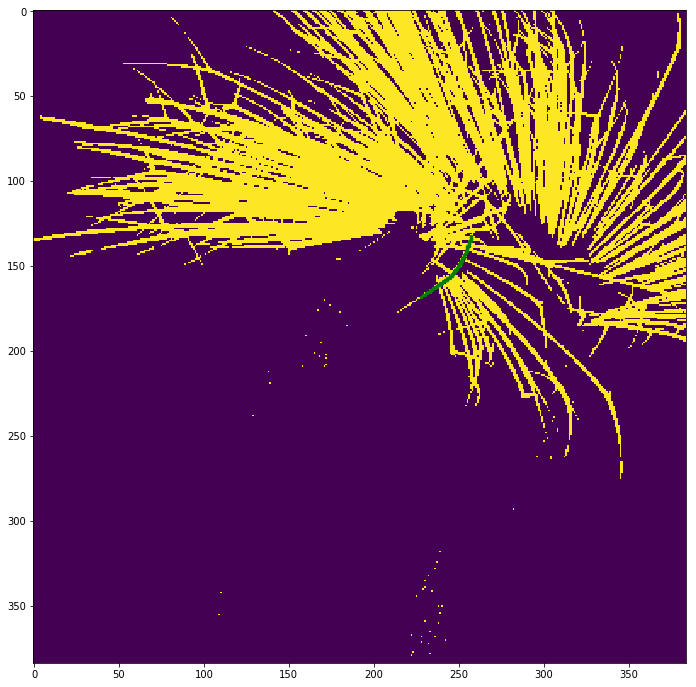

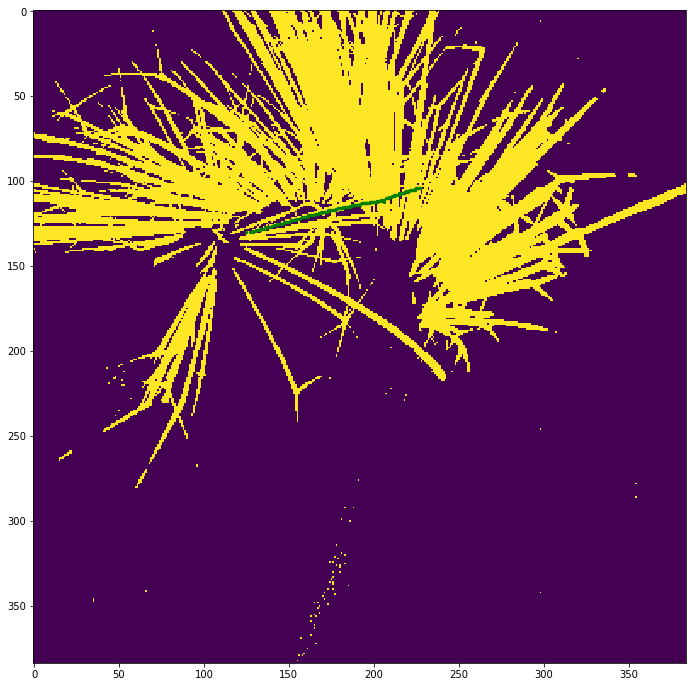

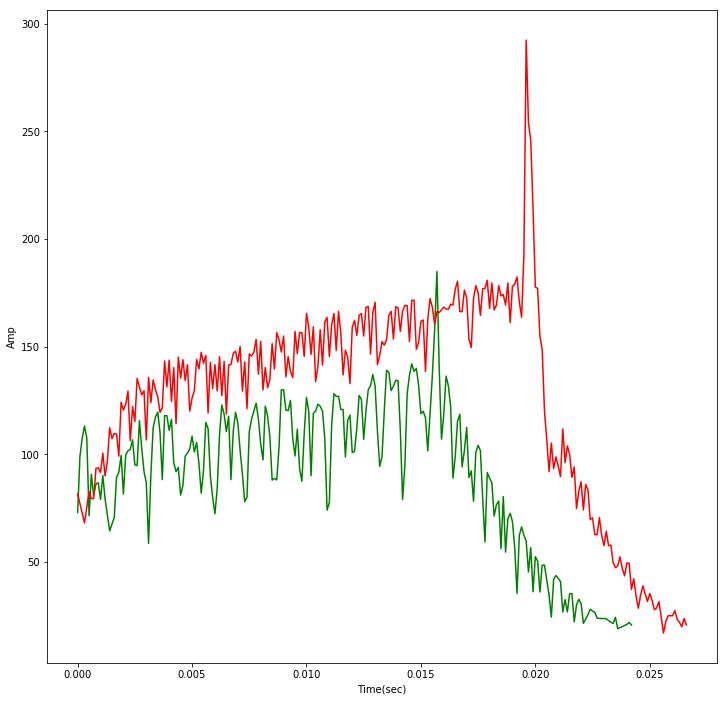

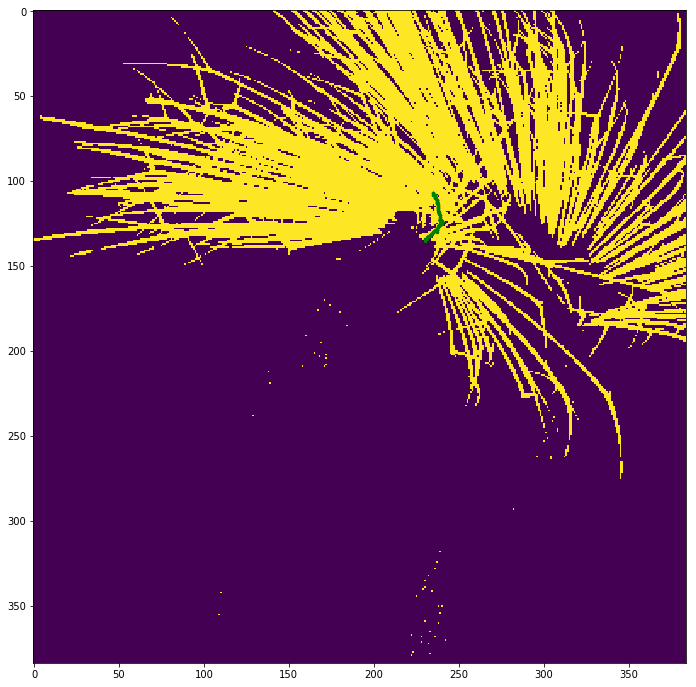

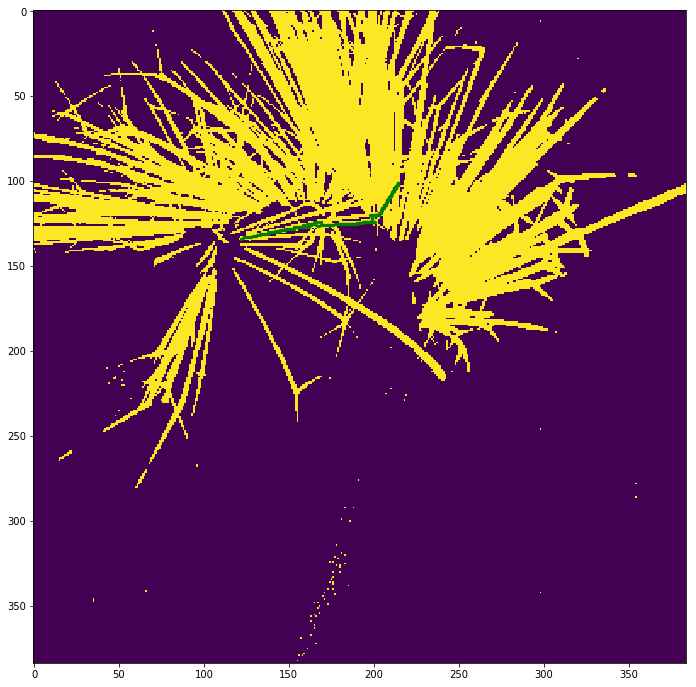

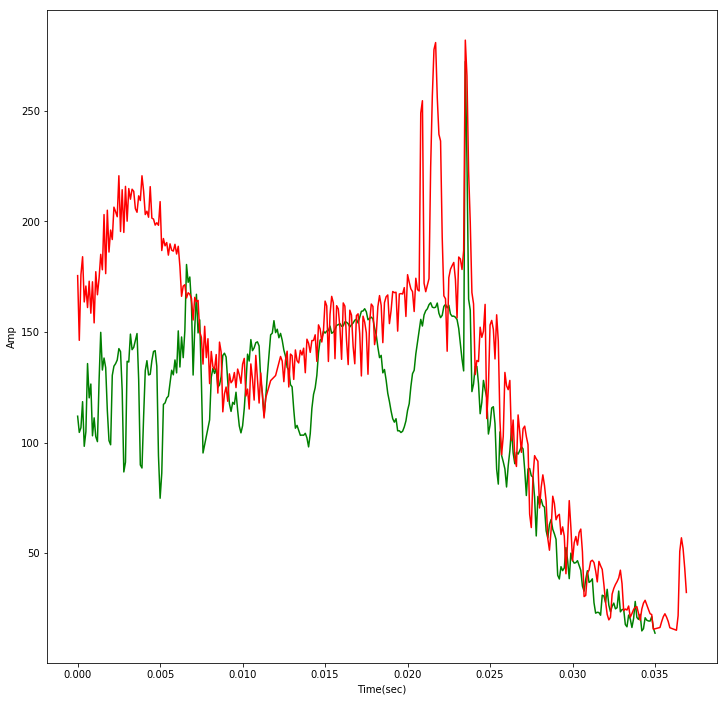

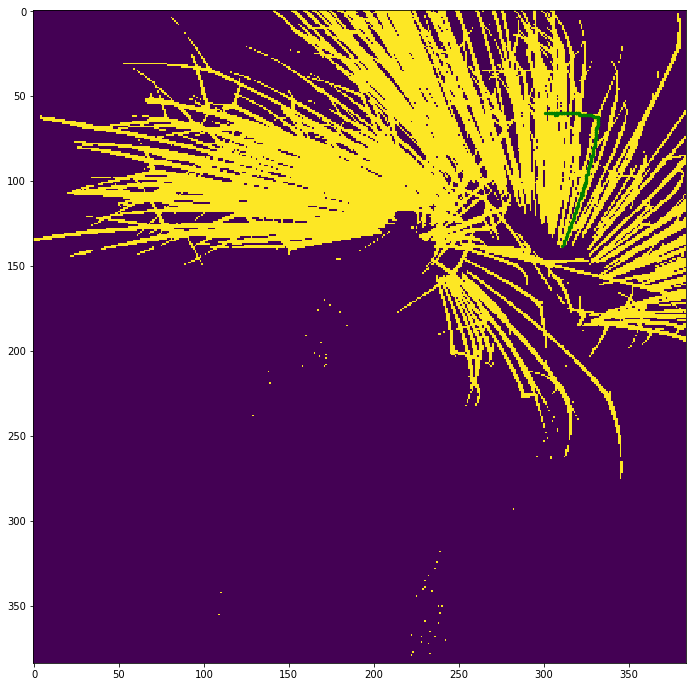

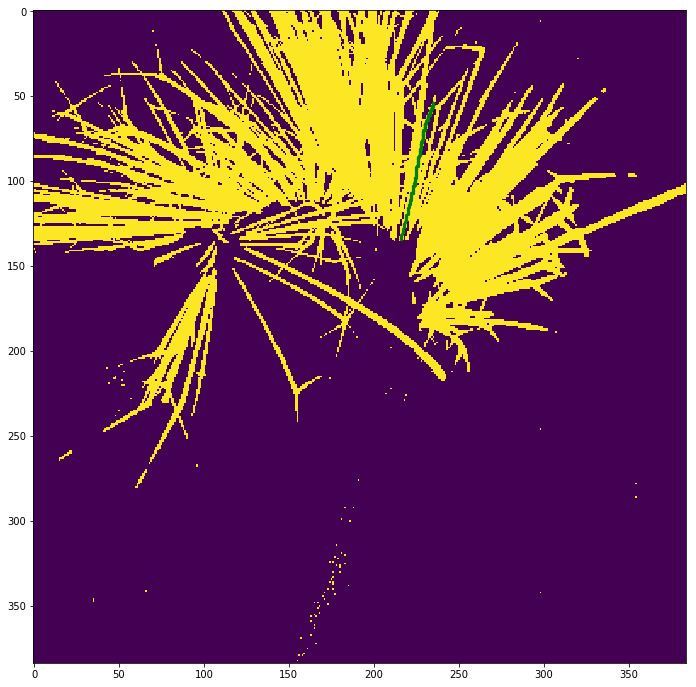

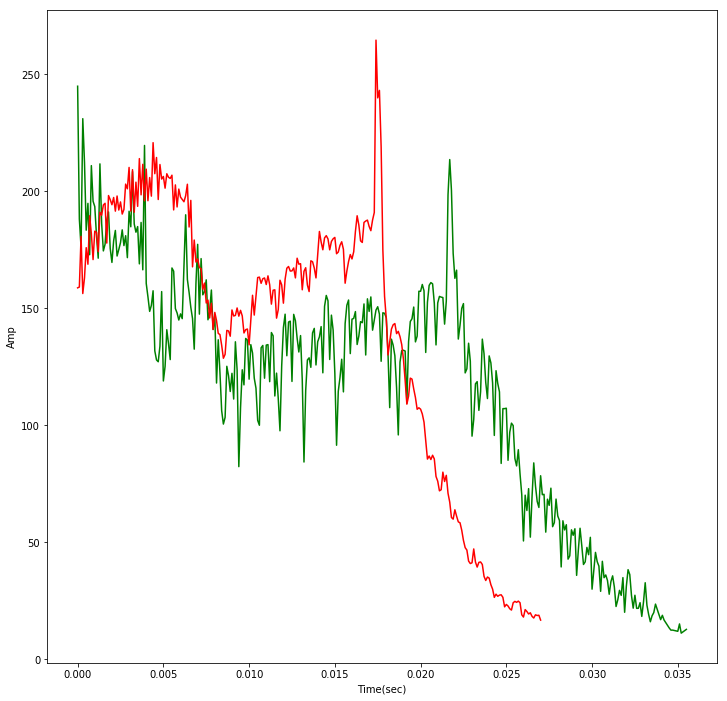

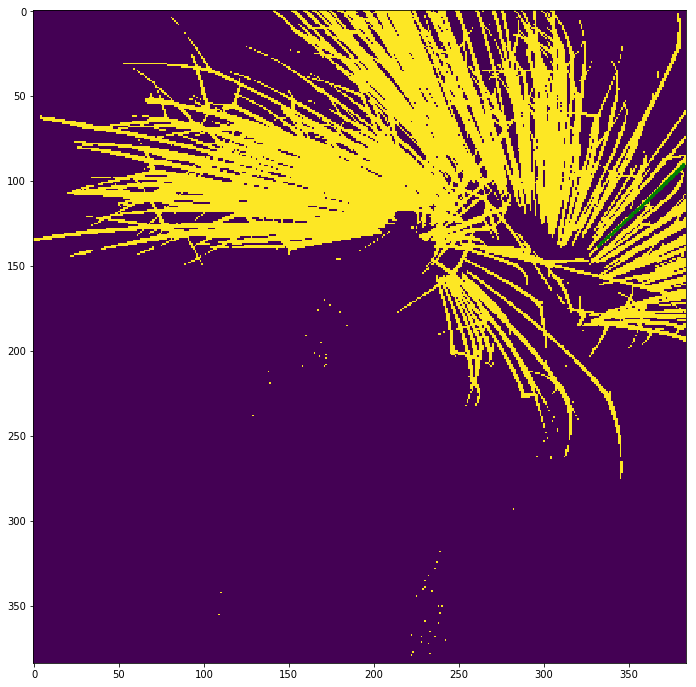

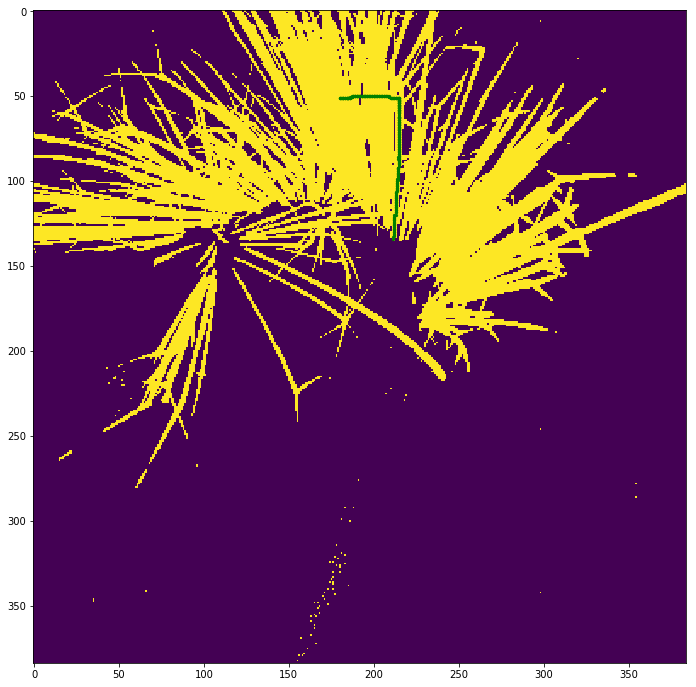

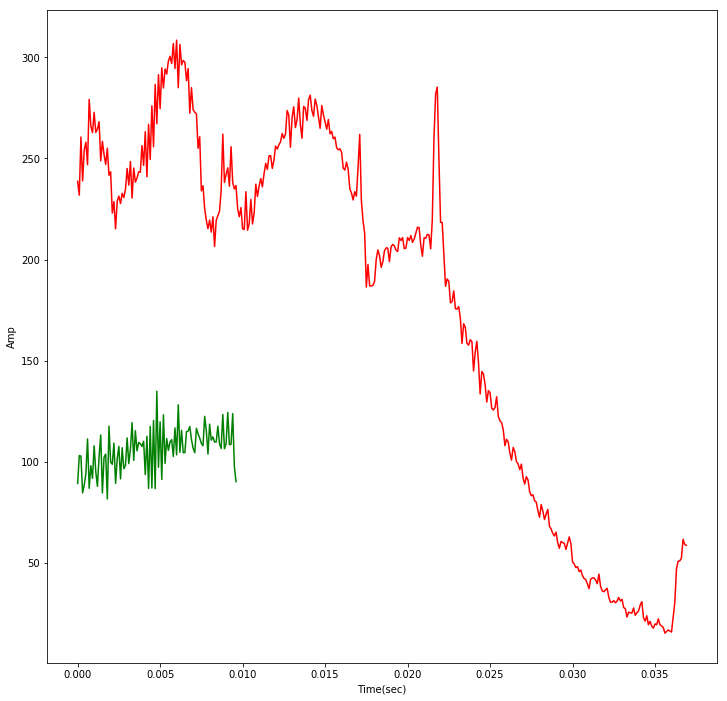

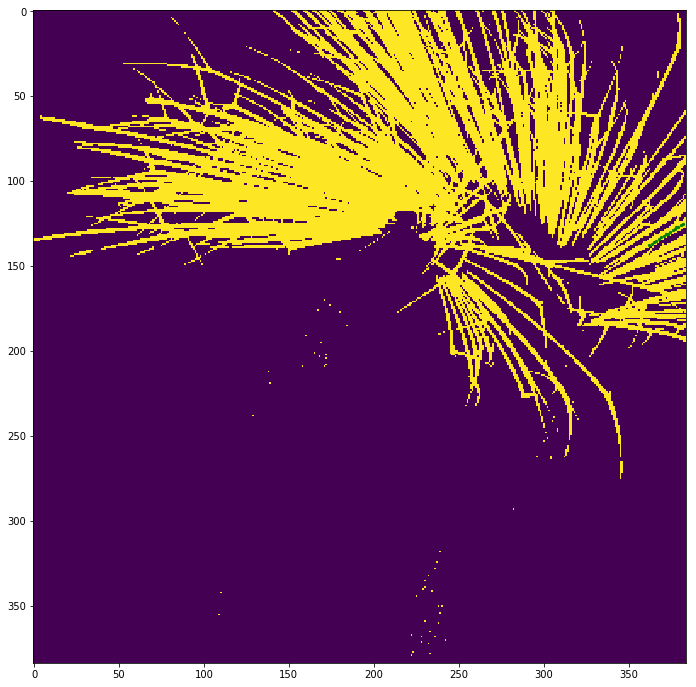

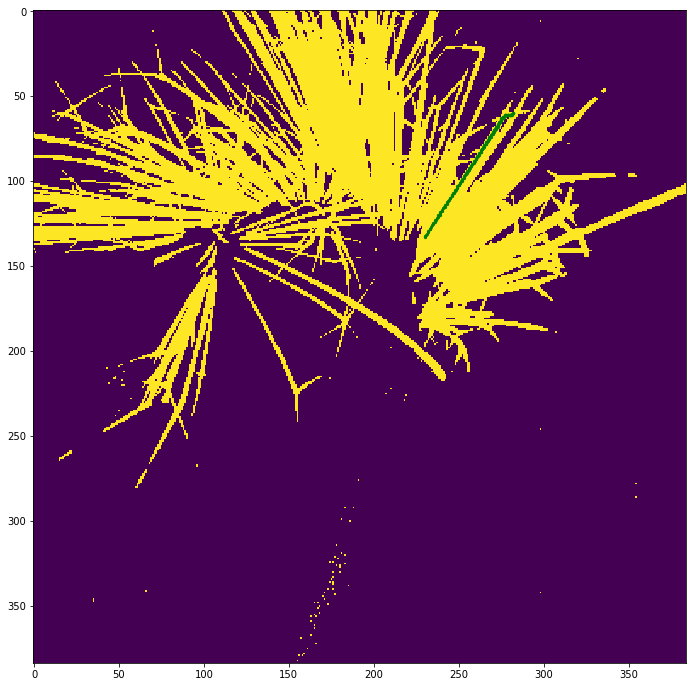

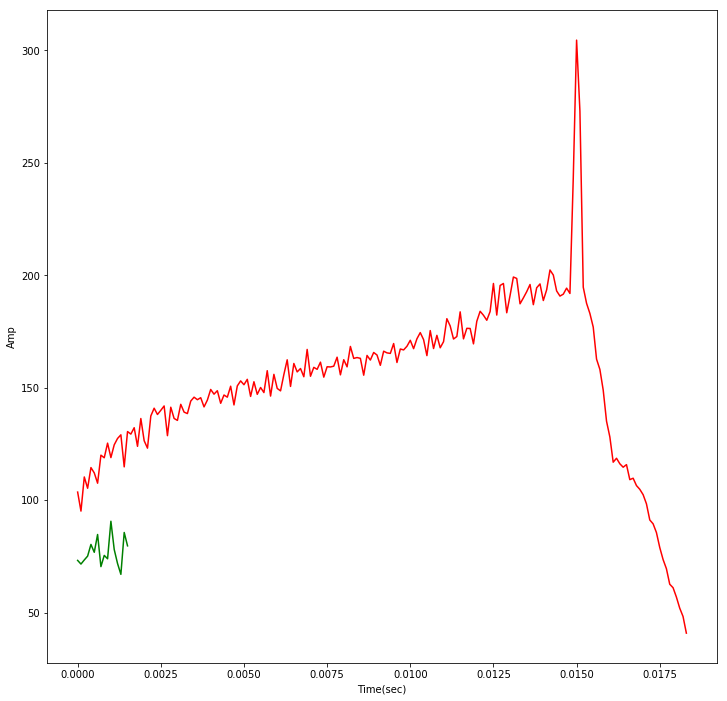

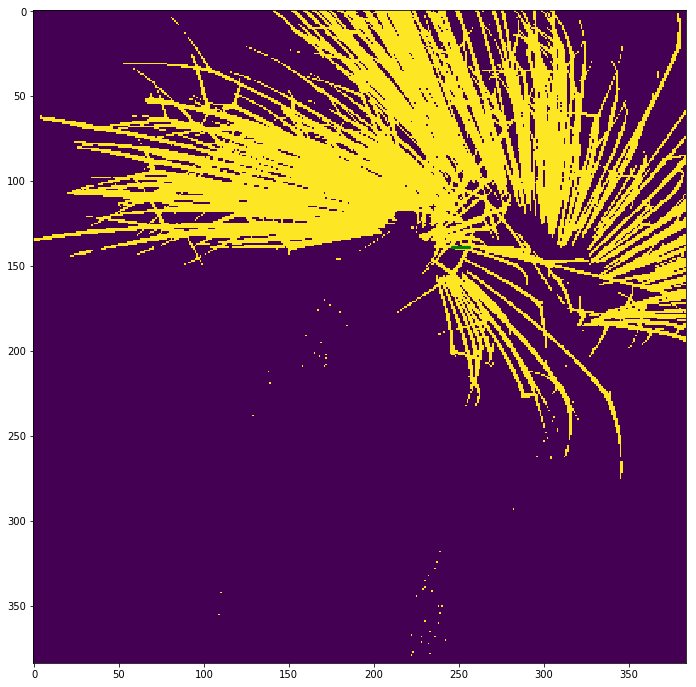

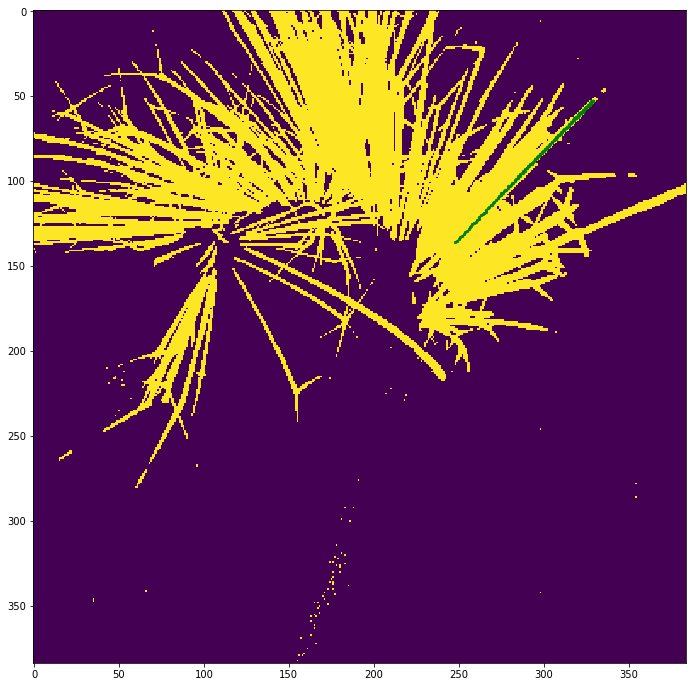

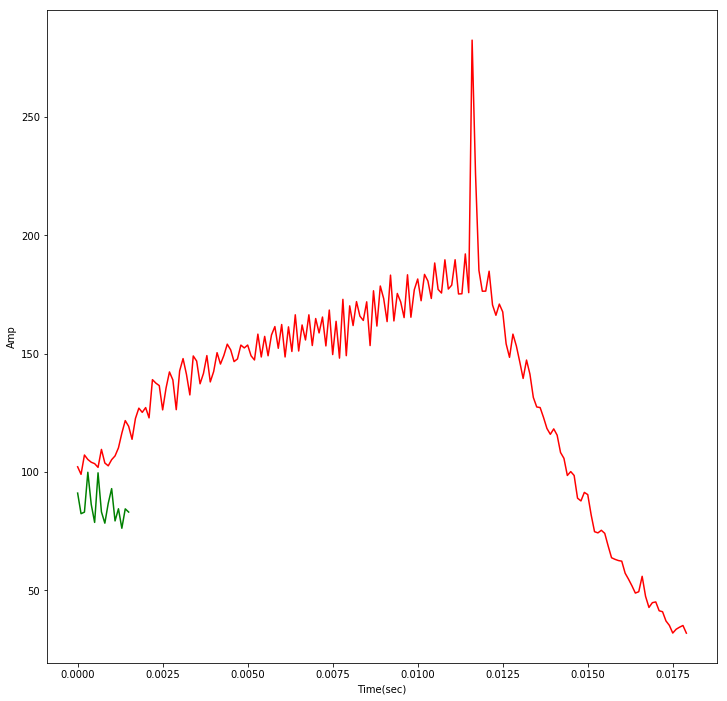

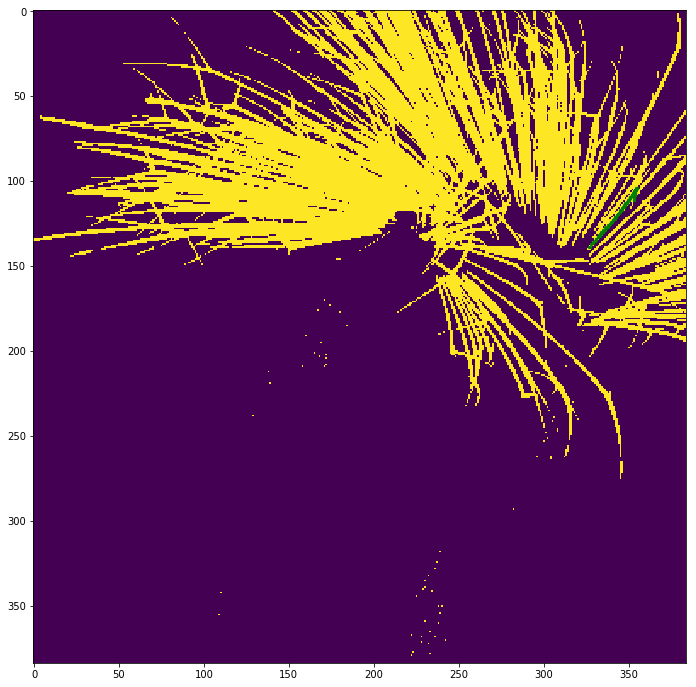

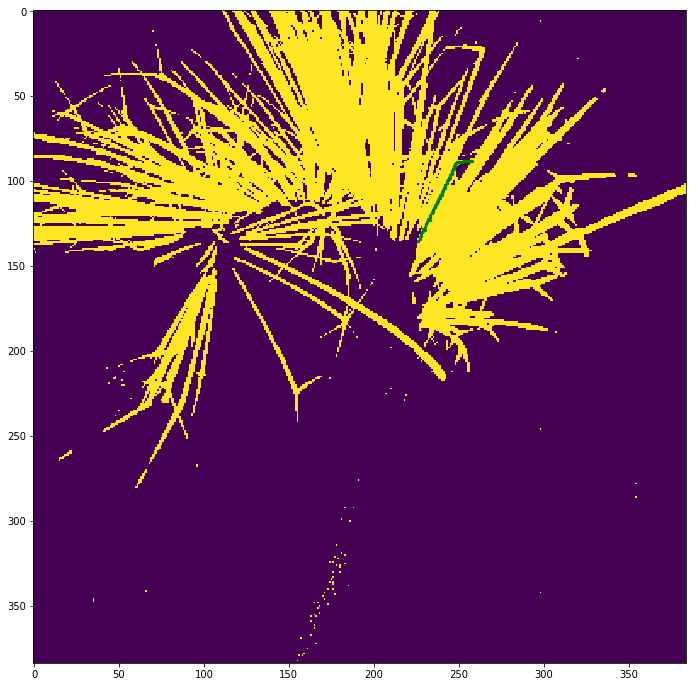

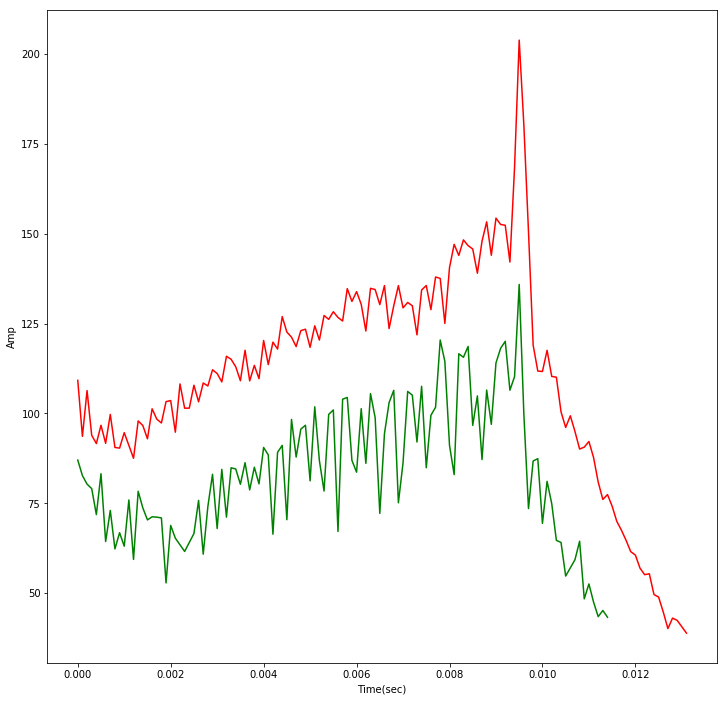

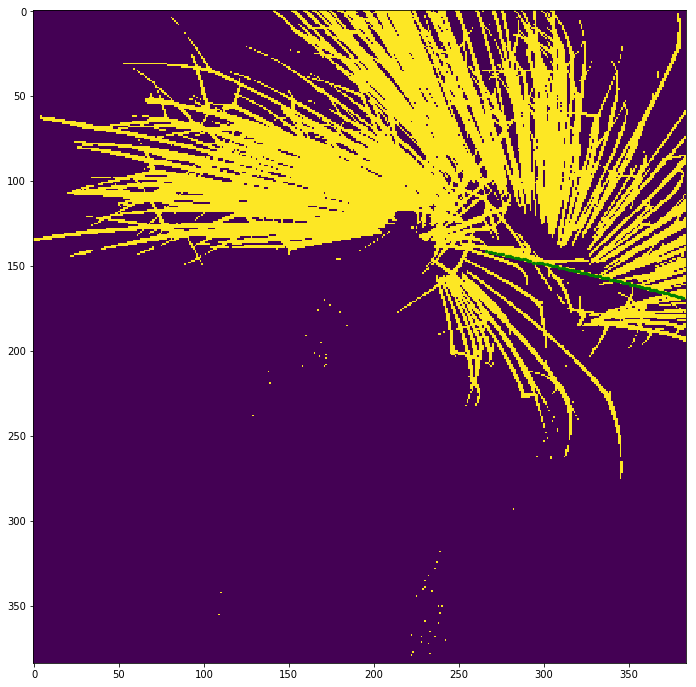

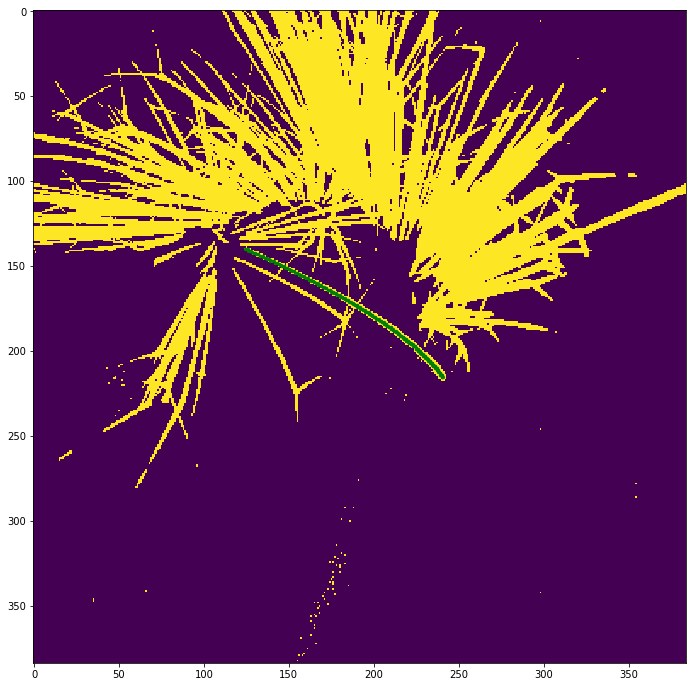

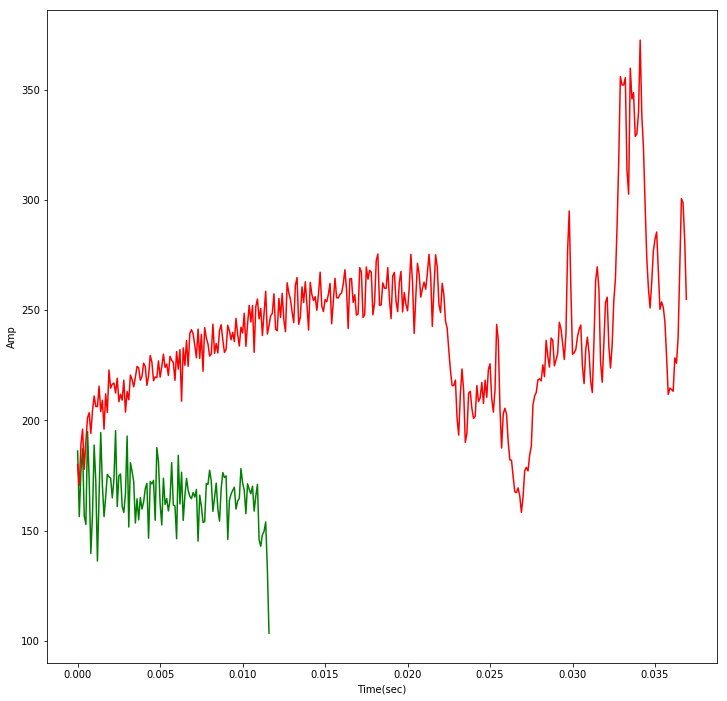

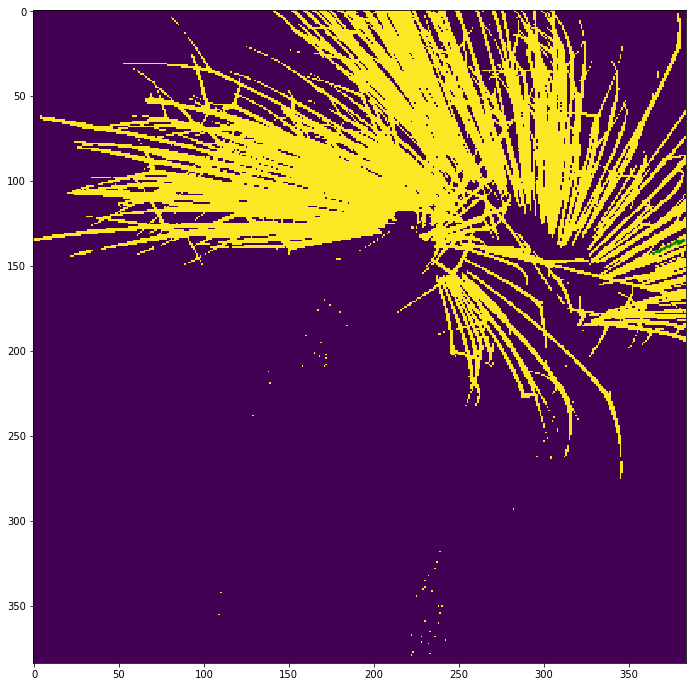

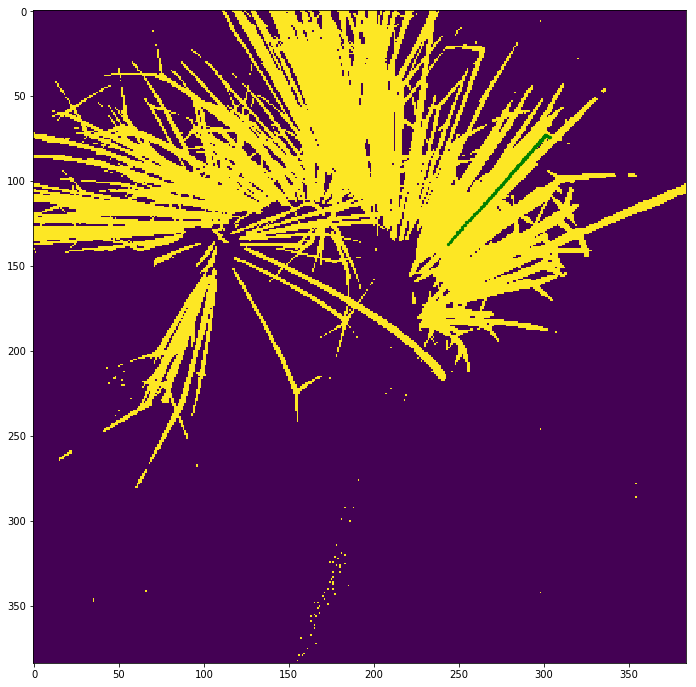

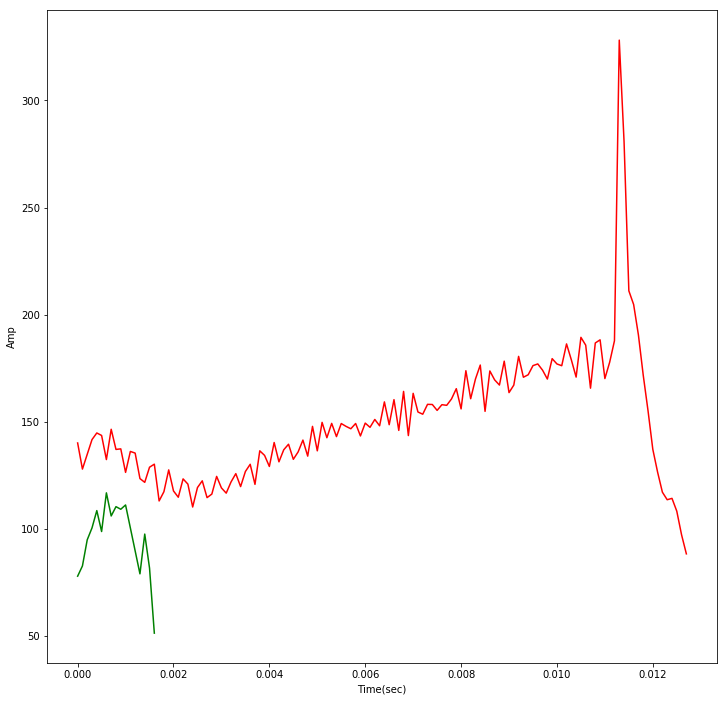

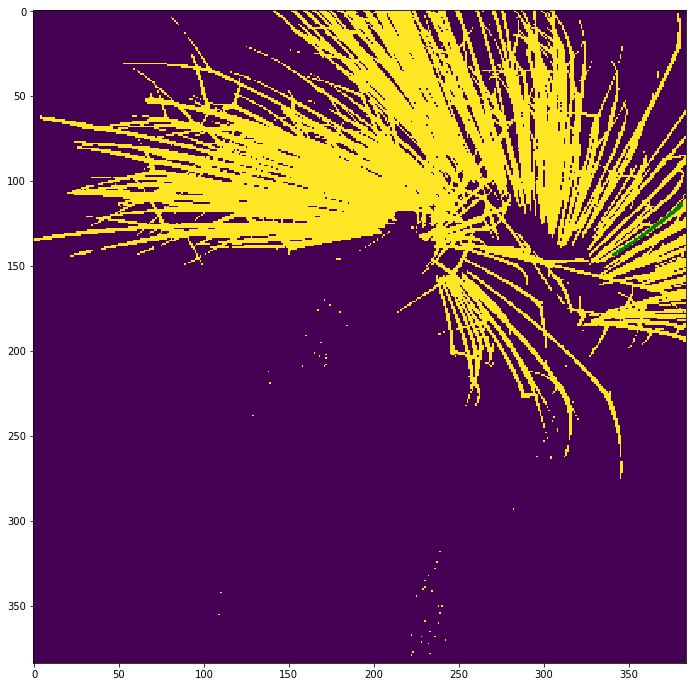

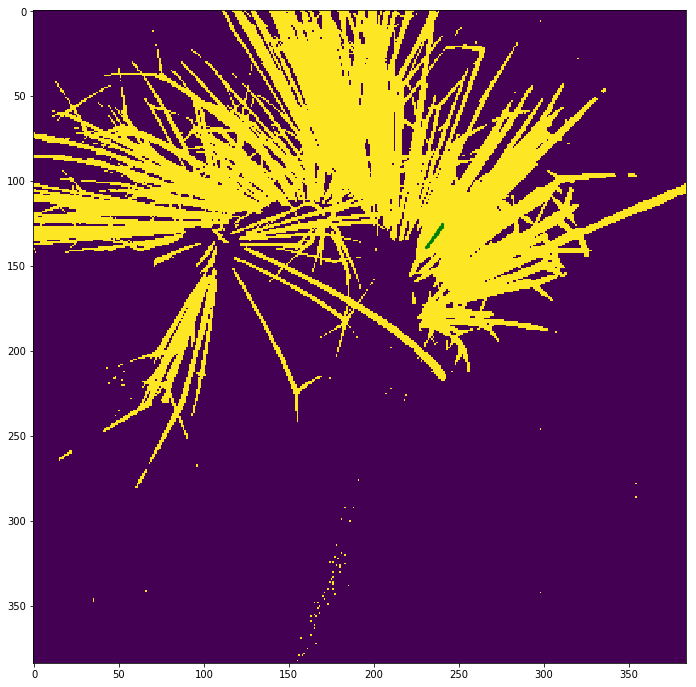

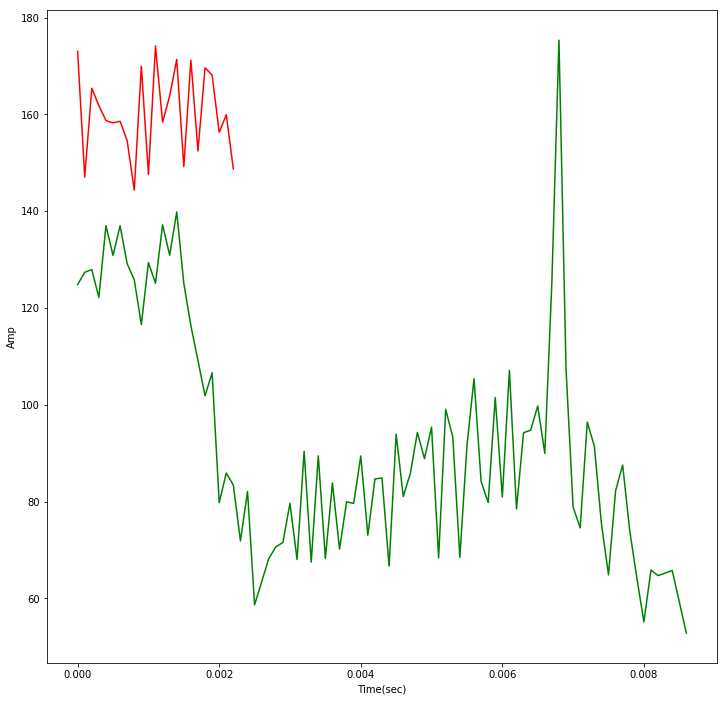

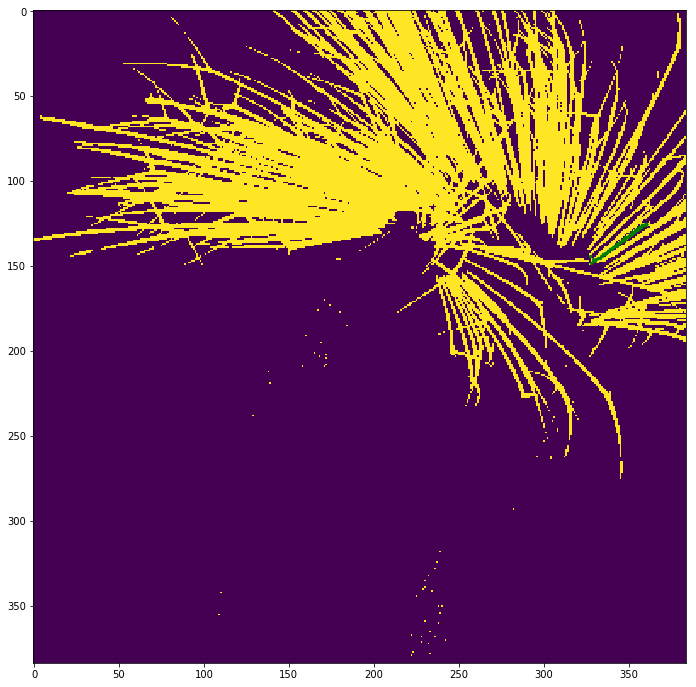

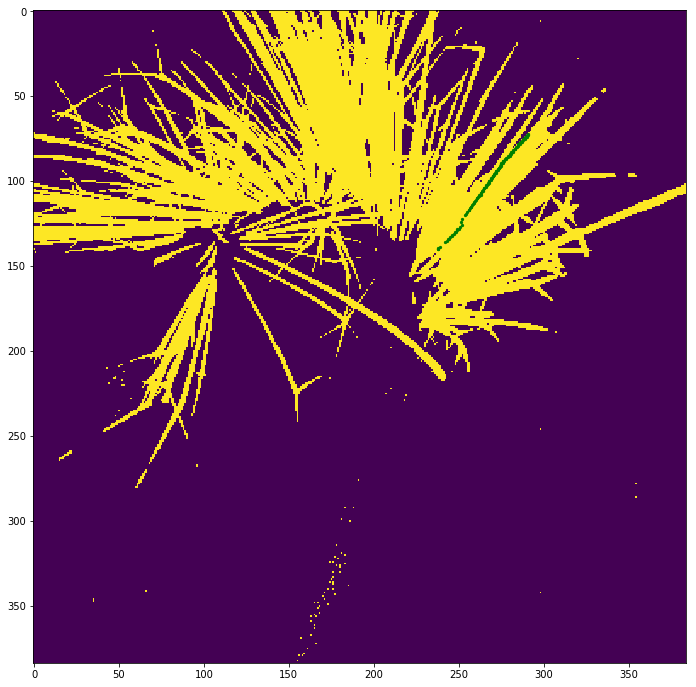

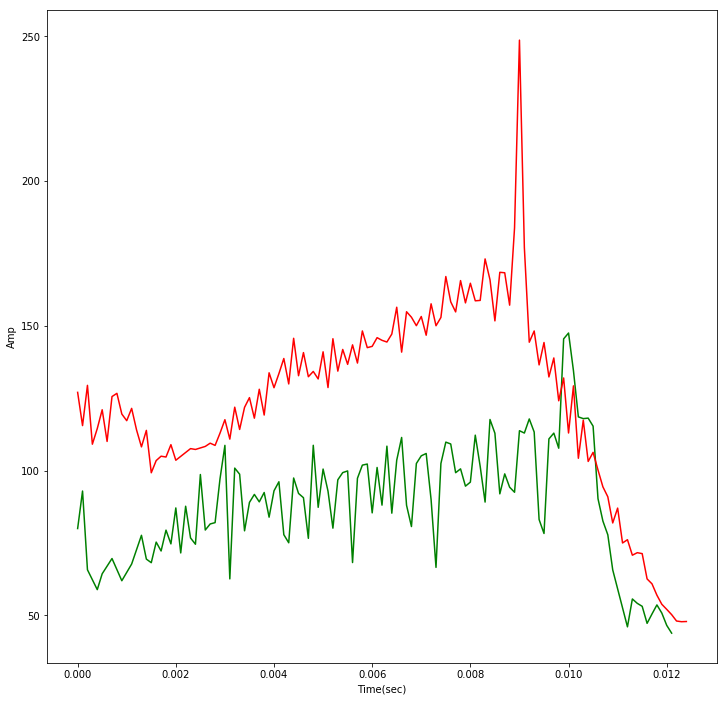

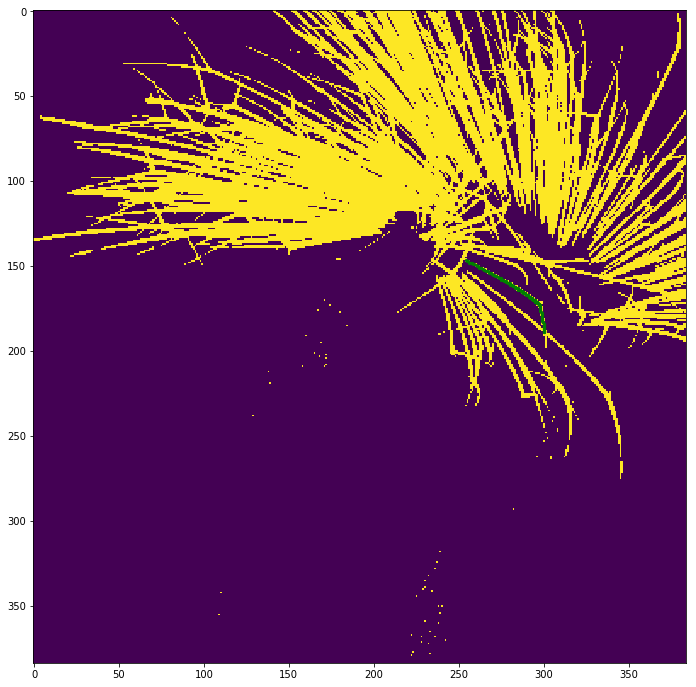

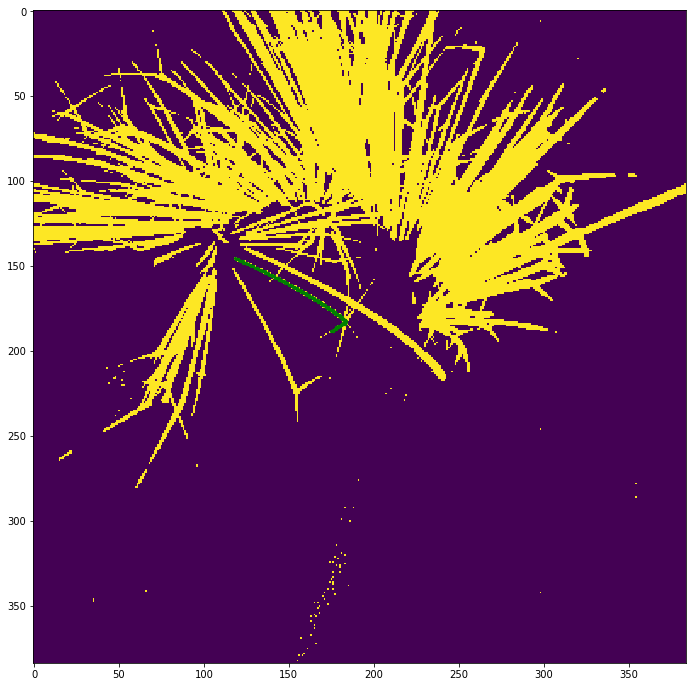

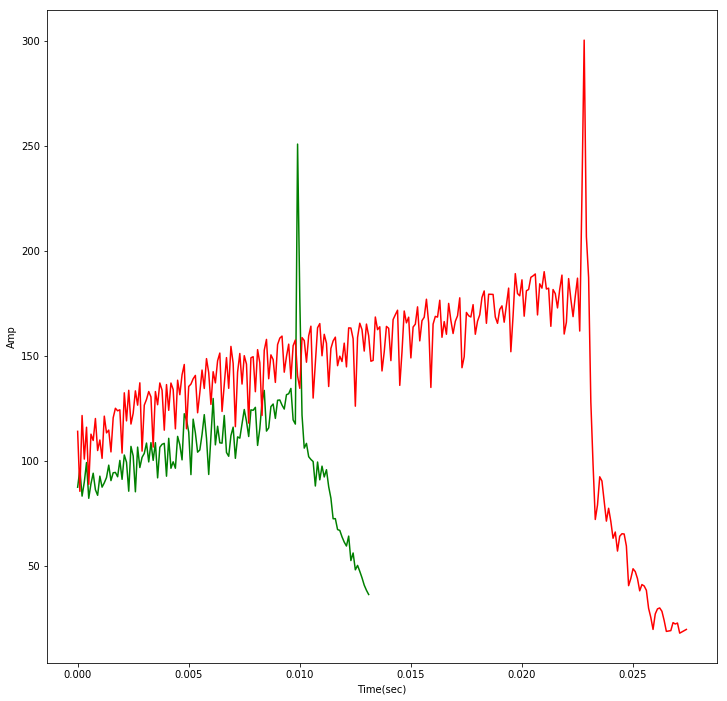

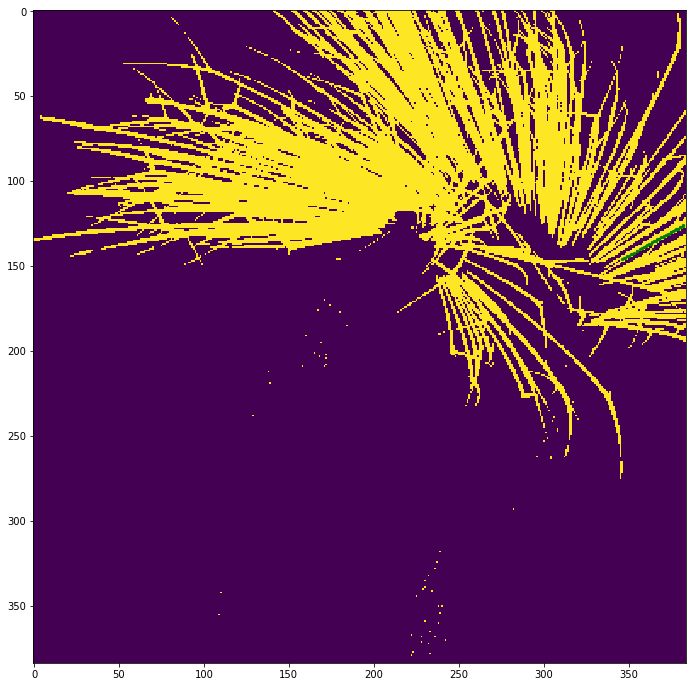

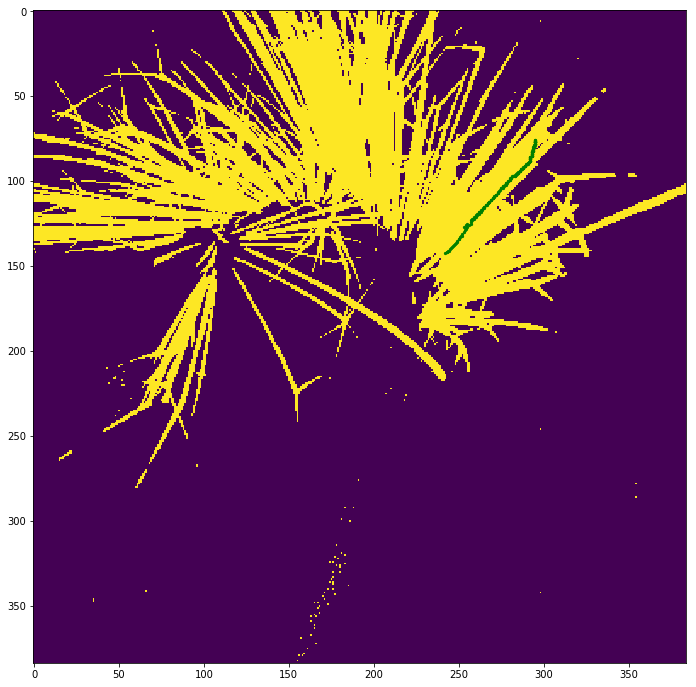

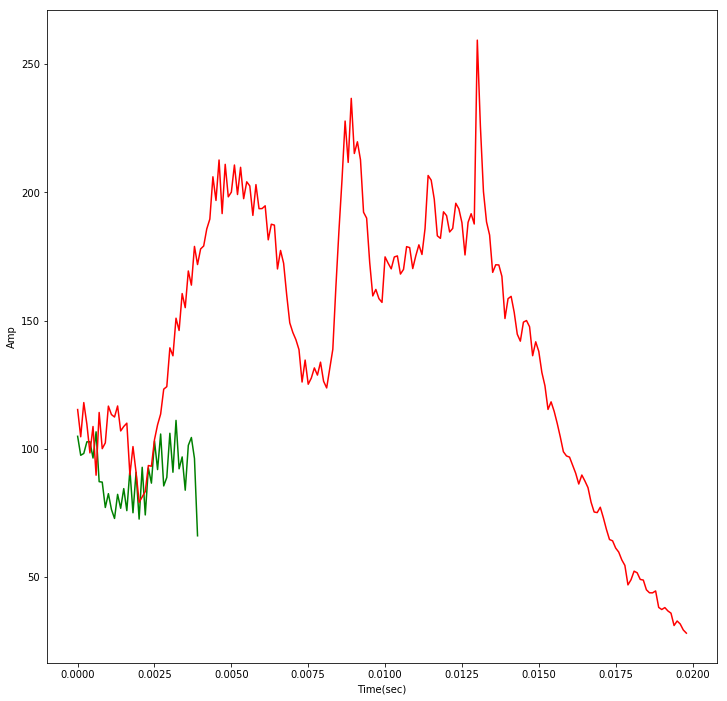

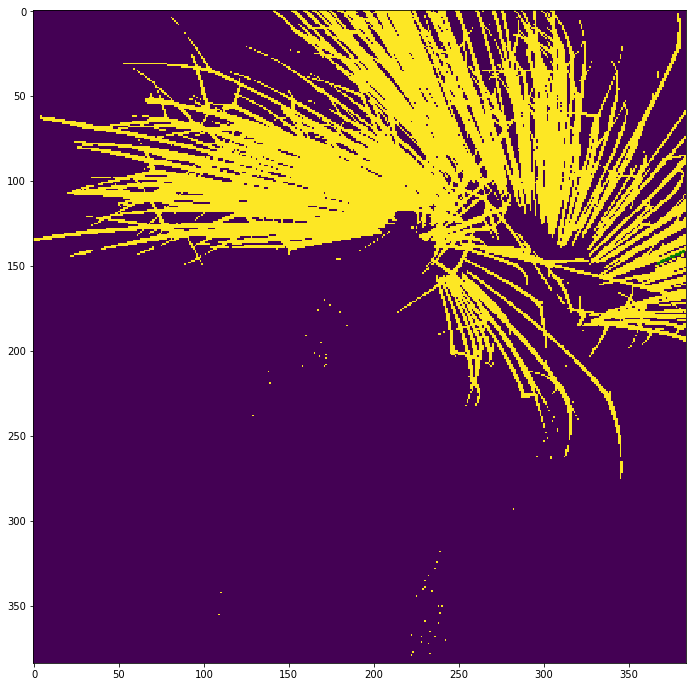

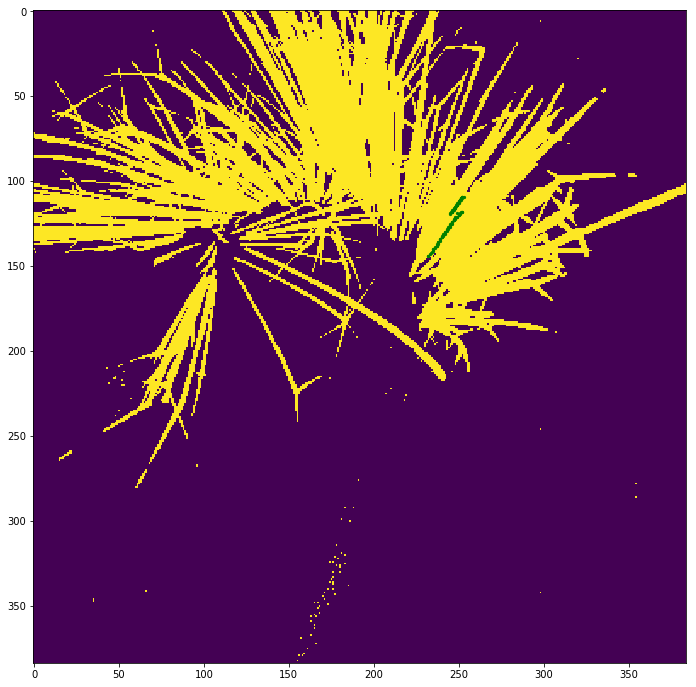

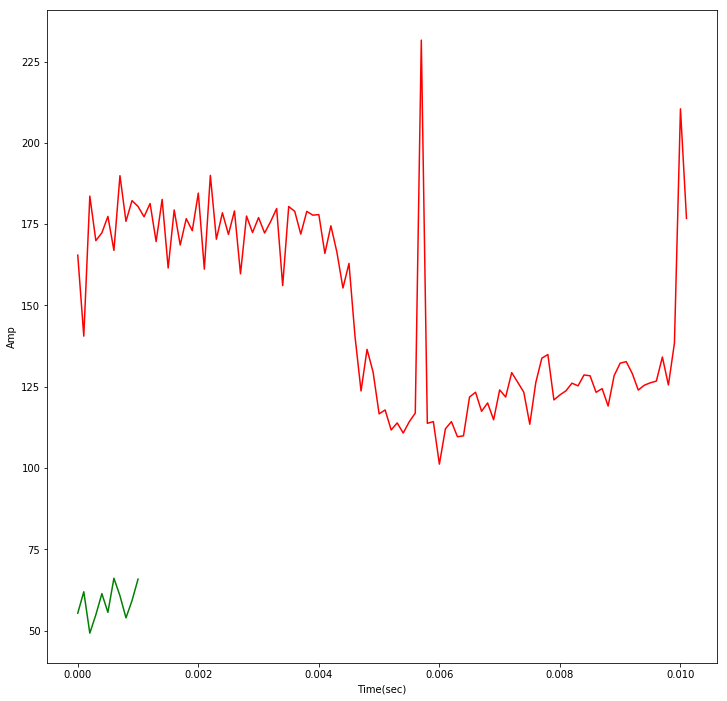

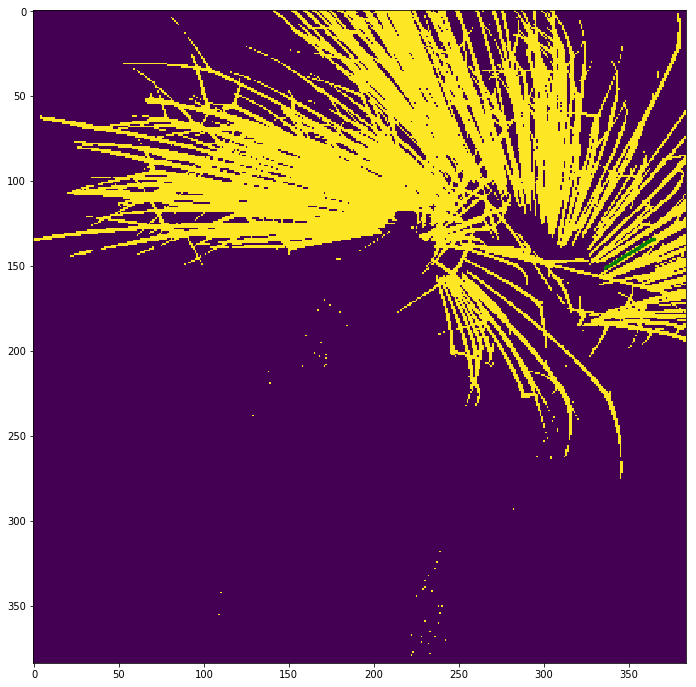

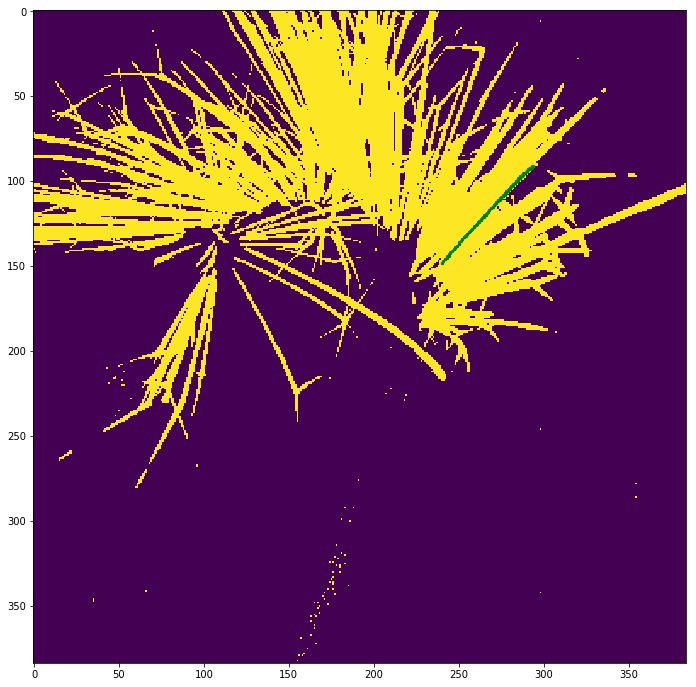

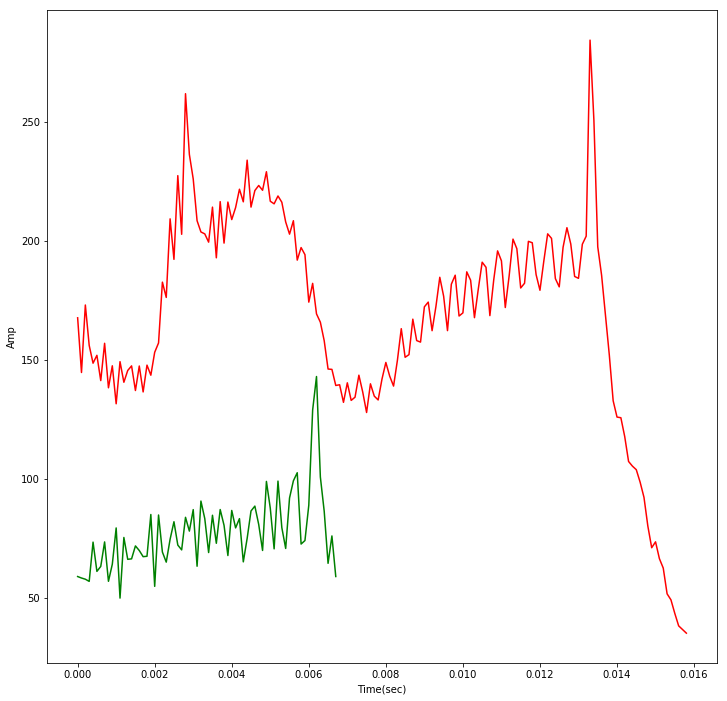

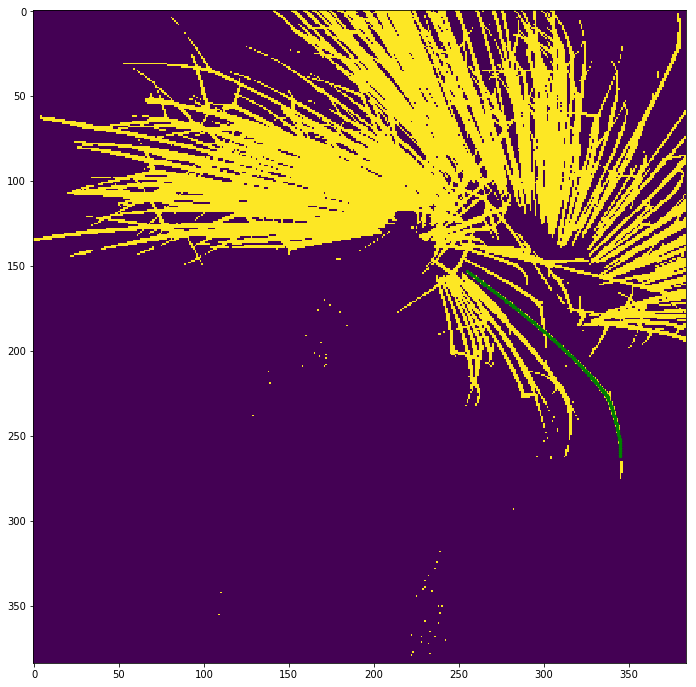

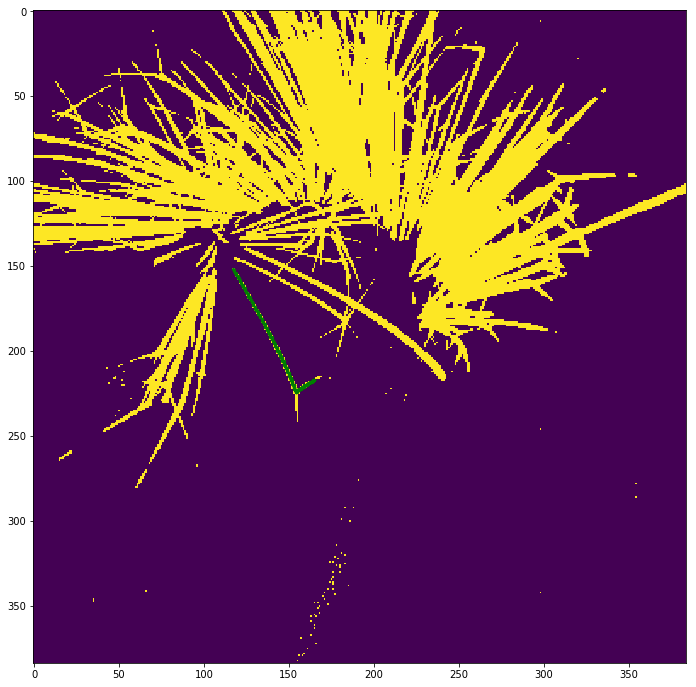

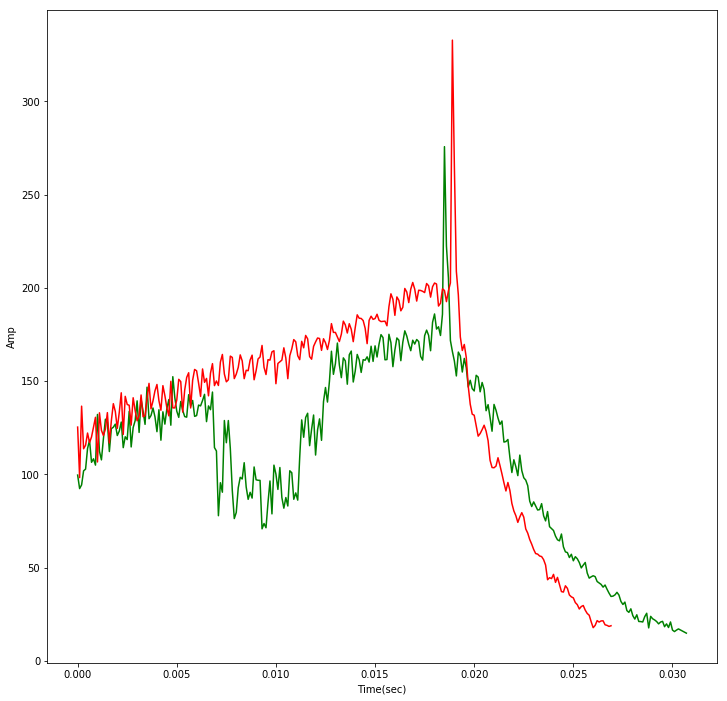

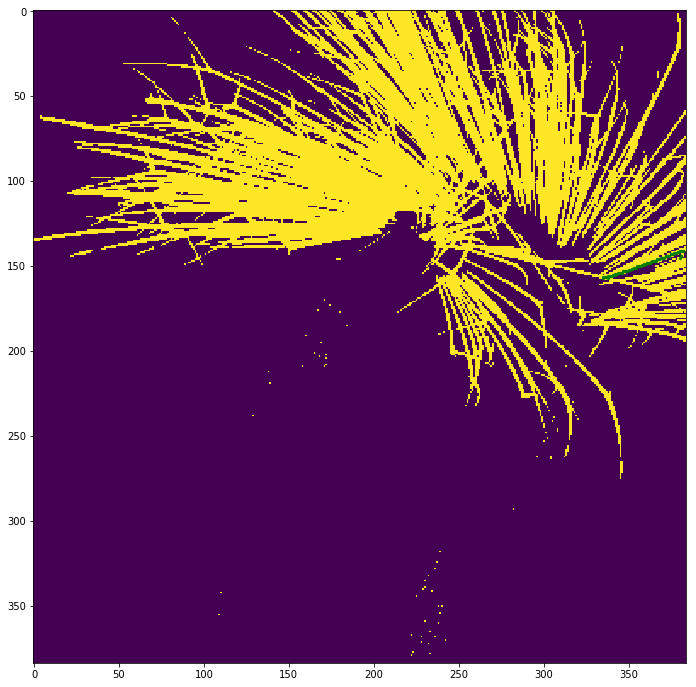

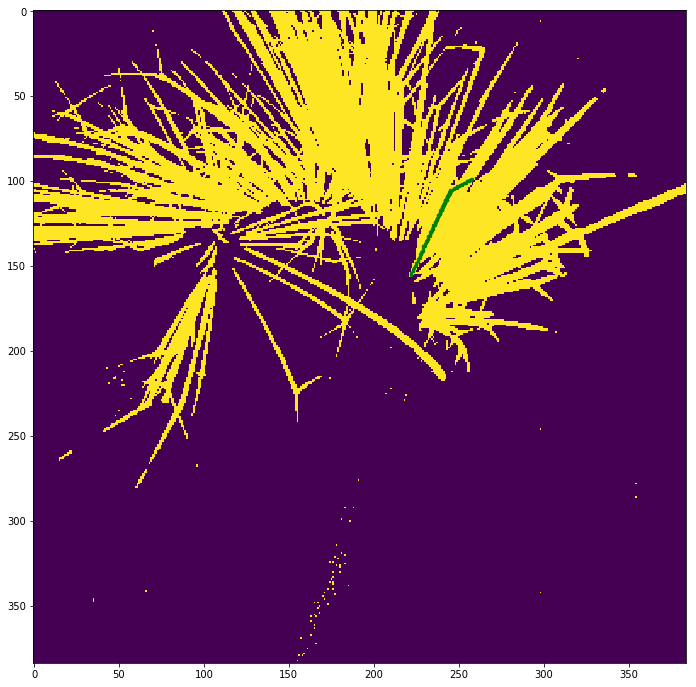

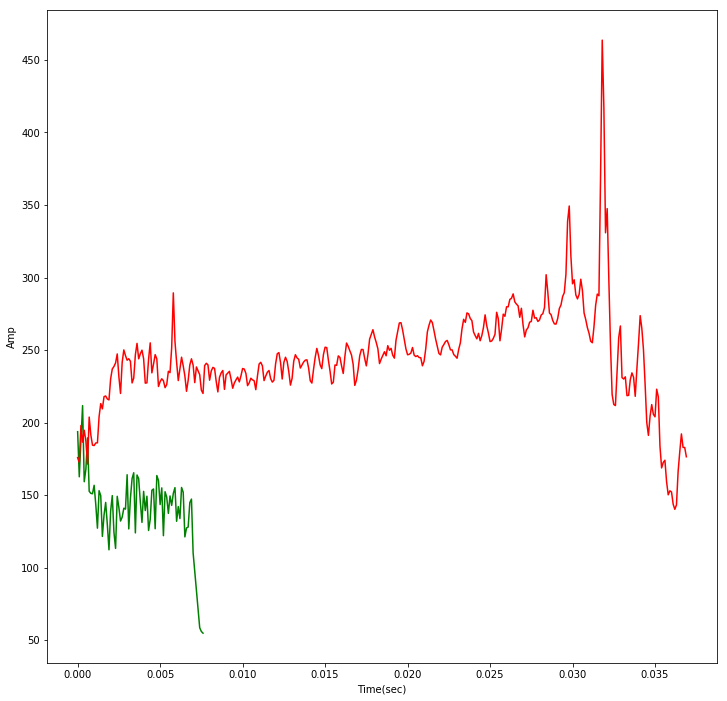

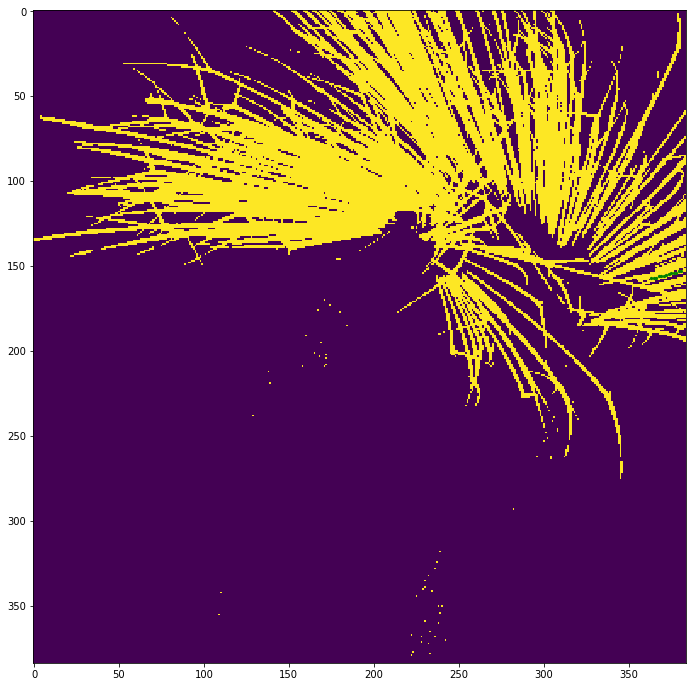

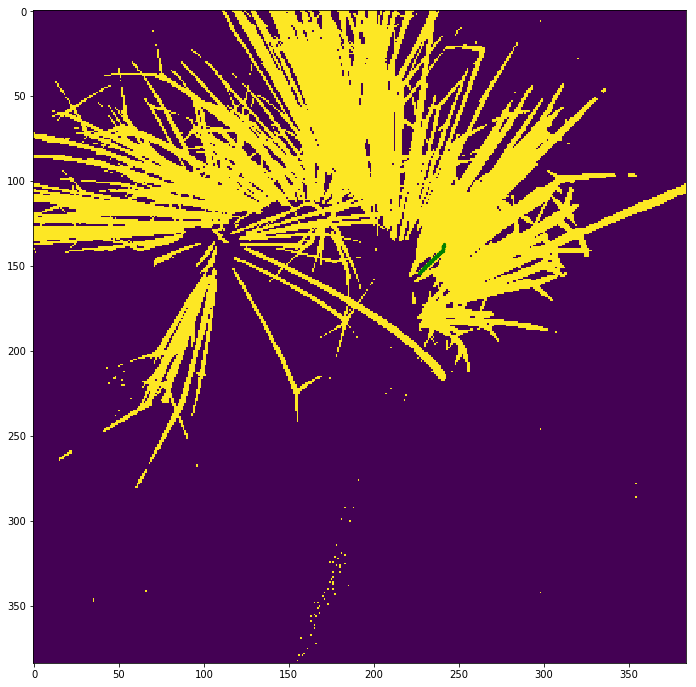

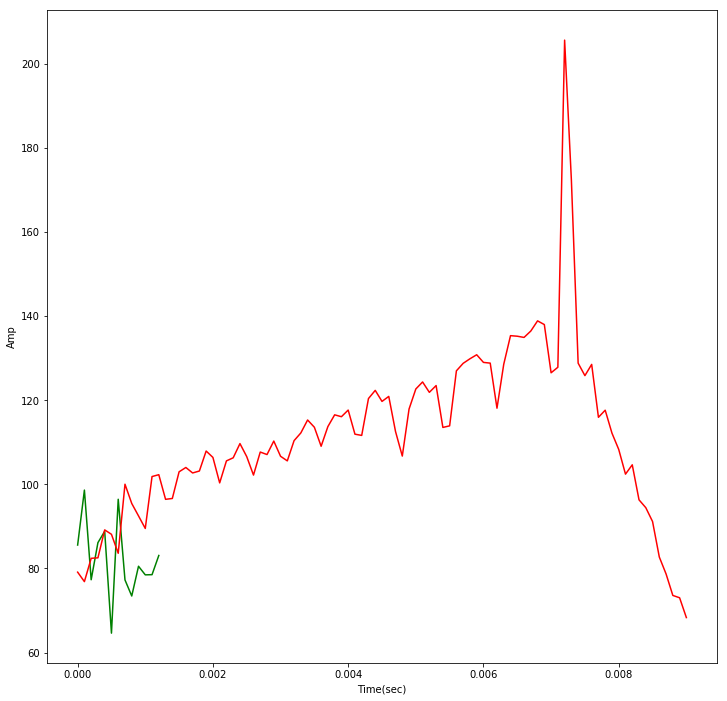

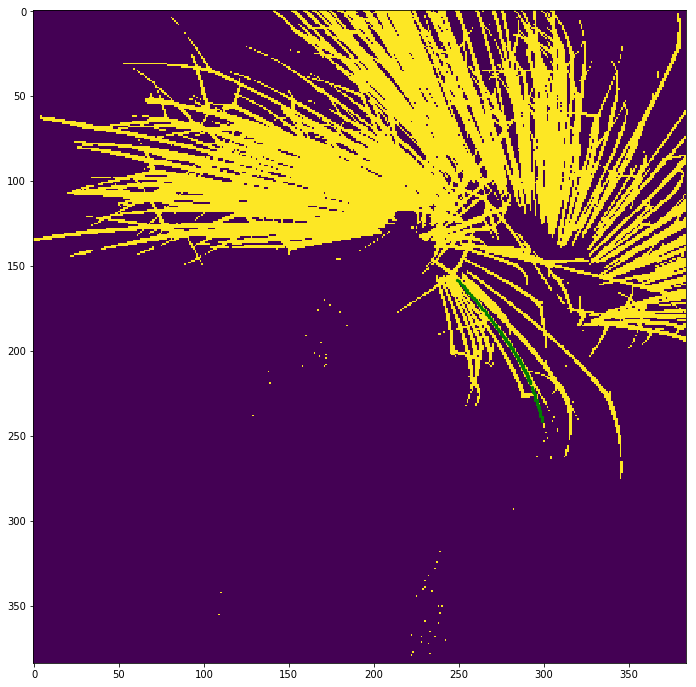

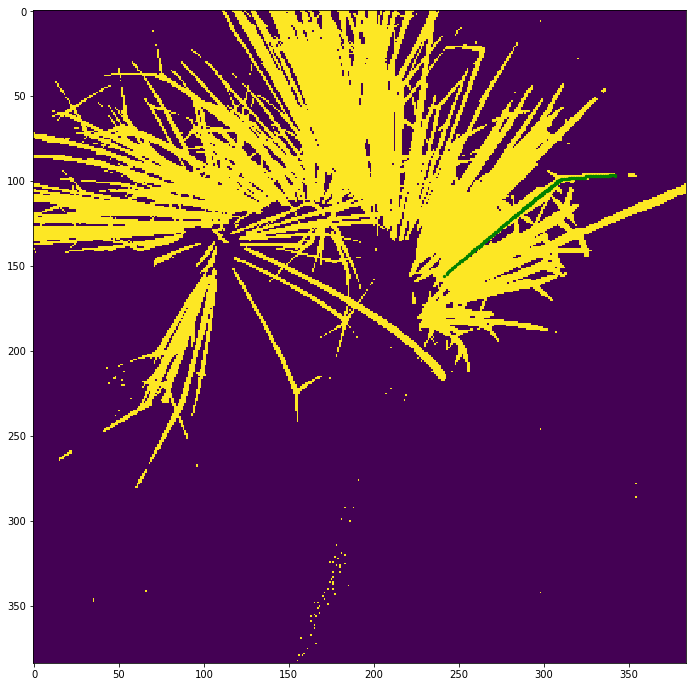

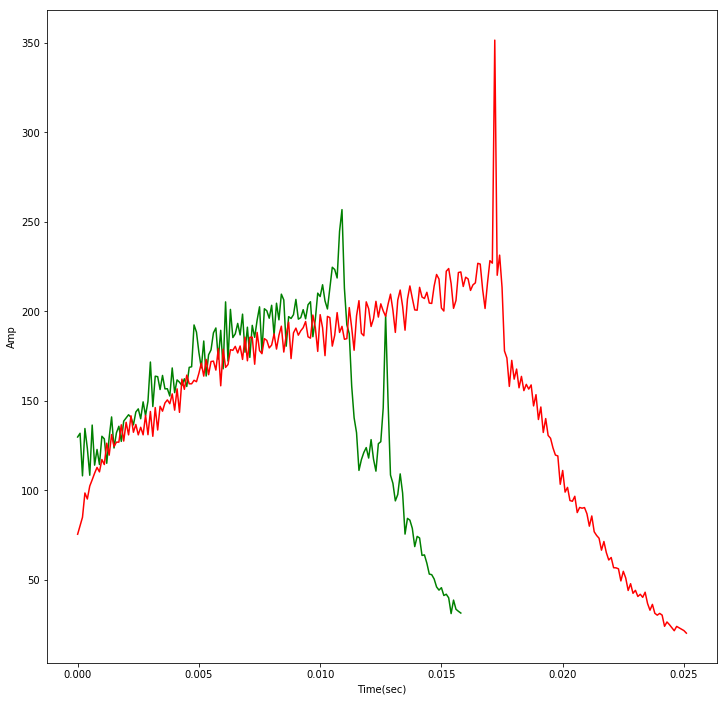

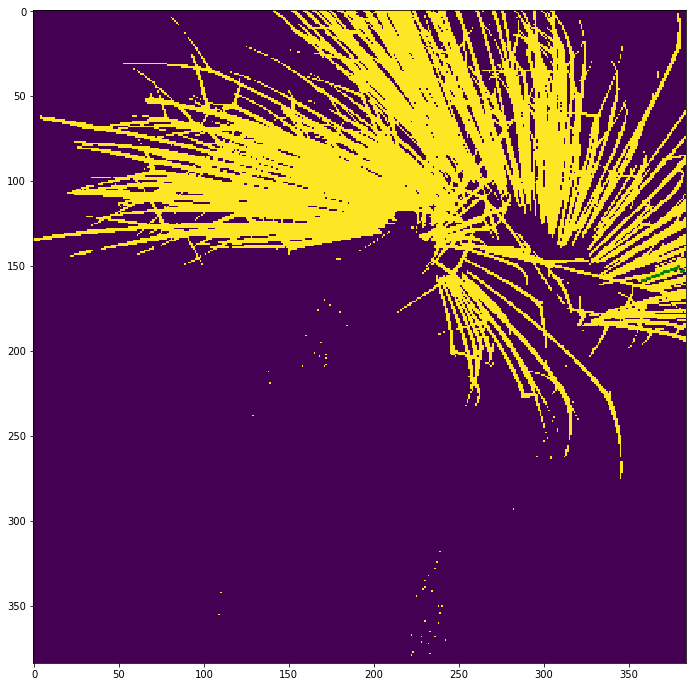

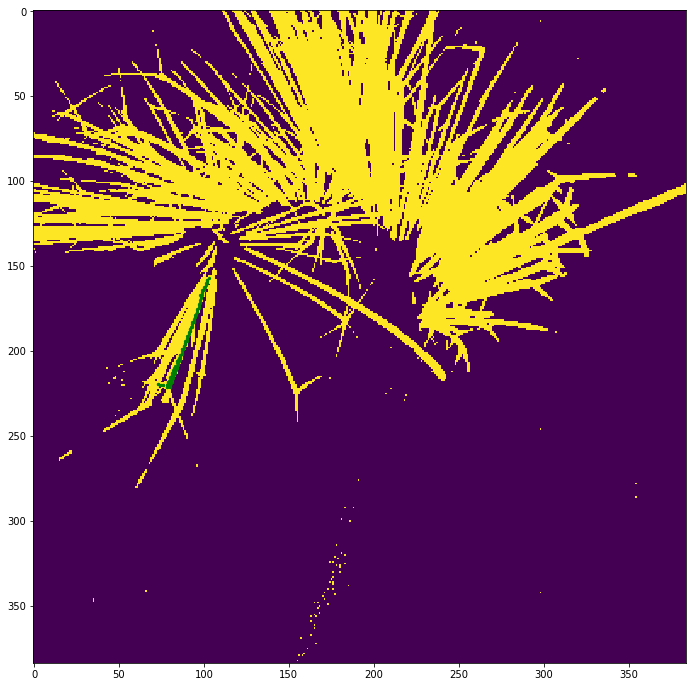

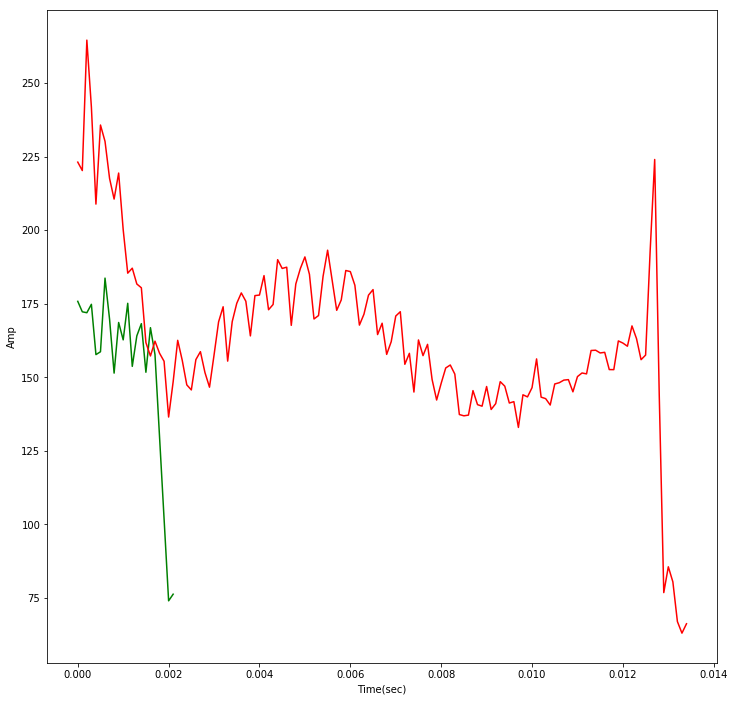

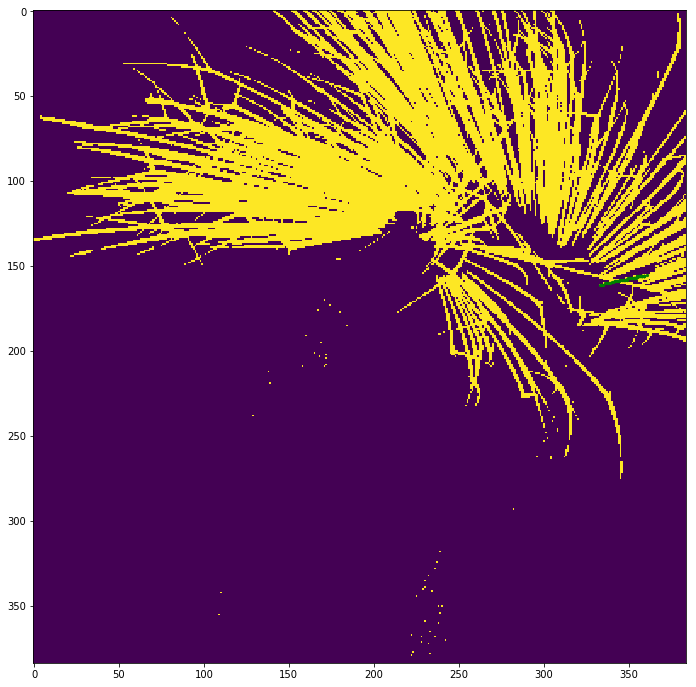

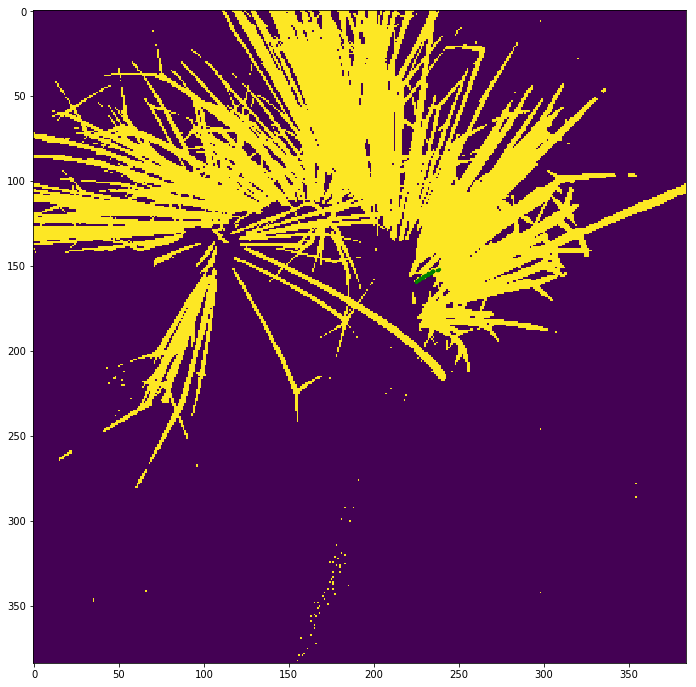

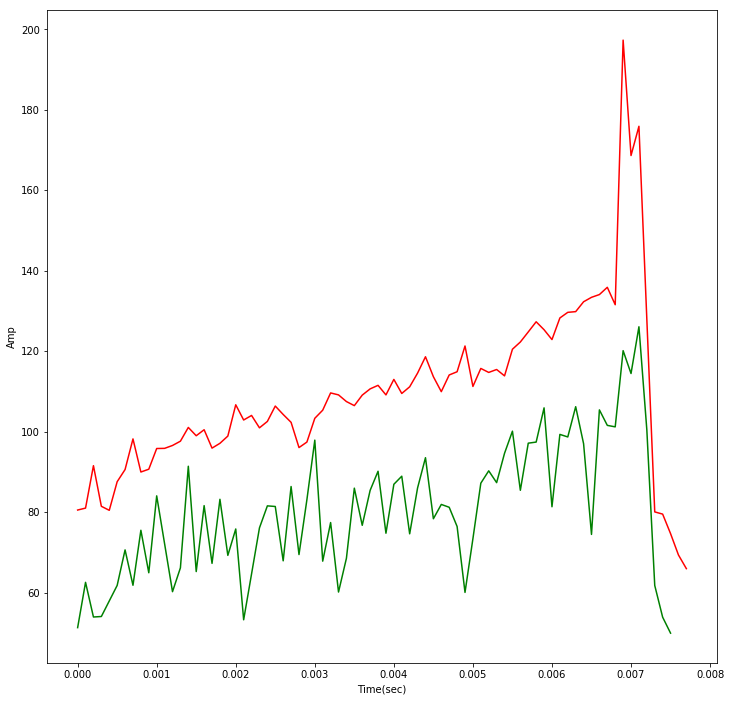

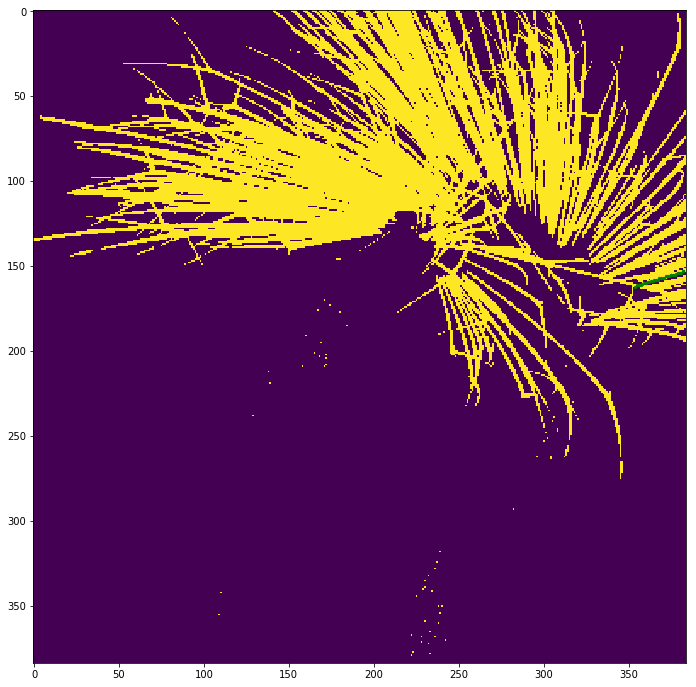

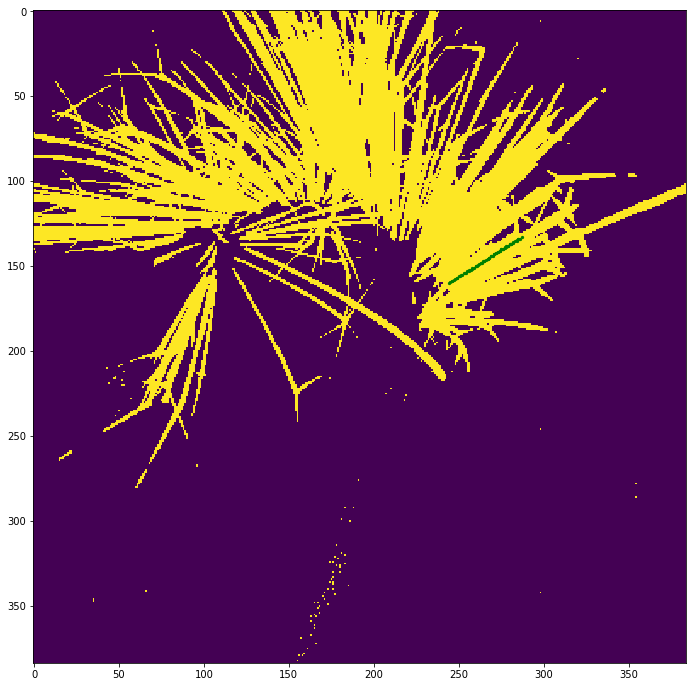

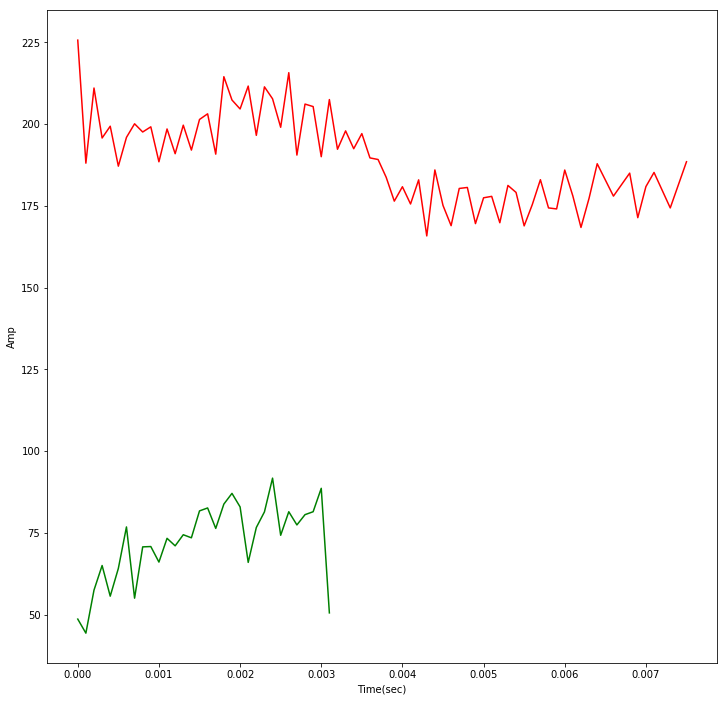

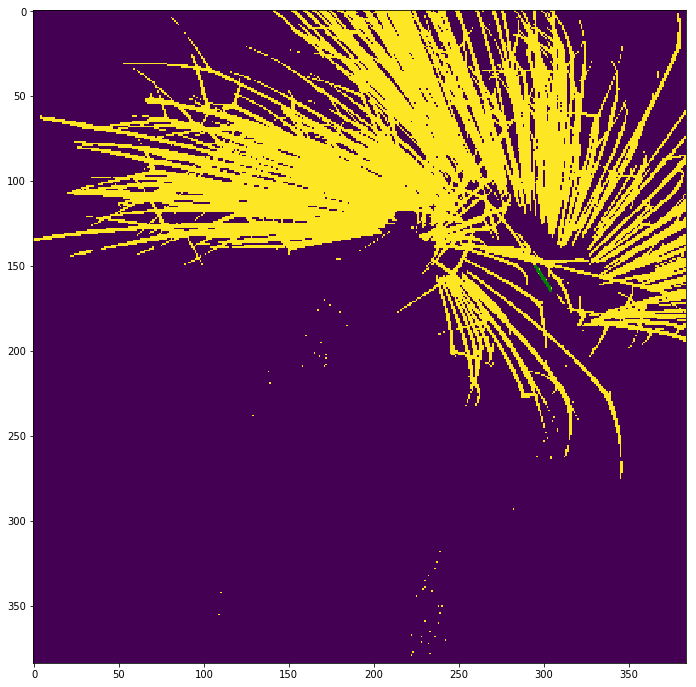

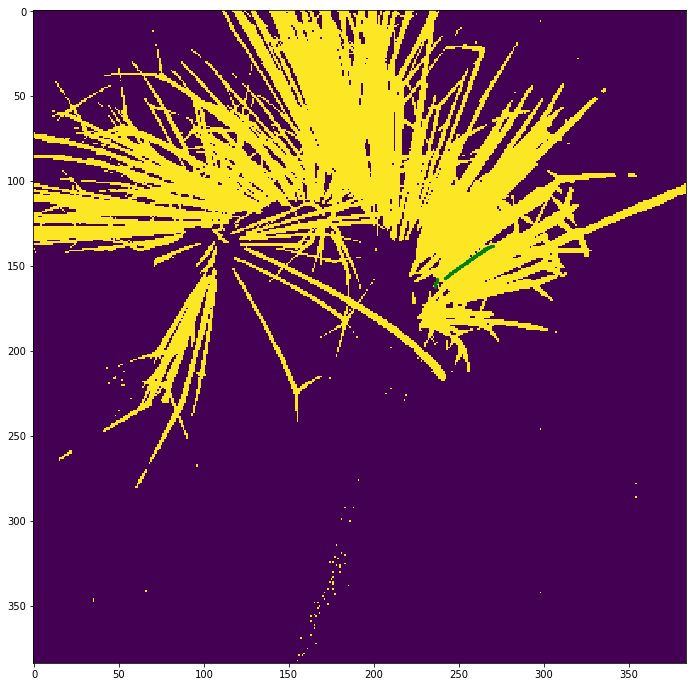

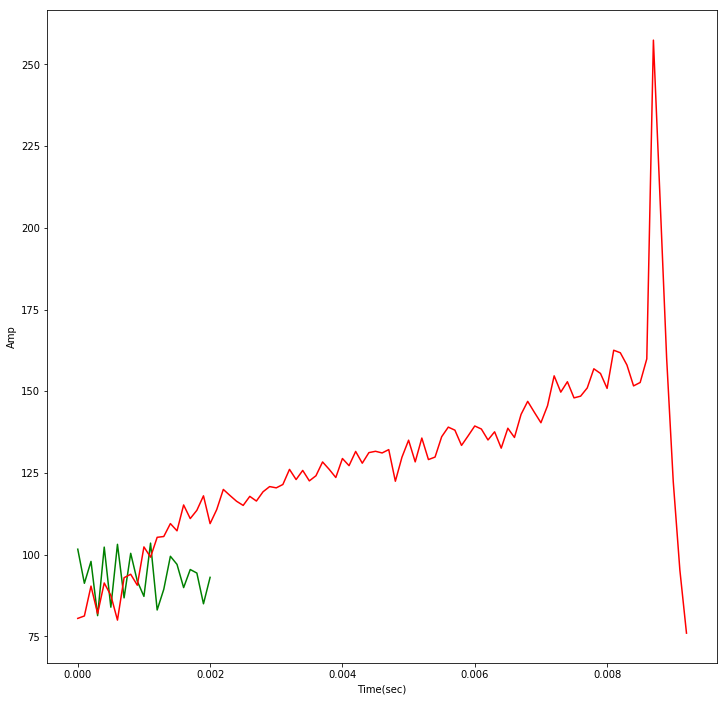

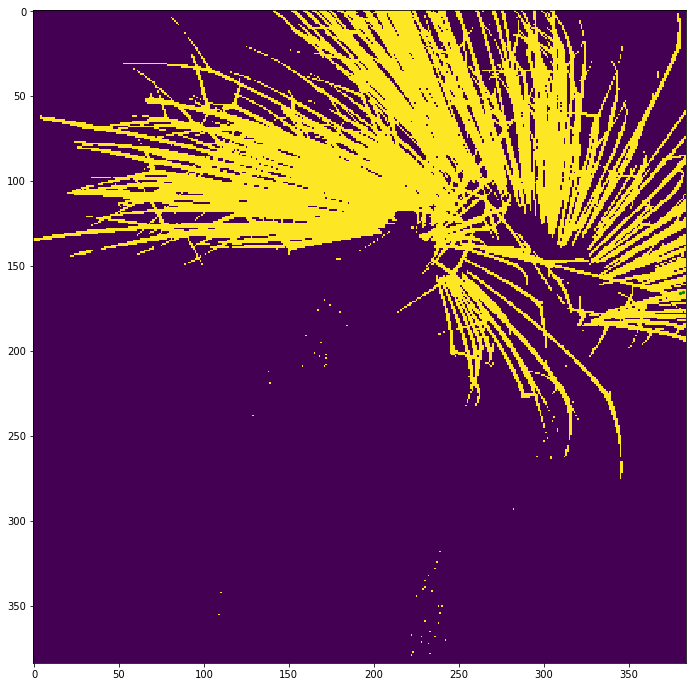

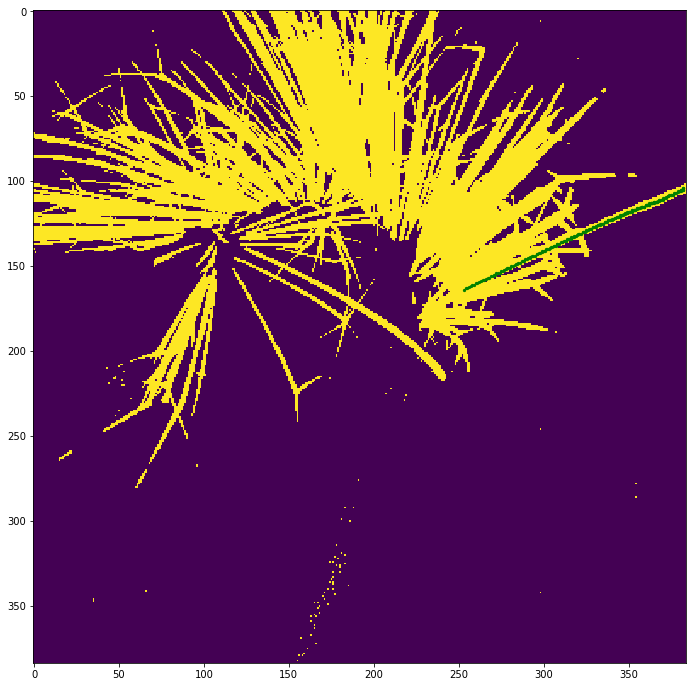

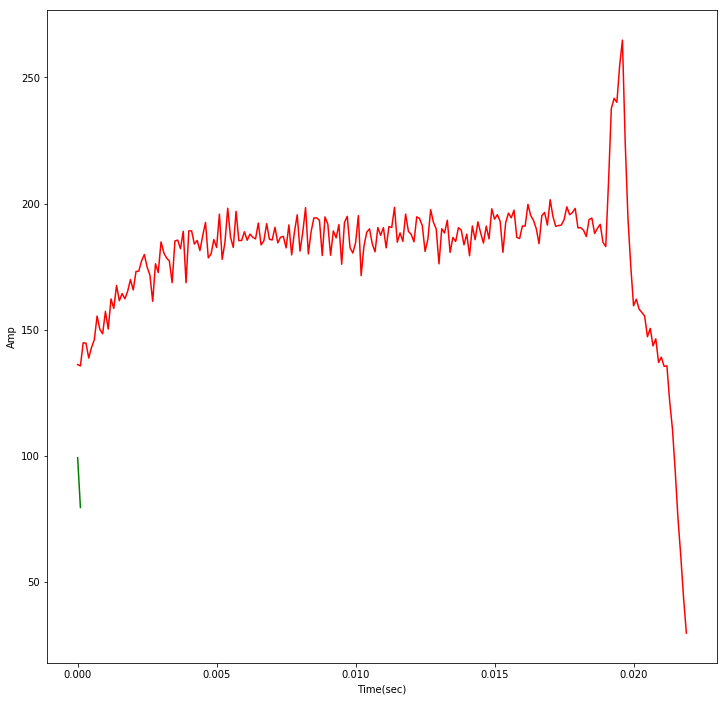

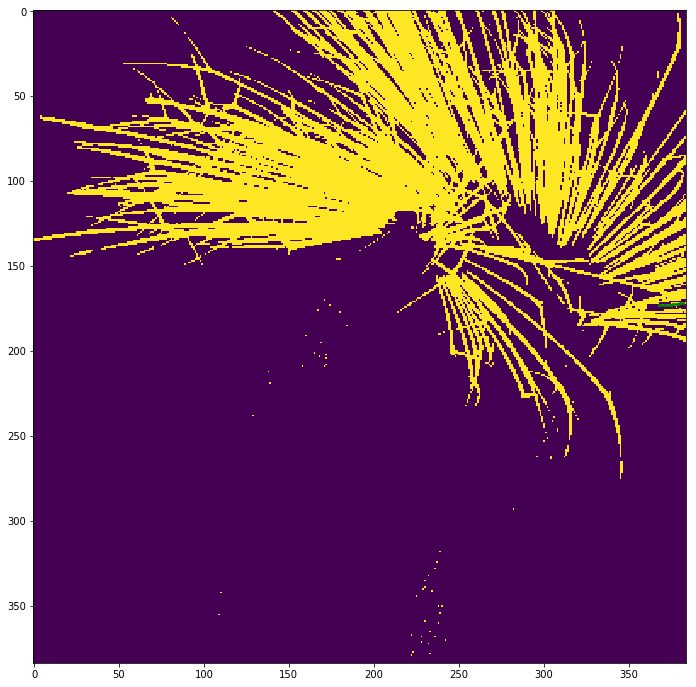

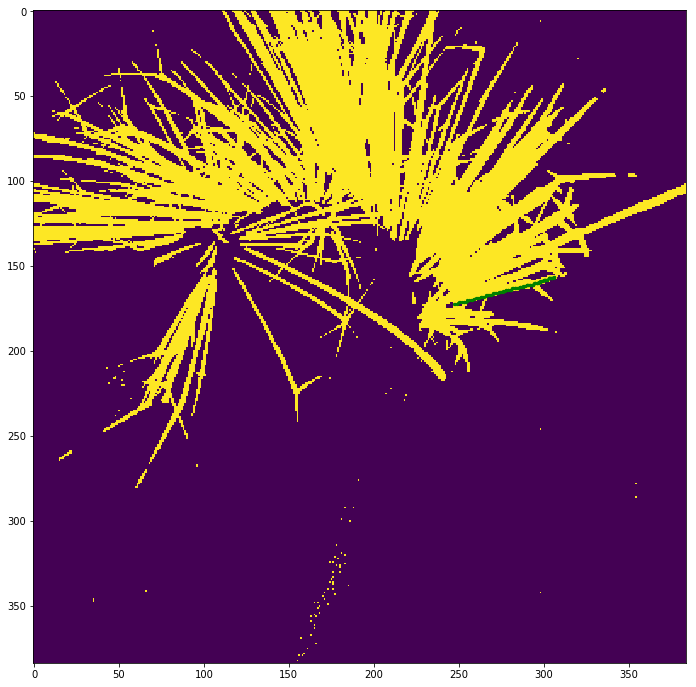

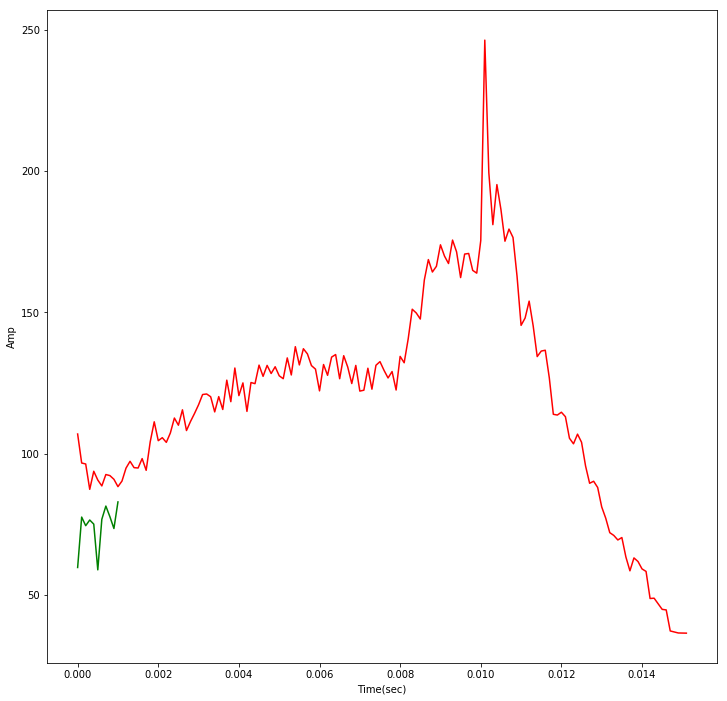

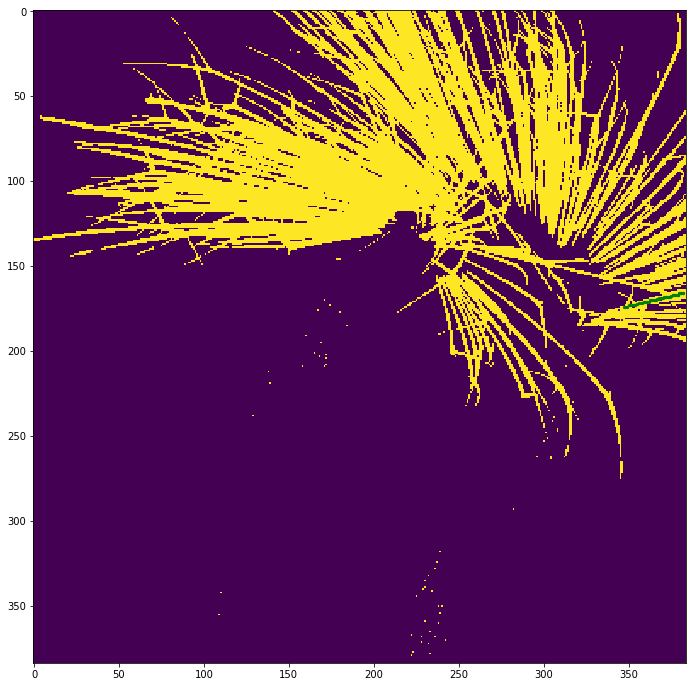

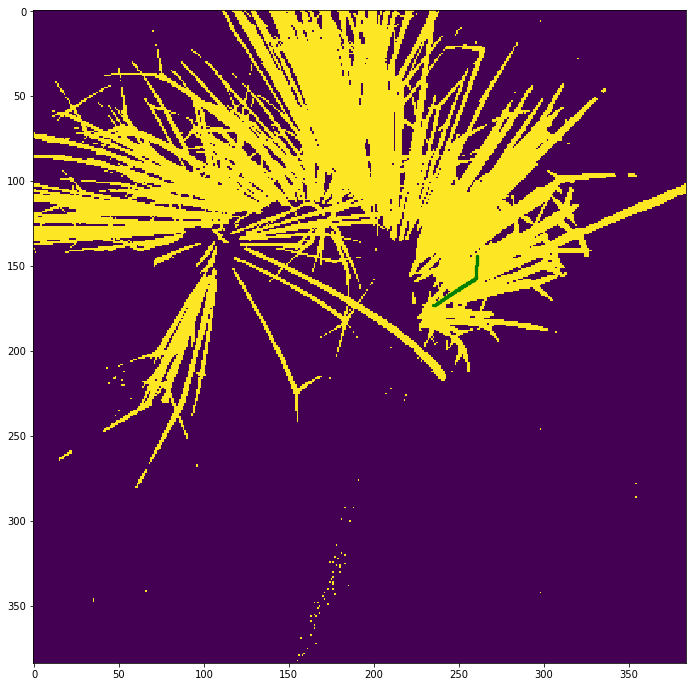

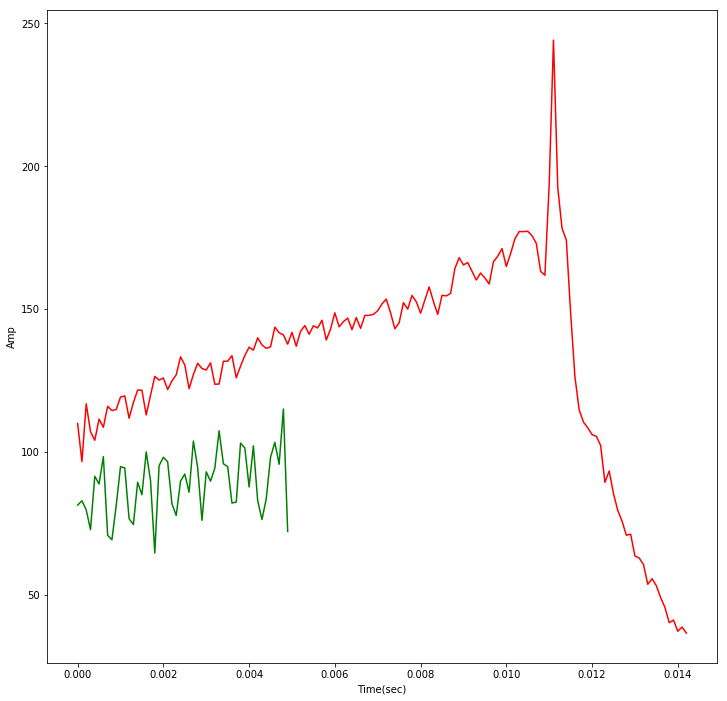

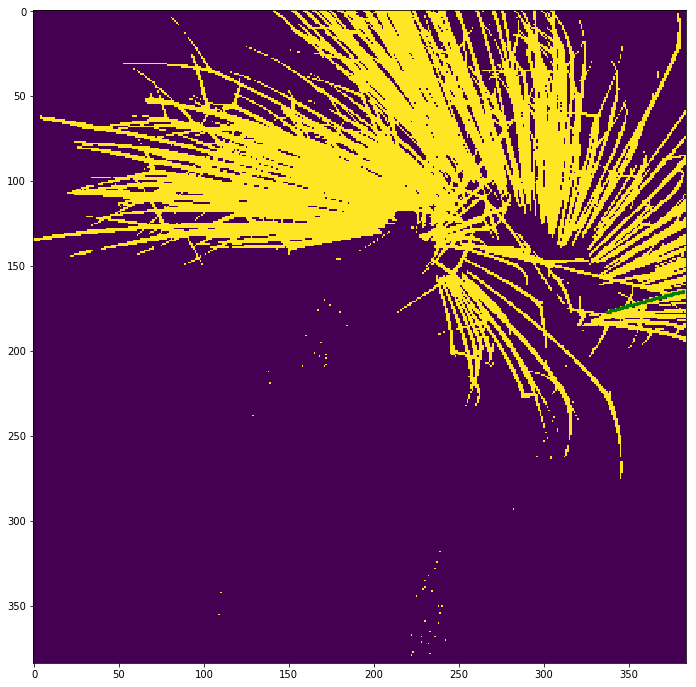

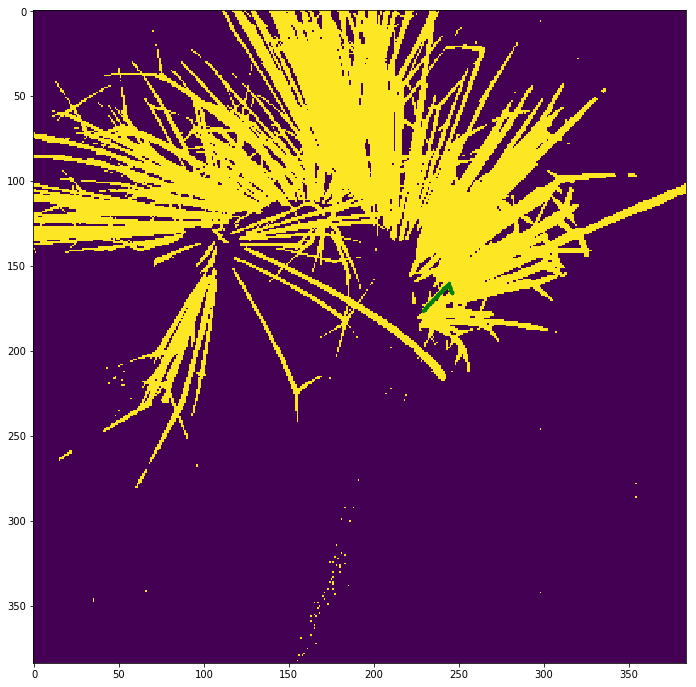

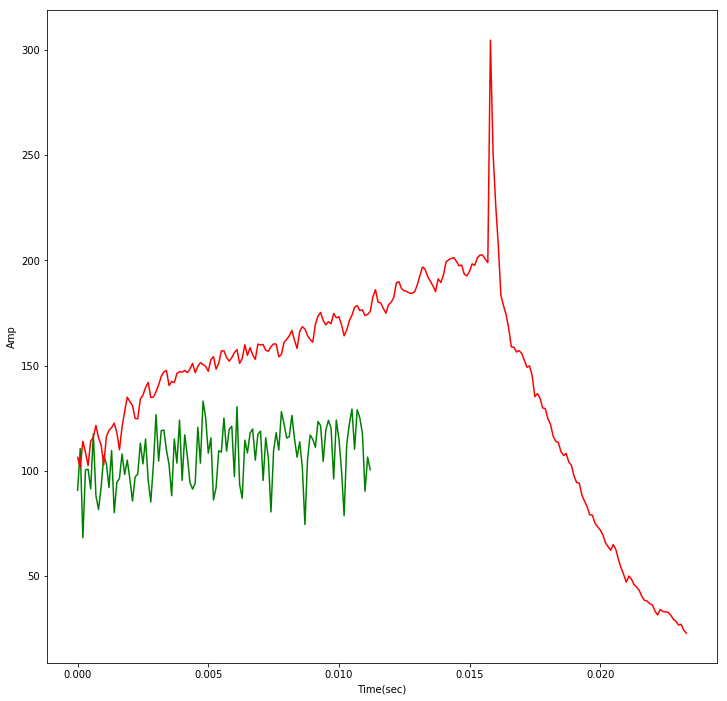

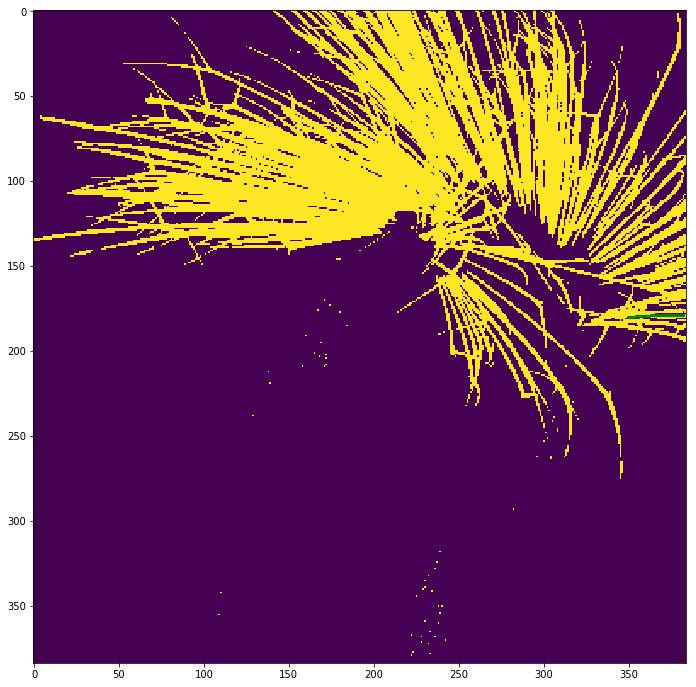

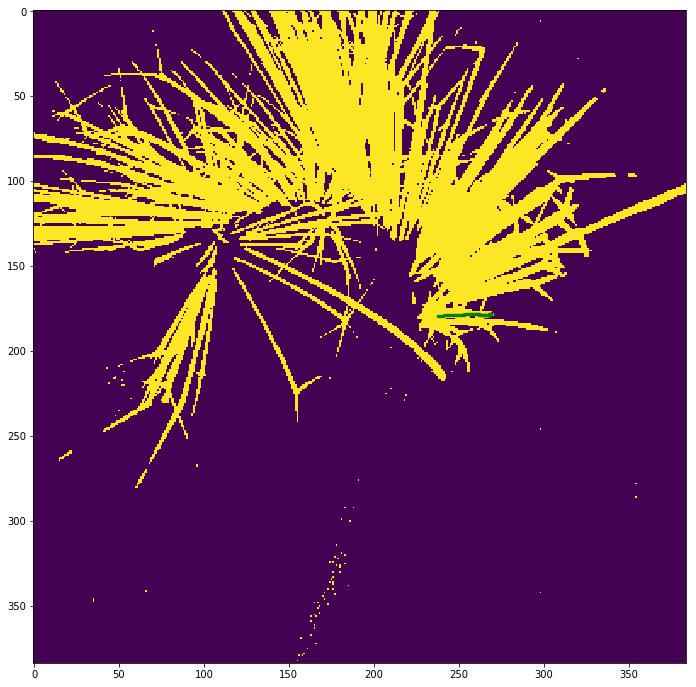

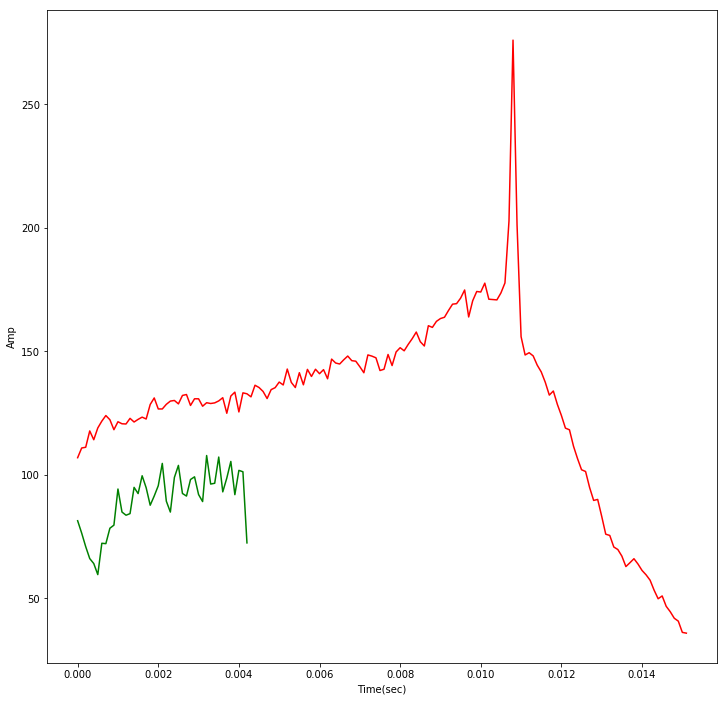

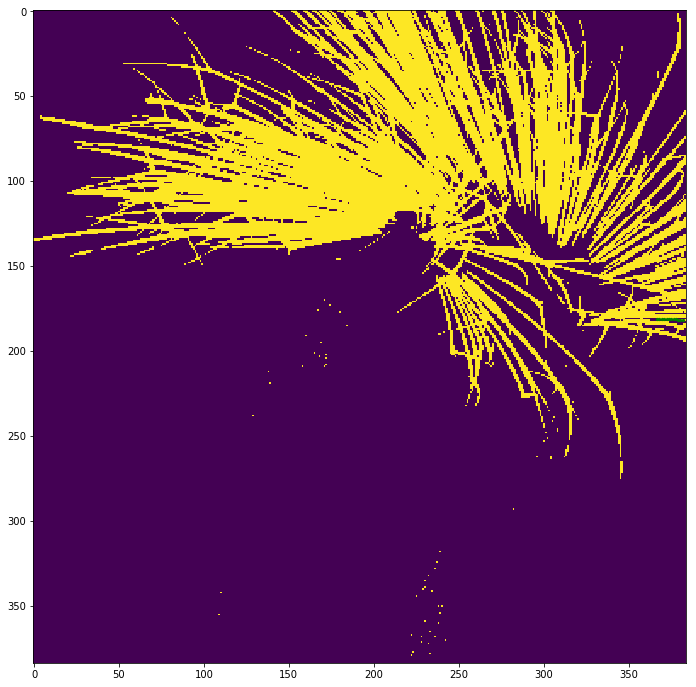

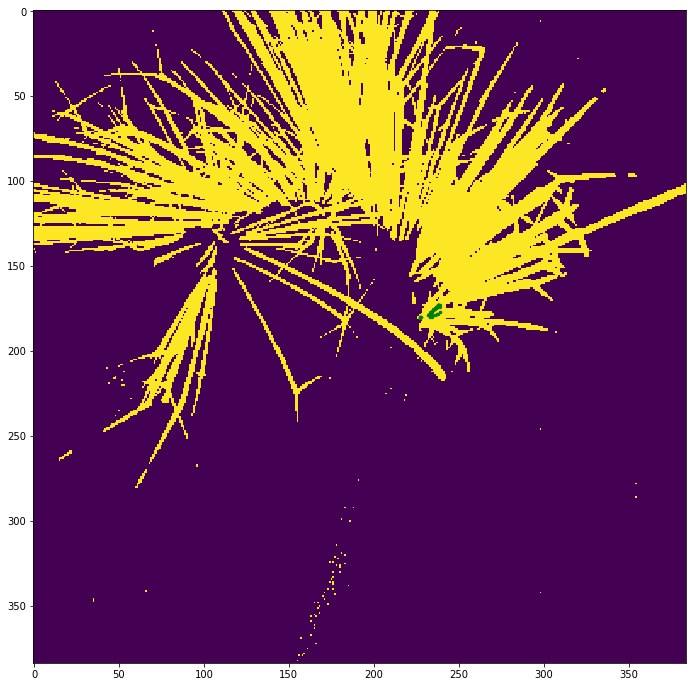

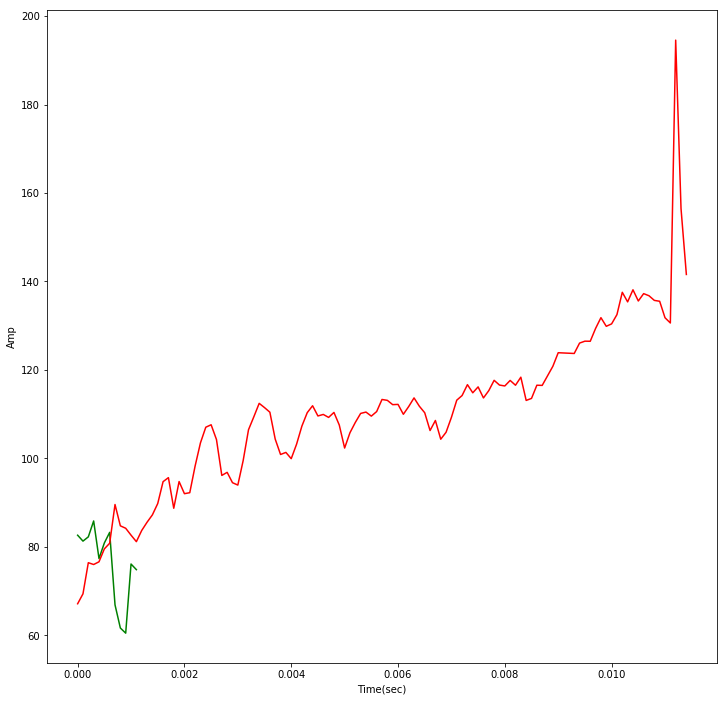

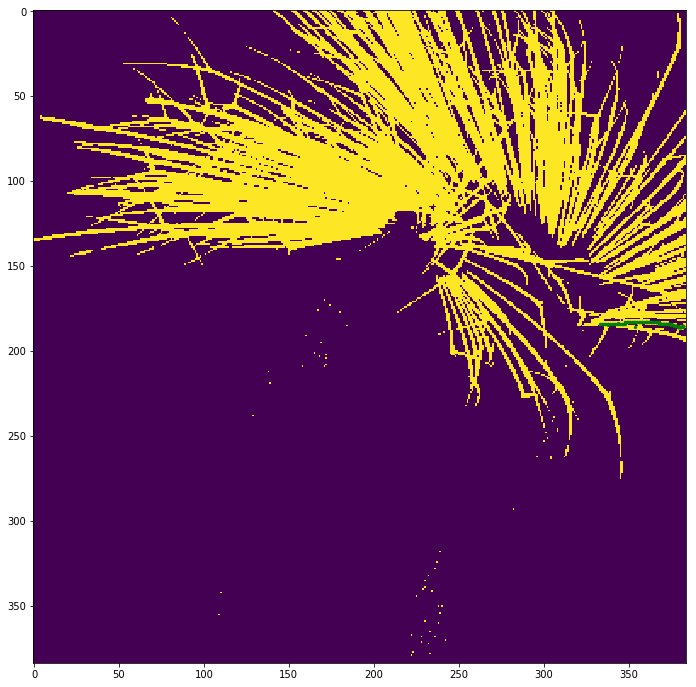

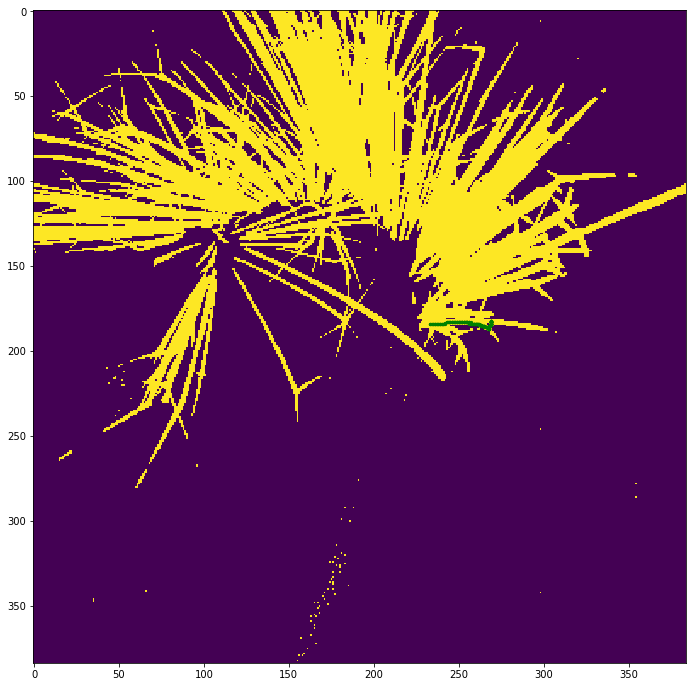

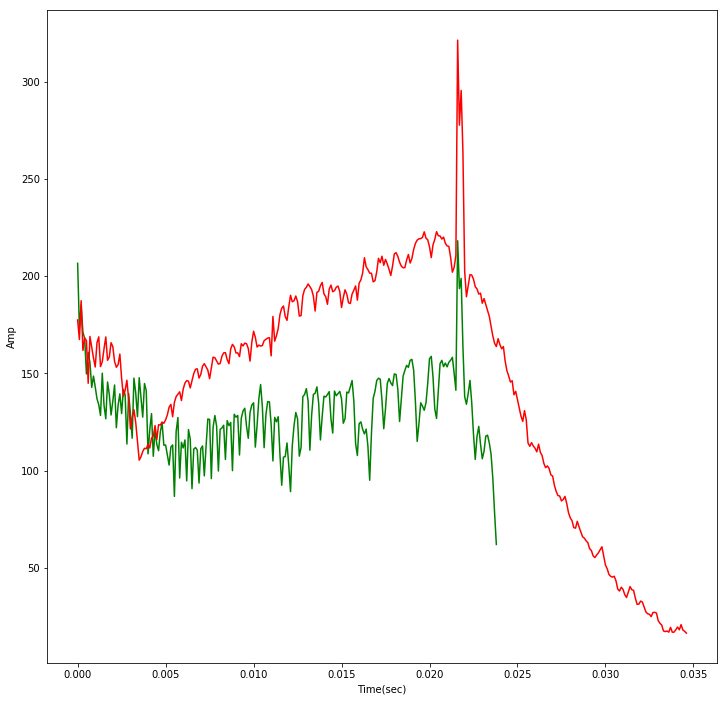

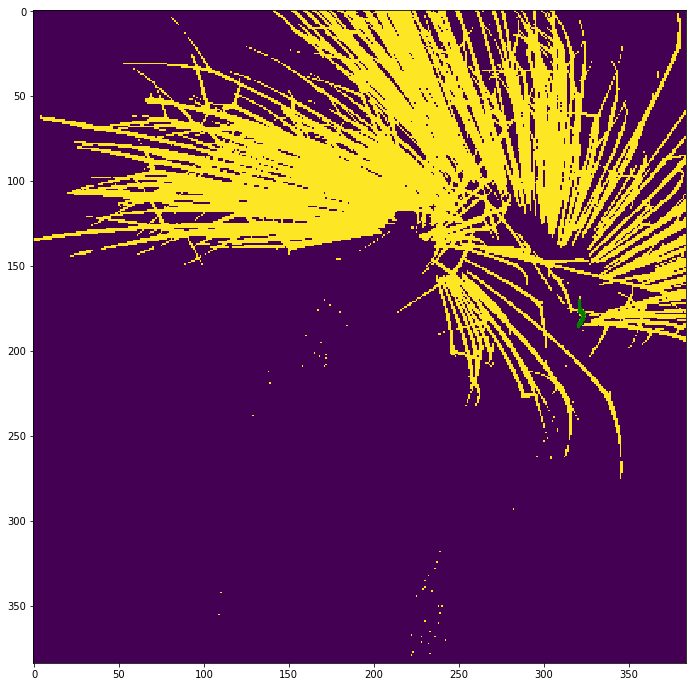

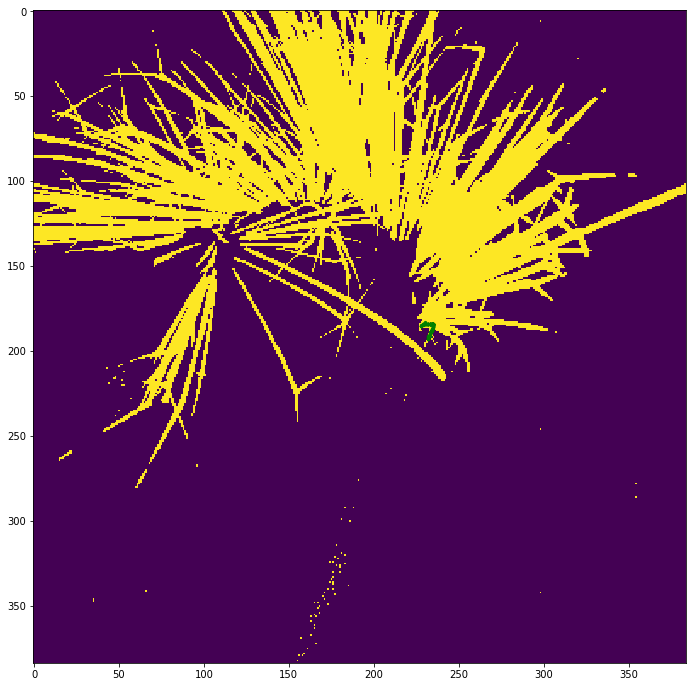

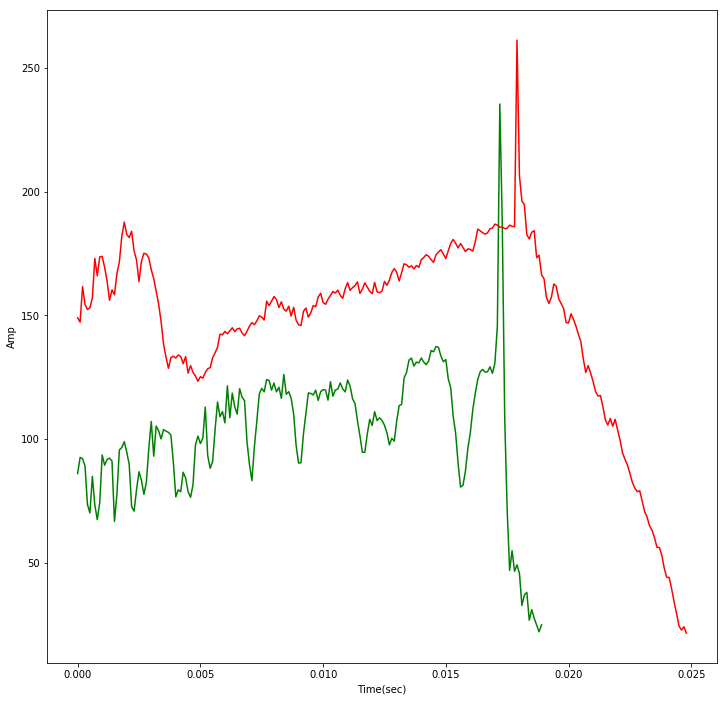

In [52]:
for ii in range(len(Pair)):

    iL = Pair[ii][0]
    iR = Pair[ii][1]
    TL1 = TrackL[TrackL['particle'] == iL]
    XL = TL1['x']
    YL = TL1['y']
    TL = TL1['Time']
    AL = TL1['mass']
    TR1 = TrackR[TrackR['particle'] == iR]
    XR = TR1['x']
    YR = TR1['y']
    TR = TR1['Time']
    AR = TR1['mass']
    plt.figure(figsize=(12,12))
    plt.imshow(FrameLSum[0])    
    plt.scatter(XL,YL,s=5,c='g')
    plt.savefig('trackL_{}.tif'.format(ii))
    plt.show()
    
    plt.figure(figsize=(12,12))
    plt.imshow(FrameRSum[0])
    plt.scatter(XR,YR,s=5,c='g')
    plt.savefig('trackR_{}.tif'.format(ii))
    plt.show()
    
    plt.figure(figsize=(12,12))
    plt.plot(TL,AL,color='g')
    plt.plot(TR,AR,color='r')
    plt.xlabel('Time(sec)')
    plt.ylabel('Amp')
    plt.savefig('amplitud_{}.tif'.format(ii))
    plt.show()